# 1. Business Problem Understanding

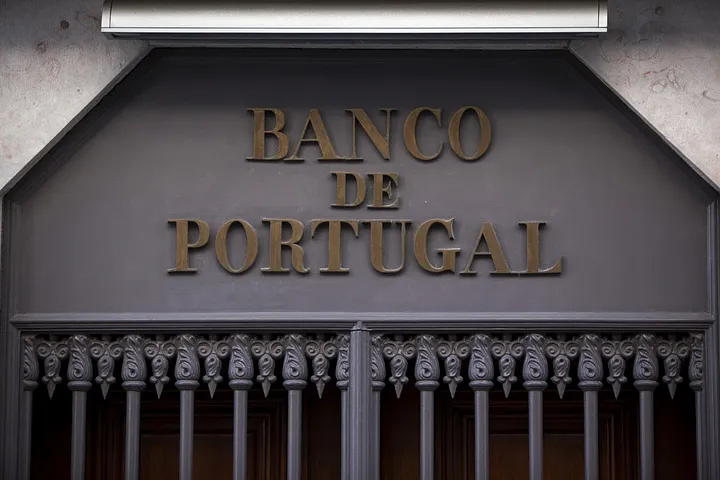

## 1.1. Context
Sebuah lembaga keuangan di Portugal sedang berupaya meningkatkan strategi pemasarannya untuk produk deposito berjangka. Mereka telah menjalankan beberapa kampanye pemasaran sebelumnya, namun tingkat keberhasilannya masih belum optimal.

Term deposito merupakan bentuk investasi yang memiliki jangka waktu dan *return* tertentu dalam penyimpanannya. *Return* merupakan bunga dari hasil lama dan besaran penyimpanan yang dilakukan, bunga ini yang disebut sebagai penghasilan bagi mereka yang menanamkan modal. Sebagai pihak yang berperan penting atas jalannya roda perekenomian, savings merupakan salah satu aspek penting yang berpengaruh dalam pergerakan ekonomi dan finansial suatu negara. Deposito/simpanan digunakan bank sebagai sumber dana/modal yang akan disalurkan kepada pihak/nasabah lain, dengan hal ini dapat membantu nasabah lain dalam mendorong perekonomian mereka yang juga bisa berdampak pada kesejahteraan negara.


Bagi pihak bank sendiri, adanya modal dari sistem deposit membantu mereka dalam menjalankan operasional seharinya dan juga memberikan keuntungan dari *return* bunga oleh peminjam. Selain itu, keuntungan lainnya dapat meningkatkan liquiditas serta kestabilan bank itu sendiri. Hal ini berarti semakin banyak modal dari *savings* yang masuk maka akses untuk mengabulkan permintaan pencairan dari nasabah semakin mudah. Oleh karena itu, untuk mencapai tujuan yang diharapkan pihak bank melakukan *campaign* guna meningkatkan jumlah nasabah yang melakukan *savings* dengan pembukaan deposito.

**Target**:

**0** : Tidak menerima tawaran deposit<br>
**1** : Menerima tawaran deposit

## 1.2. Problem Statement
Berdasarkan hasil analisis dataset yang diberikan, bisa dikatakan *campaign* manual yang dilakukan dengan cara menghubungi *client*/nasabah satu per satu kurang efisien. Hal ini karena selain memakan banyak waktu dan *cost*, hasil yang diharapkan mungkin bisa dikatakan tidak sebanding dengan usaha yang dikeluarkan untuk biaya *campaign* itu sendiri (seperti yang dianalisis hanya 11% mereka yang menerima).

**Asumsikan**:
  - Biaya tiap 1 menit panggilan: 0.19 euro<sup>1</sup>, rata-rata durasi panggilan berdasarkan analisis 180 detik atau 3 menit, maka <u>biaya 1 panggilan: 0.57 euro</u>. Jika sebagian besar *client* dipanggil sebanyak 2x dalam 1 periode per tahun *campaign* (median rata panggilan), <u>maka total biaya yang dikeluarkan untuk 1 *client*: 1.14 euro</u>.
  - Apabila 11% dari total *client* bank (41.176) adalah 4639 yang menerima penawaran maka <u>minimum profit yang didapat sebesar (5.32 * 4639 = 24.679 euro)</u>, <u>sedangkan total biaya yang dikeluarkan untuk menghubungi keseluruhan client (1.14 * 41176 = 46.940 euro)</u>.

Terlihat bahwa rasio biaya *campaign* yang dikeluarkan 2x lebih besar dibandingkan income yang masuk. Oleh karena itu, **apabila persentase penerimaan *campaign* bisa ditingkatkan, maka profit yang masuk lebih besar dan dapat menutupi biaya yang dikeluarkan.**

## 1.3. Goals
Berdasarkan masalah yang telah dipaparkan, agar *possibility* persentase penerimaan *campaign* meningkat, beberapa hal yang perlu dilakukan:
1. Mengetahui dan menganalisis ciri/pola berdasarkan informasi *client*, informasi *campaign* sebelumnya, dan infomasi kondisi ekonomi saat itu terhadap penerimaan penawaran.
2. Membangun model *machine learning* klasifikasi untuk mengetahui besaran persentase (probabilitas) setiap *client* dalam menerima penawaran.
3. Melakukan analisis segmentasi *client*/nasabah berdasarkan probabilitas setiap *client* dan penerapan strategi yang tepat pada setiap *segment* *client*.
- Contoh strategi promo berdasarkan segmentasi *client*:
    - Segmen *medium*: program yang memberikan insentif tambahan bagi *client* yang membuka deposito.
    - Segment *low*: Perusahaan dapat mengadakan program seperti bundling package (produk *non-banking*) yang bisa diarahkan kepada tiap karakteristik dari *low-segmented client* dengan rincian sebagai berikut**:
      - Melakukan bundling promo liburan/potongan tiket pesawat (tentunya disesuaikan dengan besaran dan lama jangka waktu pembukaan deposito) atau melakukan kolaborasi program *credit*, dengan mendapatkan tambahan limit *credit*.
      - Mendapatkan potongan/bebas premi asuransi untuk penyimpanan dalam jangka waktu dan besaran tertentu.


**detail penjelasan keuntungan yang didapatkan bagi perusahaan dan client dijabarkan pada bagian akhir analisis

## 1.4 Key Stakeholders

Berdasarkan konteks dan pernyataan masalah, hasil analisis dan pembangunan sistem dapat dimanfaatkan oleh:
1. Direktur Bank:
    - Dapat menggunakan model untuk membuat keputusan strategis terkait alokasi sumber daya pemasaran, penentuan target pasar, dan perencanaan kampanye deposito.
    - Dapat mengakses informasi mengenai possibility keberhasilan kampanye deposito berdasarkan karakteristik nasabah."
    - Mendapatkan gambaran menyeluruh tentang potensi keuntungan dan efisiensi kampanye deposito.
2. Manager Marketing Bank:
    - Dapat menggunakan model untuk mengidentifikasi probabilitas nasabah terhadap penawaran kampanye deposito."
    - Dapat mengoptimalkan strategi pemasaran dengan menargetkan nasabah yang tepat.

## 1.5. Analytic Approach

Melakukan analisis data untuk menemukan karakteristik *client* yang berminat terhadap tawaran pembukaan deposito, kemudian menentukan ciri/fitur mana yang berpengaruh terhadap keputusan *client* dalam menerima tawaran tersebut.

Setelah mengetahui ciri tersebut, kemudian menerapkannya kedalam model *machine learning* yang akan digunakan mesin untuk dipelajari dan diprediksi kemungkinan hasil dari *client* dalam menerima penawaran pembukaan deposito.

Hasil dari prediksi probabilitas mesin akan kita bagi menjadi beberapa *segment* sebagai bentuk strategi yang dapat diterapkan perusahaan pada setiap *segment* *client*.


## 1.6. Metric Evaluation
Namun dalam penerapan *Machine Learning* memiliki kemungkinan *error* atas prediksi yang dirincikan seperti berikut:
<br>
<br>

|  | Tidak Menerima Tawaran (0) | Menerima Tawaran (1) |
| --- | --- | --- |
| **Tidak Menerima Tawaran (0)** | **True Negative (TN)** | **False Positif (FP)** |
|  | Model memprediksi *client* tidak menerima tawaran deposito, | Model memprediksi *client* menerima tawaran deposito,|
|  | dan *client* tidak menerima tawaran. | tetapi *client* tidak menerima tawaran deposito.|
| **Menerima Tawaran (1)** | **False Negatif (FN)** | **True Positif (TP)** |
|  | Model memprediksi *client* tidak menerima tawaran deposito, | Model memprediksi *client* menerima tawaran deposito,|
|  | tetapi *client* menerima tawaran. | dan *client* menerima tawaran deposito.



---



| **Tipe error** | **Konsekuensi** |
| --- | --- |
| False Positive | Kehilangan biaya *marketing* dan pemborosan waktu. |
| False Negative | Kehilangan *potensial profit* |

<br>

- Biaya *marketing cost* (False Positive) :
  - Biaya tiap 1 menit panggilan: 0.19 euro[<sup>1</sup>](https://digital-strategy.ec.europa.eu/en/policies/intra-eu-calls#:~:text=Europeans%20pay%20lower%20and%20limited,06%20per%20SMS%20(%2B%20VAT)), rata-rata durasi panggilan berdasarkan analisis 180 detik atau 3 menit, maka <u>biaya 1 panggilan: 0.57 euro</u>. Jika sebagian besar client dipanggil sebanyak 2x dalam 1 periode per tahun campaign (median rata panggilan), <u>maka total biaya yang dikeluarkan untuk 1 client: 1.14 euro</u>.

- Kehilangan *potential profit* (False Negative)
  - Apabila saat itu (2014) rata rate deposito: 0.2%[<sup>2</sup>](https://tradingeconomics.com/portugal/interest-rate), rata rate pinjaman: 5.52%[<sup>3</sup>](https://tradingeconomics.com/portugal/bank-lending-rate) dalam 1 tahun.
  - Jika diasumsikan client mengambil paling sedikit minimum deposito: 100 euro[<sup>4</sup>](https://withportugal.com/en/immigration/depositos-portugal) dalam 1 tahun, maka <u>profit minimum yang bisa dihasilkan 1 client: 5.32 euro**</u>

> **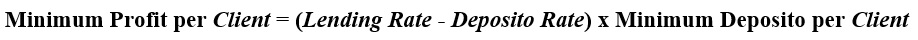

Dikarenakan ciri data mayoritas berpusat pada *client* yang menolak tawaran, maka untuk model melakukan prediksi terhadap *client* yang menerima, kemungkinan besar akan sulit, artinya potensi kemungkinan model salah memprediksi *client* yang sebenarnya memiliki sebagian ciri untuk menerima tawaran, besar.

Oleh karena itu, diperlukan minimalisir *error False Negative* terhadap prediksi model, untuk meminimalisir nilai tersebut artinya model memerlukan hasil prediksi dengan *Recall* besar.

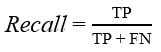

Hasil prediksi tersebut akan diketahui seberapa besar keuntungan yang dapat diperoleh dari penerapan ML. <u>Namun, *Recall* besar yang berhasil diperoleh tidak menjamin yang diperoleh menghasilkan profit</u>. Oleh karena itu,diperlukan *metrics* tambahan sebagai *metrics* tolak ukur atas %*Recall* yang dihasilkan.

**Profit Metrics**, merupakan *metrics* yang akan dipakai sebagai tolak ukur profit yang dihasilkan dengan interpretasi hasil *metrics* merupakan rata peningkatan profit minimum per *client*.


---------
<sup>1</sup>https://digital-strategy.ec.europa.eu/en/policies/intra-eu-calls#:~:text=Europeans%20pay%20lower%20and%20limited,06%20per%20SMS%20(%2B%20VAT).<br>
<sup>2</sup>https://tradingeconomics.com/portugal/interest-rate<br>
<sup>3</sup>https://tradingeconomics.com/portugal/bank-lending-rate<br>
<sup>4</sup>https://withportugal.com/en/immigration/depositos-portugal

## 1.7. Model Limitation

Informasi *client* terkait sudah pernah dihubungi atau belum. Apakah *client* menerima penawaran sebelumnya atau tidak, tidak menjadi pengaruh bagi sistem dalam mengambil keputusan.

Model hanya mempelajari ciri *client* berdasarkan karakteristik dari: <br>
- *Profile client*</u>  ('age', 'job', 'marital', 'education'),<br>
- *Financial situation client*</u> ('default', 'housing', 'loan'),<br>
- *Economic stability*</u> ('emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'number_employed'),
- dan beberapa informasi kampanye sebelumnya ('contact', 'month', 'day_of_week').

<br>

Model yang sudah dibangun dapat digunakan ketika perusahaan memerlukan sistem yang dapat memprediksi kemungkinan penerimaan setiap client terhadap campaignnya sebelum campaign telemarketing dilakukan, <u>karena hasil model berupa persentase probability terhadap penerimaan campaign.</u>

Namun, **kelemahan dalam model ketika persentase prediksi berada pada range > 50%.** Pada range ini ada kemungkinan model akan memprediksi client menerima terhadap client yang sebenarnya berpotensi menolak. <br>

Oleh karena itu <u>untuk mengatasi kelemahan model, perusahaan dapat melakukan penawaran untuk meningkatkan kemungkinan client menerima</u> (*jika diasumsikan terjadi kesalahan pada prediksi > 50% artinya client tersebut merupakan client berpotensi menolak*)<br>

Untuk perusahaan dapat meningkatkan kemungkinan penerimaan client, maka perusahaan perlu melakukan beberapa strategi marketing yang tepat, <u>guna mempermudah perusahaan dalam menerapkan strategi tersebut kepada client yang tepat, client dibagi menjadi segment low dan medium</u>, dengan rincian:<br>

- *Low-segmented client*: client dengan persentase < 80%
- *Medium-segmented client*: client dengan persentase >= 80%

<br>

Beberapa kemungkinan kesalahan prediksi lainnya seperti:
- Pekerjaan *blue-collar* kecenderungan besar akan <u>diprediksi sebagai client berpotensi menolak penawaran</u> (yang kenyataan masih ada client dengan pekerjaan sama yang menerima penawaran).
- Maret, Oktober, dan Desember <u>berpotensi diprediksi sebagai client yang akan menerima</u> (yang kenyataan dibulan tersebut masih ada beberapa client yang menolak penawaran).
- Apabila tingkat suku bunga mendekati 0 (semakin mendekati 0) maka <u>kemungkinan model memprediksi sebagai client menerima</u> (*dikarenakan kondisi ekonomi dengan indikasi rendah merupakan indikasi sebagian besar client menerima*).
- Apabila tingkat tenaga kerja berada pada rentang < -1.5, <u>kemungkinan model memprediksi sebagai client yang kecenderungan akan menerima</u> (*dikarenakan kondisi ekonomi dengan indikasi rendah merupakan indikasi sebagian besar client menerima*)

# 2. Data Understanding

Dataset diambil dari UCI Machine Learning Repository, yang merupakan *real data* dari salah satu Portugal Retail Bank oleh S'ergio Moro, Paulo Cortez, dan Paulo Rita (tahun 2014).

Data ini berisi *record direct marketing campaign* dari sebuah institusi bank melalui panggilan telephone (May 2008 to November 2010), dengan nama '**bank-additional-full.csv**'

Terdapat 20 fitur dengan 41.188 data *client*. Beberapa informasi fitur yang diberikan sebagai berikut:
- *Client Profile* : Berisi informasi *client*/nasabah.
- *Campaign* : Berisi informasi mengenai *campaign* sekarang maupun *campaign *sebelumnya.
- *Social & Economic Situation* : Berisi informasi mengenai kondisi ekonomi saat itu.

[Link Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing)

## 2.1. Attribute Information

Bank client data:<br>

| Attribute | Data Type | Description |
| --- | --- | --- |
| age | Integer | Usia client |
| job | String | Pekerjaan client |
| marital | String | Status pernikahan client |
| education | String | Status pendidikan client |
| default | String | Apakah client pernah gagal bayar/macet ? |
| housing | String | Apakah client mempunyai pinjaman untuk pembayaran rumah ? |
| loan | String | Apakah client mempunyai pinjaman pribadi ? |

Related with the last contact of the current campaign:<br>

| Attribute | Data Type | Description |
| --- | --- | --- |
| contact | String | Jenis komunikasi yang digunakan |
| month | String | Bulan terakhir kali melakukan panggilan dengan client pada campaign tahun ini  |
| day_of_week | String | Hari terakhir kali melakukan panggilan dengan client |
| duration | Integer | Durasi pada saat melakukan panggilan terakhir untuk menawarkan offering campaign kepada client |

Other attributes:<br>

| Attribute | Data Type | Description |
| --- | --- | --- |
| campaign | Integer | Jumlah panggilan yang dilakukan selama kampanye |
| pdays | Integer | Jumlah hari yang berlalu setelah client terakhir dihubungi dari kampanye sebelumnya. 999 apabila client tidak pernah dihubungi sebelumnya |
| previous | Integer | Jumlah panggilan yang dilakukan sebelum kampanye tahun ini |
| poutcome | String | Hasil dari kampanye sebelumnya |

Social and economic context attributes: <br>

| Attribute | Data Type | Description |
| --- | --- | --- |
| emp.var.rate | Float | Employment Variation Rate : Indikator rate tenaga kerja (%) (indikator quarter) |
| cons.price.idx | Float | Consumer Price Index : Indikator rata-rata perubahan harga barang & jasa. Semakin tinggi CPI, indikasi *Higher Inflation*. (indikator bulanan)|
| cons.conf.idx | Float | Consumer Confidence Index : Indikator tingkat kepercayaan customer mengenai kondisi perekonomian saat ini. Berpengaruh pada tingkat konsumsi rakyat. (indikator bulanan)|
| euribor3m | Float | Euribor 3 Month Rate : Tingkat suku bunga 3 bulan terakhir (indikator harian) |
| nr.employed | Float | Jumlah tenaga kerja (indikator quarter)  |

Target:<br>

| Attribute | Data Type | Description |
| --- | --- | --- |
| y | String | Apakah client menerima penawaran "Term Deposito" ? |

## 2.2. Import Libraries

In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

from matplotlib import pyplot as plt

## 2.3. Load Dataset

In [ ]:
# Download the file from Kaggle
!kaggle datasets download -d volodymyrgavrysh/bank-marketing-campaigns-dataset
!unzip bank-marketing-campaigns-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset
License(s): CC-BY-NC-SA-4.0
100% 391k/391k [00:00<00:00, 1.45MB/s]
100% 391k/391k [00:00<00:00, 1.44MB/s]
Archive:  bank-marketing-campaigns-dataset.zip
  inflating: bank-additional-full.csv  


In [ ]:
# Read the CSV file into a DataFrame
data = pd.read_csv("bank-additional-full.csv", sep = ';')

# 3. Data Cleaning

## 3.1. Copy Dataset

In [ ]:
# Copy data
df = data.copy()

In [ ]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Diketahui terdapat 20 fitur/ciri *client* dengan 1 *response* (y). Nilai dari masing-masing 20 fitur mendeskripsikan karakteristik terukur dari 41.188 *client*, sedangkan *Response* (y) merupakan hasil tanggapan *client* terhadap 20 ciri yang ada pada setiap data.  

## 3.2. Skimming Data

In [ ]:
# Skimming Dataset

pd.DataFrame({
    'feature': df.columns.values,
    'null_value(%)': df.isna().mean().values * 100,
    'negative_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'n_unique': df.nunique().values,
    'top': [df[col].value_counts().nlargest(1).index[0] for col in df.columns],
    'freq':[df[col].value_counts().nlargest(1).values[0] for col in df.columns],
    '%freq':[df[col].value_counts().nlargest(1).values[0]*100/len(df) for col in df.columns],
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(2)

feature  null_value(%)  negative_value(%)  n_unique  \
0              age            0.0               0.00        78   
1              job            0.0               0.00        12   
2          marital            0.0               0.00         4   
3        education            0.0               0.00         8   
4          default            0.0               0.00         3   
5          housing            0.0               0.00         3   
6             loan            0.0               0.00         3   
7          contact            0.0               0.00         2   
8            month            0.0               0.00        10   
9      day_of_week            0.0               0.00         5   
10        duration            0.0               0.00      1544   
11        campaign            0.0               0.00        42   
12           pdays            0.0               0.00        27   
13        previous            0.0               0.00         8   
14        poutcome            0.0               0.00         3   
15    emp.var.rate            0.0              41.74        10   
16  cons.price.idx            0.0               0.00        26   
17   cons.conf.idx            0.0             100.00        26   
18       euribor3m            0.0               0.00       316   
19     nr.employed            0.0               0.00        11   
20               y            0.0               0.00         2   

                  top   freq  %freq  \
0                  31   1947   4.73   
1              admin.  10422  25.30   
2             married  24928  60.52   
3   university.degree  12168  29.54   
4                  no  32588  79.12   
5                 yes  21576  52.38   
6                  no  33950  82.43   
7            cellular  26144  63.47   
8                 may  13769  33.43   
9                 thu   8623  20.94   
10                 90    170   0.41   
11                  1  17642  42.83   
12                999  39673  96.32   
13                  0  35563  86.34   
14        nonexistent  35563  86.34   
15                1.4  16234  39.41   
16             93.994   7763  18.85   
17              -36.4   7763  18.85   
18              4.857   2868   6.96   
19             5228.1  16234  39.41   
20                 no  36548  88.73   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       sample_unique  
0                                                                                                                                                                                                                                                                                                                                                                                           [56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]  
1                                                                                                                                                                                                                                                                                                                    

Dataset menjelaskan bahwa:
1. Informasi situasi *campaign*
  - Pada *current campaign* tidak terjadi panggilan kepada *client* pada bulan January dan February, artinya selama 2 bulan tersebut tidak ada penawaran campaign yang dilakukan dari pihak Bank.
  - Panggilan juga tidak terjadi selama hari Sabtu dan Minggu.
  - Hampir 63% penawaran dilakukan melalui panggilan (*direct*) *cellular client*, artinya telemarketing dilakukan melalui panggilan nomor handphone client.
  - *Nonexistent* pada *previous outcome of campaign* diasumsikan sebagai client yang belum menerima penawaran *campaign* atau bukan merupakan bagian dari *campaign* sebelumnya, artinya sebanyak 86.34% *client* dataset termasuk pada *client* tersebut.

2. Informasi *client*
  - Pada ciri job, education, marital, default, housing, dan loan, terdapat unknown values yang belum diketahui maksud value tersebut dan akan dilakukan analisa pada analisis per fitur nantinya.
  - Berdasarkan status finansial *client* yang dilihat dari *Loan*, *Default*, dan *Housing*, mayoritas *client* pernah memiliki pinjaman untuk pembayaran rumah (52%) dan sebagian besar tidak pernah mengalami kegagalan/kemacetan pembayaran (79%). 82% mayoritas *client* juga tidak pernah memiliki pinjaman pribadi, <u>artinya bisa dikatakan kondisi finansial sebagian besar client perusahaan sehat</u>.  
  - Usia termuda *client* perusahaan berumur 17 tahun dan paling tua berumur 98 tahun.

3. Informasi kondisi sosial - ekonomi
    - Index kepercayaan *client* (cons_conf_idx) bernilai *negative*, artinya *client* mengalami kekhawatiran terhadap kondisi ekonomi saat itu.
    - Angka penuruan rate tenaga kerja lebih besar dibandingkan angka kenaikan, mengindikasikan terjadinya penurunan jumlah tenaga kerja.

In [ ]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

Ciri *numerical dataset* menjelaskan bahwa:

- Hampir penyebaran 25% keatas (hampir setara 80% *client*) merupakan client yang belum pernah ditawarkan campaign sebelumnya (pdays), artinya sebagian besar *client* bisa dikatakan merupakan *client* yang baru bergabung sebagai nasabah perusahaan.
- Panggilan terbanyak yang terjadi selama *campaign* tahun ini sebanyak 56 panggilan, sedangkan panggilan terbanyak pada *campaign* sebelumnya hanya 7x panggilan, artinya penawaran pada *campaign* sebelumnya tidak seaktif penawaran pada tahun ini.

- Rata *Low Confidence Index* pada data -40.5 menunjukkan tingkat kepercayaan *client* terhadap kondisi perekonomian saat itu tidak baik (jika diasumsikan *the lowest confidence index* adalah -100, maka -40.5 termasuk dalam kategori *middle* yang berarti cukup memprihatinkan), artinya kondisi perekonomian saat ini memberikan kekhawatiran masyarakat terhadap *financial prospect* mereka.

- Diketahui durasi panggilan tertinggi 4918 detik (~1 jam 30 menit) dan terendah 0 detik.

## 3.3. Drop Duplicates

In [ ]:
# Count Duplicates
df.duplicated().sum()

12

Diketahui terdapat 12 data dengan ciri yang sama dari ke-20 ciri, untuk menghindari bias proporsi analisis, maka di-drop.

In [ ]:
# Drop Duplicates
df.drop_duplicates(inplace=True, ignore_index=True)

## 3.4. Rename Columns and Values

Bertujuan untuk mempermudah analisis.

In [ ]:
# Rename Columns

rename_columns = {
    "emp.var.rate": "emp_var_rate",
    "cons.price.idx":"cons_price_idx",
    "cons.conf.idx":"cons_conf_idx",
    "nr.employed":"number_employed"
}

df.rename(inplace=True, columns=rename_columns)

In [ ]:
# Rename Values

jobs = {
    "admin.":"admin",
}
educations = {
    "basic.4y":"basic_4y",
    "basic.6y":"basic_6y",
    "basic.9y":"basic_9y",
    "professional.course":"professional_course",
    "university.degree":"university_degree",
    "high.school":"high_school"
}

labels = {
    "no":0,
    "yes":1
}

df['job'] = df['job'].apply(lambda x: jobs.get(x,x))
df['education'] = df['education'].apply(lambda x: educations.get(x,x))
df['y'] = df['y'].apply(lambda x: labels.get(x,x))

## 3.5 Anomaly Checking

In [ ]:
df[df['campaign'] == 56]

age    job  marital          education  default  housing     loan  \
4106   32  admin  married  university_degree  unknown  unknown  unknown   

        contact month day_of_week  duration  campaign  pdays  previous  \
4106  telephone   may         mon       261        56    999         0   

         poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
4106  nonexistent           1.1          93.994          -36.4      4.858   

      number_employed  y  
4106           5191.0  0

Jumlah panggilan terbanyak pada *latest campaign* adalah 56 panggilan. Pengecekan dilakukan untuk melihat ciri client yang dilakukan panggilan oleh perusahaan sebanyak 56x dalam 1 periode campaign dan <u>tidak ditemukan adanya kejanggalan pada data tersebut</u>. Hal ini berarti *value* dari client ini akan tetap dipertahankan sebagai salah satu ciri client.

## 3.6. Handling 'Unknown' Values

In [ ]:
cols_to_check = ['job', 'education', 'marital', 'default', 'housing', 'loan']

for col in cols_to_check:
  unknown_count = len(df[df[col] == 'unknown'])
  total_count = len(df)
  unknown_percentage = (unknown_count / total_count) * 100

  y_1_unknown_count = len(df[(df[col] == 'unknown') & (df['y'] == 1)])
  y_1_unknown_percentage = (y_1_unknown_count / unknown_count) * 100 if unknown_count > 0 else 0

  print(f"Column: {col}")
  print(f"Percentage of 'unknown' values: {unknown_percentage:.2f}%")
  print(f"Percentage of 'y=1' among 'unknown' values: {y_1_unknown_percentage:.2f}%")
  print("-" * 100,"\n")


Column: job
Percentage of 'unknown' values: 0.80%
Percentage of 'y=1' among 'unknown' values: 11.21%
---------------------------------------------------------------------------------------------------- 

Column: education
Percentage of 'unknown' values: 4.20%
Percentage of 'y=1' among 'unknown' values: 14.51%
---------------------------------------------------------------------------------------------------- 

Column: marital
Percentage of 'unknown' values: 0.19%
Percentage of 'y=1' among 'unknown' values: 15.00%
---------------------------------------------------------------------------------------------------- 

Column: default
Percentage of 'unknown' values: 20.88%
Percentage of 'y=1' among 'unknown' values: 5.15%
---------------------------------------------------------------------------------------------------- 

Column: housing
Percentage of 'unknown' values: 2.40%
Percentage of 'y=1' among 'unknown' values: 10.81%
-----------------------------------------------------------------

Dikarenakan salah satu kolom mengandung unknown 20.88%, maka menghilangkan data unknown tidak bisa dilakukan karena akan mengurangi informasi data terutama 5.15%nya merupakan ciri informasi *client* yang menerima penawaran.

### 3.6.1. Job

In [ ]:
job_y_counts = df.groupby(['job', 'y'])['y'].count().unstack()

job_y_counts

y                 0     1
job                      
admin          9068  1351
blue-collar    8615   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1284   434
self-employed  1272   149
services       3644   323
student         600   275
technician     6009   730
unemployed      870   144
unknown         293    37

Berdasarkan tabel di atas, terdapat beberapa nilai 'unknown' pada kolom 'job'. Untuk mengatasinya dapat dilakukan pengisian berdasarkan Usia seperti untuk 'student' dan 'retired'.

In [ ]:
df.groupby('age')['job'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)


age
17        student
18        student
19        student
20        student
21        student
22        student
23    blue-collar
24        student
25          admin
26          admin
27          admin
28          admin
29          admin
30          admin
31          admin
32          admin
33          admin
34          admin
35          admin
36          admin
37          admin
38    blue-collar
39          admin
40    blue-collar
41    blue-collar
42          admin
43    blue-collar
44    blue-collar
45    blue-collar
46          admin
47    blue-collar
48    blue-collar
49    blue-collar
50    blue-collar
51    blue-collar
52          admin
53    blue-collar
54    blue-collar
55          admin
56    blue-collar
57    blue-collar
58        retired
59        retired
60        retired
61        retired
62        retired
63        retired
64        retired
65        retired
66        retired
67        retired
68        retired
69        retired
70        retired
71        retired
72        retired
73        retired
74        retired
75        retired
76        retired
77        retired
78        retired
79        retired
80        retired
81        retired
82        retired
83        retired
84        retired
85        retired
86        retired
87        retired
88        retired
89        retired
91        retired
92        retired
94        retired
95        retired
98        retired
Name: job, dtype: object

Client dengan nilai 'unknown' pada kolom 'job' pada rentang usia 17-24 tahun dapat diisi dengan 'student' sedangkan pada rentang usia > 58 tahun dapat diisi dengan 'retired'.

In [ ]:
# Fill 'unknown' job values with 'student' for ages 17-24 and 'retired' for ages > 58
df.loc[(df['job'] == 'unknown') & (df['age'] >= 17) & (df['age'] <= 24), 'job'] = 'student'
df.loc[(df['job'] == 'unknown') & (df['age'] > 58), 'job'] = 'retired'


Untuk mengatasi sisa nilai 'unknown' pada kolom 'job' dapat diisi berdasarkan 'education'. Karena kemungkinan besar seseorang yang bekerja di bidang tertentu cenderung memiliki tingkat pendidikan tertentu.

In [ ]:
# the mode of job for each education level
job_modus_by_education = df.groupby('education')['job'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

job_modus_by_education

education
basic_4y               blue-collar
basic_6y               blue-collar
basic_9y               blue-collar
high_school                  admin
illiterate             blue-collar
professional_course     technician
university_degree            admin
unknown                blue-collar
Name: job, dtype: object

In [ ]:
# Fill 'unknown' job values based on the mode of job for each education level
df.loc[(df['job'] == 'unknown'), 'job'] = df.loc[(df['job'] == 'unknown')].apply(lambda row: job_modus_by_education.get(row['education'], 'unknown'), axis=1)


### 3.6.2. Education

In [ ]:
df.groupby(['education', 'y'])['y'].count().unstack()


y                        0     1
education                       
basic_4y              3748   428
basic_6y              2103   188
basic_9y              5572   473
high_school           8481  1031
illiterate              14     4
professional_course   4645   595
university_degree    10495  1669
unknown               1479   251

Untuk mengatasi nilai 'unknown' pada kolom 'education' dapat diisi berdasarkan 'job'. Karena kemungkinan besar seseorang yang bekerja di bidang tertentu cenderung memiliki tingkat pendidikan tertentu.

In [ ]:
# the mode of education level for each job
education_modus_by_job = df.groupby('job')['education'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

education_modus_by_job

job
admin              university_degree
blue-collar                 basic_9y
entrepreneur       university_degree
housemaid                   basic_4y
management         university_degree
retired                     basic_4y
self-employed      university_degree
services                 high_school
student                  high_school
technician       professional_course
unemployed         university_degree
Name: education, dtype: object

In [ ]:
# Replace 'unknown' values on 'education' column with education_modus_by_job
df.loc[(df['education'] == 'unknown'), 'education'] = df.loc[(df['education'] == 'unknown'), 'job'].map(education_modus_by_job)


### 3.6.3. Marital

In [ ]:
marital_y_counts = df.groupby(['marital', 'y'])['y'].count().unstack()
marital_y_counts


y             0     1
marital              
divorced   4135   476
married   22390  2531
single     9944  1620
unknown      68    12

Untuk mengatasi nilai 'unknown' pada kolom 'marital' dapat diisi berdasarkan 'age'. Karena kemungkinan besar seseorang yang pada usia tertentu cenderung memiliki status pernikahan tertentu.

In [ ]:
marital_modus_by_age = df.groupby('age')['marital'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

marital_modus_by_age

age
17      single
18      single
19      single
20      single
21      single
22      single
23      single
24      single
25      single
26      single
27      single
28      single
29      single
30      single
31     married
32     married
33     married
34     married
35     married
36     married
37     married
38     married
39     married
40     married
41     married
42     married
43     married
44     married
45     married
46     married
47     married
48     married
49     married
50     married
51     married
52     married
53     married
54     married
55     married
56     married
57     married
58     married
59     married
60     married
61     married
62     married
63     married
64     married
65     married
66     married
67     married
68     married
69     married
70     married
71     married
72     married
73     married
74     married
75     married
76     married
77     married
78     married
79     married
80     married
81     married
82     married
83     married
84    divorced
85     married
86     married
87    divorced
88    divorced
89    divorced
91     married
92     married
94     married
95    divorced
98     married
Name: marital, dtype: object

In [ ]:
# Replace 'unknown' values on 'marital' column with marital_modus_by_age
df.loc[(df['marital'] == 'unknown'), 'marital'] = df.loc[(df['marital'] == 'unknown'), 'age'].map(marital_modus_by_age)


### 3.6.4. Default

In [ ]:
default_y_counts = df.groupby(['default', 'y'])['y'].count().unstack()

default_y_counts

y              0       1
default                 
no       28381.0  4196.0
unknown   8153.0   443.0
yes          3.0     NaN

In [ ]:
df[['default', 'loan']][(df['loan'] == 'yes') & (df['default'] == 'yes')]

Empty DataFrame
Columns: [default, loan]
Index: []

Secara umum, bank akan lebih berhati-hati dalam memberikan pinjaman kepada klien yang memiliki riwayat default 'yes'. Terbukti pada tabel diatas, *client* yang memiliki status 'default' 'yes' tidak akan memiliki status 'loan' 'yes'.

Artinya pada kolom 'default' yang memiliki nilai 'unknown' dengan status 'loan' 'yes' dapat diisi status 'default' yaitu 'no'.

In [ ]:
# Replace 'unknown' value on 'default' column with 'no' when 'loan' is 'yes'
df.loc[(df['default'] == 'unknown') & (df['loan'] == 'yes'), 'default'] = 'no'


Jika seorang klien tidak memiliki pinjaman ('loan' = 'no'), kemungkinan besar mereka tidak memiliki riwayat gagal bayar ('default' = 'no').

Artinya pada kolom 'default' yang memiliki nilai 'unknown' dengan status 'loan' 'no' dapat diisi status 'default' yaitu 'no'.

In [ ]:
# Replace 'unknown' value on 'default' column with 'no' when 'loan' is 'no'
df['default'] = df.apply(lambda row: 'no' if row['default'] == 'unknown' and row['loan'] == 'no' else row['default'], axis=1)


### 3.6.5. Housing

In [ ]:
df.groupby(['housing', 'y'])['y'].count().unstack()


y            0     1
housing             
no       17473  2132
yes      19064  2507

In [ ]:
df[(df['housing'] == 'unknown') & (df['job'] == 'student')].groupby(['job', 'age'])['housing'].count()


Series([], Name: housing, dtype: int64)

Berdasarkan tabel di atas terdapat beberapa *client* dengan status 'housing' 'unknown'  berstatus 'student' yang kemungkinan besar masih menjadi tanggungan orang tua.

Jika diasumsikan 'student' yang masih menjadi tanggungan orang tua ('parental_responsibility') adalah sampai jenjang S2 (rentang usia maksimal 30 tahun). Maka, 'student' dengan status 'housing' 'unknown' dan memiliki 'age' di bawah 31 tahun akan dikategorikan ke dalam kategori 'no', yaitu tidak memiliki pinjaman rumah.

In [ ]:
# Categorize 'student' with 'housing' 'unknown' and 'age' below 31 as 'parental_responsibility'
df.loc[(df['housing'] == 'unknown') & (df['job'] == 'student') & (df['age'] < 31), 'housing'] = 'no'


In [ ]:
df.groupby(['housing', 'y'])['y'].count().unstack()

y            0     1
housing             
no       17473  2132
yes      19064  2507

Berdasarkan tabel diatas, masih terdapat beberapa nilai 'unknown' pada kolom 'housing'. Karena tidak terdapat data penunjang pasti untuk mengkategorikan nilai 'unknown' tersebut. Maka, akan dilakukan pengisian nilai 'unknown' dengan 'no'.

In [ ]:
# Replace 'unknown' values with 'no' on  the 'housing' column
df['housing'].replace('unknown', 'no', inplace=True)


Alasan:
 1. Mengingat persentase client dengan 'housing' 'unknown' yang menerima tawaran ('y'=1) relatif kecil, dan untuk menghindari bias yang tidak diinginkan,  kita akan mengisi nilai 'unknown' dengan 'no'.
 2. asumsi bahwa sebagian besar client yang tidak memiliki informasi tentang kepemilikan rumah mungkin tidak memiliki pinjaman rumah. Hal ini juga sejalan dengan tren umum bahwa sebagian besar populasi mungkin tidak memiliki pinjaman rumah.

### 3.6.6. Loan

In [ ]:
df.groupby(['loan', 'y'])['y'].count().unstack()


y         0     1
loan             
no    30972  3956
yes    5565   683

Berdasarkan tabel diatas, terdapat beberapa nilai 'unknown' pada kolom 'loan'. Karena tidak terdapat data penunjang pasti untuk mengkategorikan nilai 'unknown' tersebut. Maka, akan dilaukan pengisian nilai 'unknown' dengan 'no' sebagai nilai modus pada kolom 'loan'.

In [ ]:
# Replace 'unknown' values with the mode (most frequent value) of the 'loan' column
loan_mode = df['loan'].mode()[0]
df['loan'].replace('unknown', loan_mode, inplace=True)


Alasan:
  1. Jumlah data 'unknown' pada kolom 'loan' relatif kecil dibandingkan dengan total data.
  2. Mayoritas *client* tidak memiliki pinjaman pribadi (loan = no), sehingga mengganti 'unknown' dengan 'no'
     tidak akan mengubah distribusi data secara signifikan dan mengurangi bias.
  3. Dengan mengganti 'unknown' menjadi 'no', kita dapat mengurangi potensi kesalahan interpretasi
     terhadap data yang tidak lengkap.
  4. Mengurangi kompleksitas analisis dan pemodelan dengan mengurangi kategori 'unknown' yang tidak jelas.
  5. Berdasarkan tabel loan_y_counts, proporsi *client* yang menerima tawaran deposito (y=1) lebih tinggi pada mereka yang tidak memiliki pinjaman pribadi (loan=no).
     Oleh karena itu, mengganti 'unknown' dengan 'no' dapat mengurangi kemungkinan kesalahan dalam memprediksi *client* yang menerima tawaran deposito.

In [ ]:
cols_to_check = ['job', 'education', 'marital', 'default', 'housing', 'loan']

for col in cols_to_check:
  unknown_count = len(df[df[col] == 'unknown'])
  total_count = len(df)
  unknown_percentage = (unknown_count / total_count) * 100

  y_1_unknown_count = len(df[(df[col] == 'unknown') & (df['y'] == 1)])
  y_1_unknown_percentage = (y_1_unknown_count / unknown_count) * 100 if unknown_count > 0 else 0

  print(f"Column: {col}")
  print(f"Percentage of 'unknown' values: {unknown_percentage:.2f}%")
  print(f"Percentage of 'y=1' among 'unknown' values: {y_1_unknown_percentage:.2f}%")
  print("-" * 100,"\n")

Column: job
Percentage of 'unknown' values: 0.00%
Percentage of 'y=1' among 'unknown' values: 0.00%
---------------------------------------------------------------------------------------------------- 

Column: education
Percentage of 'unknown' values: 0.00%
Percentage of 'y=1' among 'unknown' values: 0.00%
---------------------------------------------------------------------------------------------------- 

Column: marital
Percentage of 'unknown' values: 0.00%
Percentage of 'y=1' among 'unknown' values: 0.00%
---------------------------------------------------------------------------------------------------- 

Column: default
Percentage of 'unknown' values: 0.00%
Percentage of 'y=1' among 'unknown' values: 0.00%
---------------------------------------------------------------------------------------------------- 

Column: housing
Percentage of 'unknown' values: 0.00%
Percentage of 'y=1' among 'unknown' values: 0.00%
----------------------------------------------------------------------

## 3.7. Handling Outliers

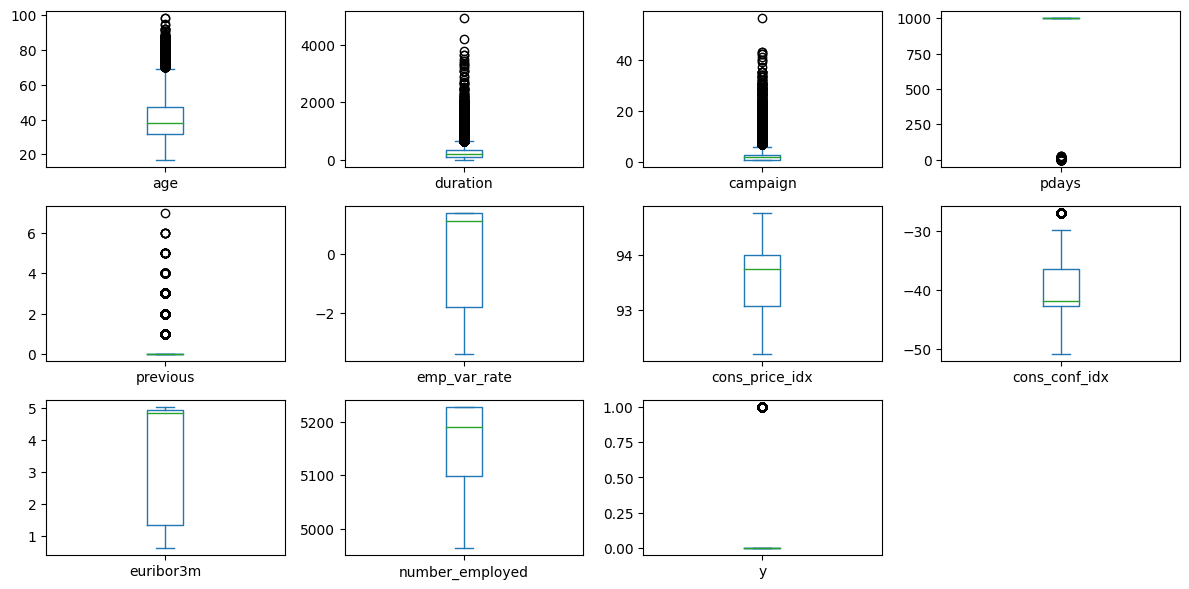

In [ ]:
# Create Boxplot Chart

df.plot(figsize=(12,6), layout=(3,4), subplots=True, kind='box');
plt.tight_layout();

In [ ]:
# Create Function to Detect Outlier

def detect_outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)

    return df[(df[column] < lower) | (df[column] > upper)]

for i in df.select_dtypes('number'):
    data = detect_outlier(df, i)
    if len(data) == 0:
        print(f'{i} has no outlier detected')
    else:
        total = len(data)*100/len(df)
        positive = len(data[data['y'] == 1])*100/len(df[df['y'] == 1])
        negative = len(data[data['y'] == 0])*100/len(df[df['y'] == 0])
        print(f'{i} has {total.__round__(2)}% outlier detected with target 0 contains {negative.__round__(2)}% and target 1 contains {positive.__round__(2)}%\n')

age has 1.14% outlier detected with target 0 contains 0.68% and target 1 contains 4.76%

duration has 7.2% outlier detected with target 0 contains 3.93% and target 1 contains 32.9%

campaign has 5.84% outlier detected with target 0 contains 6.28% and target 1 contains 2.39%

pdays has 3.68% outlier detected with target 0 contains 1.5% and target 1 contains 20.85%

previous has 13.66% outlier detected with target 0 contains 11.29% and target 1 contains 32.31%

emp_var_rate has no outlier detected
cons_price_idx has no outlier detected
cons_conf_idx has 1.08% outlier detected with target 0 contains 0.73% and target 1 contains 3.88%

euribor3m has no outlier detected
number_employed has no outlier detected
y has 11.27% outlier detected with target 0 contains 0.0% and target 1 contains 100.0%



Data *campaign* dan *duration* memiliki beberapa *gap outlier* yang cukup jauh dari data pusat, namun outlier ini akan dibiarkan karena tidak ada yang mencurigakan dari data outlier tersebut. <br>
Sedangkan data yang termasuk dalam *range outlier* juga dibiarkan karena sebagian besar mengandung informasi dari *client* yang menerima penawaran *campaign*.

## 3.8. Campaign Result Proportion

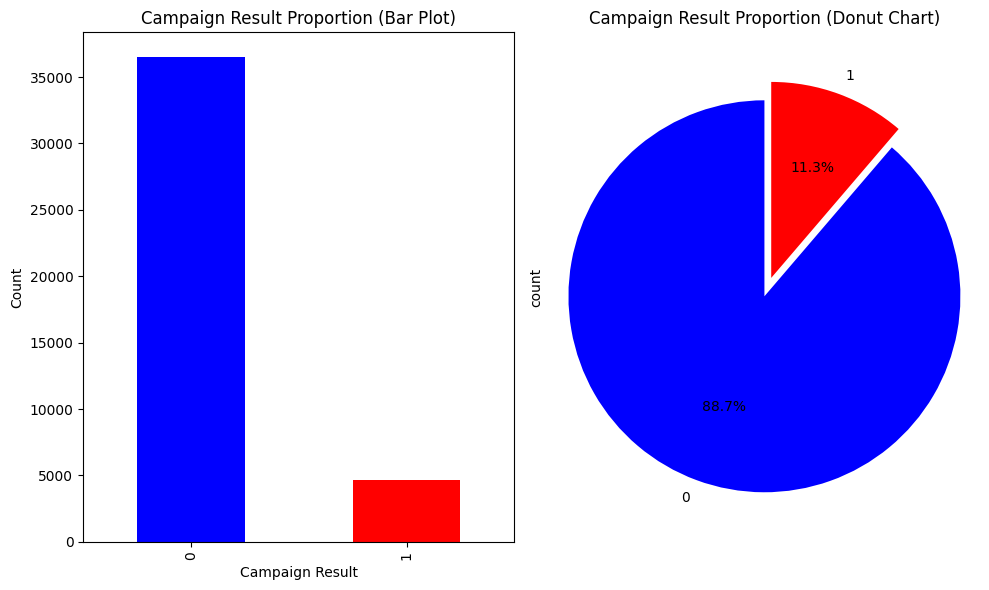

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Bar Plot
df['y'].value_counts().plot(kind='bar', ax=axes[0], color=['blue', 'red'])
axes[0].set_title('Campaign Result Proportion (Bar Plot)')
axes[0].set_xlabel('Campaign Result')
axes[0].set_ylabel('Count')

# Pie Chart Donut
colors = ['blue', 'red']
explode = (0.1, 0)
df['y'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, ax=axes[1])
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
axes[1].set_title('Campaign Result Proportion (Donut Chart)')
plt.axis('equal')

plt.tight_layout()
plt.show()


- Jumlah *client* yang tidak menerima penawaran "Term Deposit" (y=0) lebih banyak dibandingkan dengan *client* yang menerima penawaran (y=1).

- Hal ini menunjukkan bahwa kampanye pemasaran yang dilakukan belum terlalu efektif dalam mengkonversi *client* untuk menerima penawaran "Term Deposit".

- Perlu dilakukan analisis lebih lanjut untuk memahami alasan di balik penolakan penawaran "Term Deposit".

- Perlu optimasi strategi pemasaran agar lebih efektif dalam mengkonversi *client*.

- Mungkin perlu dipertimbangkan penyesuaian penawaran atau target pasar agar lebih menarik bagi *client*.

## 3.9. Save Cleaned Dataset

In [ ]:
from google.colab import files

df.to_csv('Cleaned_Bank_Marketing_Campaign.csv', encoding = 'utf-8-sig', index=False)
files.download('Cleaned_Bank_Marketing_Campaign.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File 'Cleaned_Bank_Marketing_Campaign.csv' disimpan dalam [Link Drive](https://drive.google.com/file/d/12wSDT0rtFM5poP0HZCUxEQP_Qk4Ej1nX/view?usp=sharing)

# 4. Exploratory Data Analysis

## 4.1. Bank Client Data

### Age

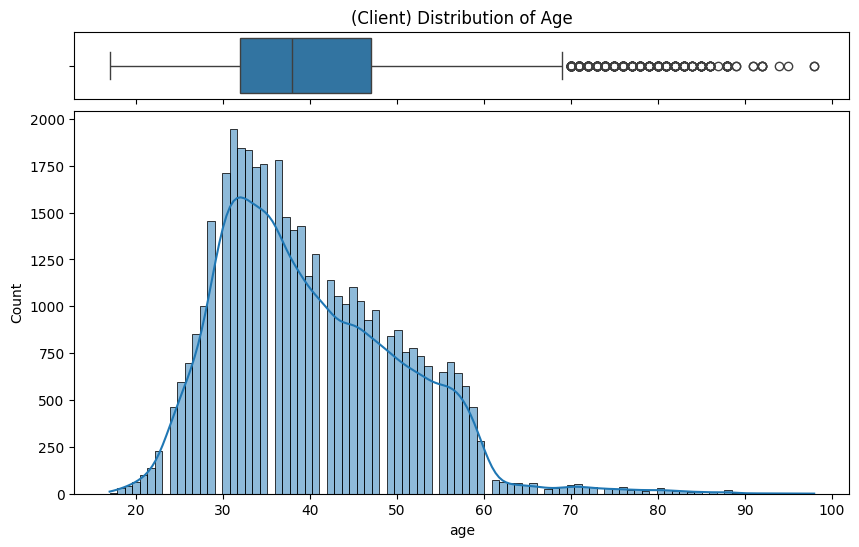

In [ ]:
# Create Histogram and Boxplot

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (10, 6),
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})
sns.boxplot(x = df['age'], ax=ax1)
sns.histplot(data = df, x='age', kde=True, ax=ax2)
ax1.set_title(f"(Client) Distribution of Age")
plt.show()

In [ ]:
# Detect Outlier in Column 'Age'

data_outlier = detect_outlier(df, 'age')
print(f'kolom "age" memiliki {len(data_outlier)} outlier terdeteksi')


kolom "age" memiliki 468 outlier terdeteksi


In [ ]:
# Calculate the percentage of 'y' for each age group
age_y_percentage = df.groupby('age')['y'].mean() * 100

# Create a DataFrame for better visualization
age_y_percentage_df = pd.DataFrame({'age': age_y_percentage.index, 'y_percentage': age_y_percentage.values})

# Display the table
age_y_percentage_df


age  y_percentage
0    17     40.000000
1    18     42.857143
2    19     47.619048
3    20     35.384615
4    21     28.431373
5    22     26.277372
6    23     21.238938
7    24     18.614719
8    25     15.551839
9    26     17.478510
10   27     13.411765
11   28     15.084915
12   29     12.801101
13   30     11.785298
14   31     11.299435
15   32      9.972900
16   33     11.456628
17   34     10.544413
18   35      9.499431
19   36      8.656549
20   37      9.288136
21   38     10.163468
22   39      7.972028
23   40      7.235142
24   41      8.848865
25   42      7.968476
26   43      8.341232
27   44      7.616222
28   45      8.257713
29   46      7.669903
30   47      6.256742
31   48      9.908069
32   49      6.555423
33   50      9.942857
34   51      9.549072
35   52     10.397946
36   53      9.276944
37   54      9.356725
38   55      8.655332
39   56     11.363636
40   57      9.597523
41   58     10.069444
42   59     14.902808
43   60     20.494700
44   61     43.835616
45   62     40.322581
46   63     30.909091
47   64     47.368421
48   65     52.272727
49   66     50.877193
50   67     42.307692
51   68     45.454545
52   69     41.176471
53   70     40.425532
54   71     40.384615
55   72     38.235294
56   73     38.235294
57   74     46.875000
58   75     45.833333
59   76     52.941176
60   77     65.000000
61   78     51.851852
62   79     50.000000
63   80     58.064516
64   81     40.000000
65   82     64.705882
66   83     47.058824
67   84     42.857143
68   85     46.666667
69   86     62.500000
70   87    100.000000
71   88     40.909091
72   89    100.000000
73   91      0.000000
74   92     75.000000
75   94      0.000000
76   95      0.000000
77   98    100.000000

Data pada kolom "age" memiliki 468 baris yang teridentifikasi sebagai outlier.
Menghapus semua baris outlier pada kolom "age"  dianggap sebagai keputusan yang buruk karena setengah dari baris tersebut memiliki nilai y "yes", yang menunjukkan bahwa klien yang berusia lebih dari 69 tahun sangat mungkin untuk berlangganan deposito. Untuk saat ini, kolom "age" ini akan dipertahankan seperti apa adanya.

Berdasarkan Histogram di atas menunjukkan pattern pada range usia tertentu. Oleh karena itu, untuk mempermudah analisis dilakukan pembagian rentang usia ke dalam 6 groups yang memiliki interval 10 tahun.

1. **Young Adults** (17-25)
   - Menyasar individu muda yang baru memasuki dunia dewasa, biasanya berfokus pada pendidikan dan awal karier.
   
2. **Emerging Adults** (26-35)
   - Kelompok ini sedang dalam fase peralihan, mendalami karier dan membangun relasi yang lebih kuat.

3. **Mid Adults** (36-45)
   - Segmen ini sering kali berada di puncak karier dan menghadapi tanggung jawab keluarga yang lebih besar.

4. **Established Adults** (46-55)
   - Individu yang berada pada fase stabil dalam karier dan kehidupan pribadi, sering kali fokus pada persiapan pensiun.

5. **Late Adults** (56-65)
   - Individu yang mendekati pensiun, mungkin mulai memikirkan rencana pensiun dan perjalanan hidup.

6. **Elderly** (over 65)
   - Kelompok ini biasanya sudah pensiun dan mungkin lebih fokus pada aktivitas rekreasi dan kesehatan.

[(Referensi)](https://www.researchgate.net/publication/338842581_A_cross-sectional_study_on_interference_control_age_affects_reactive_control_but_not_proactive_control)

In [ ]:
# Create Function for Grouping 'Age'

def age_range(age):
  if age <= 25:
    return 'Young Adults'
  elif age <= 35:
    return 'Emerging Adults'
  elif age <= 45:
    return 'Mid Adults'
  elif age <= 55:
    return 'Established Adults'
  elif age <= 65:
    return 'Late Adults'
  else:
    return 'Elderly'

df['age_range'] = df['age'].apply(lambda x: age_range(x))

In [ ]:
# Create a contingency table
contingency_table_age = pd.crosstab(df['age_range'], df['y'])
contingency_table_age = contingency_table_age.reindex(['Young Adults', 'Emerging Adults', 'Mid Adults', 'Established Adults', 'Late Adults', 'Elderly'])

# Calculate percentages within each age range
contingency_table_percentage_age  = contingency_table_age .div(contingency_table_age.sum(axis=1), axis=0) * 100


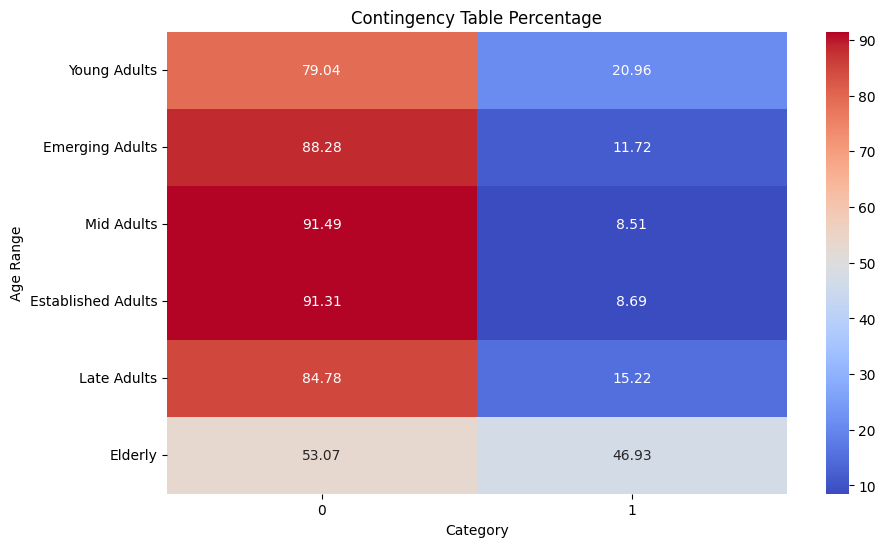

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(contingency_table_percentage_age.loc[['Young Adults', 'Emerging Adults', 'Mid Adults', 'Established Adults', 'Late Adults', 'Elderly']], annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Contingency Table Percentage")
plt.xlabel("Category")
plt.ylabel("Age Range")
plt.show()


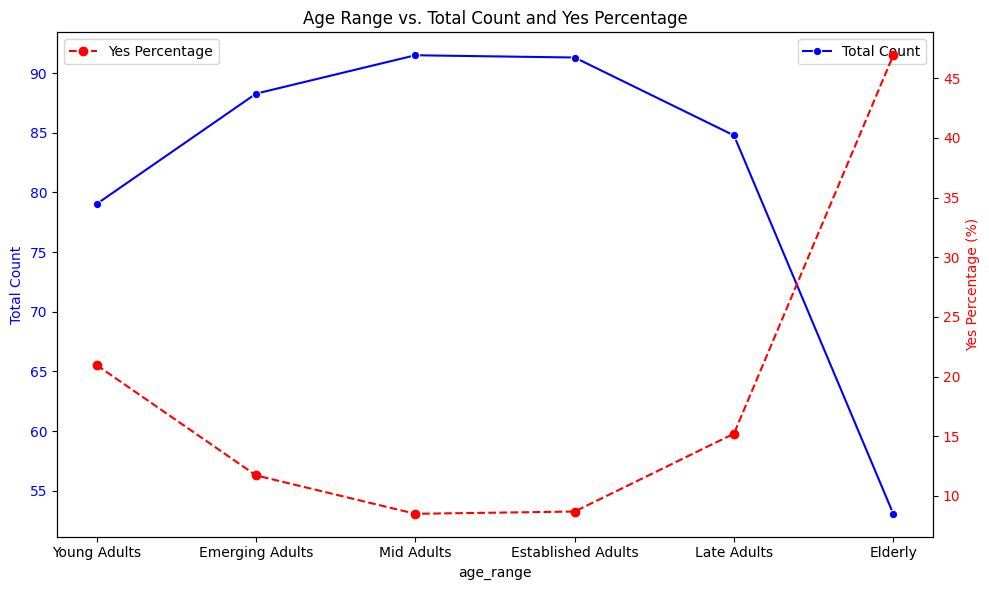

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Line chart for total count
ax1 = sns.lineplot(x=contingency_table_percentage_age.index, y=contingency_table_percentage_age[0], color='blue', marker='o', label='Total Count')
ax1.set_ylabel("Total Count", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart for 'yes' percentage
ax2 = ax1.twinx()
ax2.plot(contingency_table_percentage_age.index, contingency_table_percentage_age[1], color='red', marker='o', label='Yes Percentage', linestyle='--')
ax2.set_ylabel("Yes Percentage (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and legend
plt.title("Age Range vs. Total Count and Yes Percentage")
plt.legend(loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()


Berdasarkan dua grafik di atas, dapat disimpulkan bahwa:
1. Pada 'Elderly' (over 65) memiliki persentase keberhasilan campaign tertinggi, yaitu sekitar 47%

 Hal ini mungkin disebabkan oleh beberapa faktor:

 - **Financial Stability:**  Orang-orang di rentang usia ini cenderung memiliki stabilitas finansial yang lebih baik, sehingga lebih mampu untuk berinvestasi dalam deposito.
 - **Retirement Planning:**  Mereka mungkin mulai memikirkan perencanaan pensiun dan deposito menjadi salah satu pilihan investasi untuk masa depan.
 - **Experience:**  Mereka memiliki pengalaman dan pengetahuan yang lebih baik dalam mengelola keuangan, sehingga lebih bijaksana dalam mengambil keputusan investasi.
 - **Needs:**  Mungkin saja ada kebutuhan khusus seperti biaya kesehatan atau pendidikan anak yang mendorong mereka untuk berinvestasi.

2.  Pada 'Mid Adults' (36-45) dan 'Established Adults' (46-55) memiliki persentase keberhasilan campaign terendah, yaitu sekitar 8%.

  Hal ini mungkin disebabkan oleh beberapa faktor:

  - **Financial Stability**: Kelompok usia ini mungkin menghadapi tanggung jawab keuangan yang lebih tinggi (misalnya, cicilan rumah, pendidikan anak) yang dapat membuat mereka kurang tertarik untuk berinvestasi dalam deposito berjangka.
  - **Career Focus**: Individu dalam kelompok usia ini mungkin lebih fokus pada kemajuan karir dan kurang cenderung mengalokasikan sumber daya untuk tabungan.
  - **Life Stage**: Kelompok usia ini mungkin menghadapi berbagai peristiwa kehidupan (misalnya, berganti pekerjaan, komitmen keluarga) yang dapat memengaruhi pengambilan keputusan mereka terkait deposito berjangka.
  - **Risk Aversion**: Kelompok usia ini mungkin memiliki toleransi risiko yang berbeda dibandingkan dengan kelompok usia lainnya, yang berpotensi mengarah pada minat yang lebih rendah terhadap deposito berjangka.



**Rekomendasi Strategi Promosi:**

**a. 'Elderly' (usia di atas 65 tahun)**

Pelanggan Elderly (usia di atas 65 tahun) memiliki persentase keberhasilan kampanye tertinggi, mencapai sekitar 47%. Untuk mempertahankan dan meningkatkan angka keberhasilan ini, kami menyarankan strategi promosi berikut:

1. **Promosi Berbasis Keamanan dan Stabilitas:**
    - Menawarkan program deposito berjangka dengan tingkat bunga kompetitif yang dikhususkan untuk pelanggan Elderly.
    - Menekankan aspek keamanan dan stabilitas investasi deposito berjangka, yang sangat relevan bagi para lansia yang ingin mengamankan dana pensiun mereka.

2. **Promosi Berbasis Kesehatan dan Kesejahteraan:**
    - Menawarkan program khusus yang memungkinkan pelanggan Elderly
      memanfaatkan dana deposito untuk perawatan kesehatan atau kebutuhan kesehatan mereka.
    - Menawarkan layanan kesehatan dan asuransi jiwa yang dapat diakses melalui dana deposito.

3. **Promosi Berbasis Pensiun:**
    - Memposisikan deposito berjangka sebagai solusi investasi yang aman dan efektif untuk merencanakan masa pensiun.
    - Menawarkan paket khusus yang memberikan benefit tambahan ketika memasuki masa pensiun.
    - Bermitra dengan panti jompo untuk meningkatkan program layanan ini



**b. 'Mid Adults' (36-45) dan 'Established Adults' (46-55)**

'Mid Adults' (36-45) dan 'Established Adults' (46-55) memiliki persentase keberhasilan *campaign* yang rendah,
 sekitar 8%. Hal ini disebabkan beberapa faktor seperti tanggung jawab keuangan yang tinggi, fokus pada karier, dan berbagai peristiwa kehidupan yang memengaruhi pengambilan keputusan mereka. Untuk  meningkatkan angka keberhasilan *campaign* ini, kami menyarankan strategi promosi berikut:


1. **Penawaran Fleksibel dan Produk yang Sesuai Kebutuhan:**
    - **Produk Deposito dengan Fleksibilitas:**
        - Kembangkan program deposito dengan jangka waktu yang lebih pendek dan fleksibel,
          yang memberikan opsi penarikan dana secara parsial untuk memenuhi kebutuhan mendesak.
        -  Tawarkan opsi deposito dengan tenor yang bervariasi untuk mengakomodasi kebutuhan dan preferensi finansial mereka.
    - **Promosi Berbasis Kebutuhan:**
        - Tawarkan program deposito yang dapat dikaitkan dengan tujuan keuangan spesifik, seperti pendidikan anak atau dana darurat.
        -  Tawarkan promo khusus untuk menunjang tujuan finansial yang relevan dengan kelompok usia ini, seperti pengeluaran untuk pendidikan anak atau merenovasi rumah.


2. **Layanan Perencanaan Keuangan yang Komprehensif:**
    - **Konsultasi Keuangan Pribadi:**
        - Berikan layanan konsultasi keuangan yang komprehensif dan personal untuk membantu mereka membuat keputusan investasi yang tepat.
        - Menawarkan konsultasi yang memberikan saran investasi yang disesuaikan dengan profil risiko dan tujuan finansial mereka.
    - **Edukasi Finansial:**
        - Berikan edukasi finansial yang komprehensif tentang keuntungan berinvestasi dalam deposito berjangka.
        -  Memperhatikan tingkat literasi finansial dan memberikan informasi yang mudah dipahami, menarik, dan relevan dengan kebutuhan mereka.

3. **Peningkatan Kampanye Digital dan Strategi Pemasaran Tertarget:**
    - **Penyesuaian Kampanye Digital:**
        - Optimasi kanal digital, seperti media sosial dan email marketing untuk menjangkau segmen ini dengan pesan yang relevan.
    - **Cross-Selling:**
        - Gabungkan penawaran deposito berjangka dengan produk keuangan lainnya, seperti asuransi jiwa atau investasi reksa dana.
        -  Meningkatkan peluang penjualan dengan menawaran produk lain yang berhubungan dan menarik bagi segmen tersebut.


4. **Partnership dengan Perusahaan Relevan:**
    - **Kolaborasi dengan Sekolah tertentu:**
        - Kerjasama dengan sekolah yang menjadi target pasar segmen ini, menawarkan program deposito berjangka yang mendukung kebutuhan pendidikan anak.
        - Menawarkan reward atau benefit tambahan menarik untuk pelanggan yang menggunakan produk investasi ini.
    - **Kerjasama dengan Developer Properti:**
        - Kolaborasi dengan pengembang properti dalam menawarkan program deposito berjangka yang menarik untuk pendanaan pembelian properti baru atau renovasi rumah.
        - Tawarkan promo khusus bagi mereka yang memiliki KPR.

### Job

Penjelasan detail untuk setiap kategori pada kolom 'job':

**'Administrative staff':**
   -  Pegawai kantor yang bertanggung jawab atas tugas-tugas administratif seperti pengarsipan, pengolahan data, dan komunikasi.
   -  Biasanya bekerja di lingkungan kantor dan memiliki peran penting dalam mendukung operasional sehari-hari organisasi.


**'Blue-collar workers':**
   -  Pekerja manual yang melakukan pekerjaan fisik seperti konstruksi.
   -  Seringkali terlibat dalam pekerjaan yang membutuhkan kekuatan fisik dan keterampilan teknis.


**'Management staff':**
   -  Individu yang bertanggung jawab atas perencanaan, pengorganisasian, dan pengawasan kegiatan suatu organisasi.
   -  Memiliki peran penting dalam mencapai tujuan organisasi dan mengelola sumber daya manusia dan material.


**'Entrepreneurs':**
   -  Orang yang memulai dan menjalankan bisnis mereka sendiri.
   -  Memiliki tanggung jawab penuh atas keberhasilan bisnis mereka, termasuk pengambilan keputusan, manajemen risiko, dan inovasi.


**'Housemaids':**
   -  Orang yang bekerja sebagai pembantu rumah tangga, bertanggung jawab atas pekerjaan rumah tangga seperti membersihkan, memasak, dan merawat anak.


**'Retired persons':**
   -  Individu yang telah berhenti bekerja dan menikmati masa pensiun.
   -  Mungkin memiliki penghasilan dari pensiun atau investasi.


**'Self-employed':**
   -  Orang yang bekerja sendiri, menjalankan bisnis mereka sendiri tanpa karyawan.
   -  Memiliki fleksibilitas dan otonomi dalam menjalankan pekerjaan mereka.


**'Services staff':**
   -  Pegawai yang memberikan layanan kepada pelanggan, seperti di bidang pariwisata, kesehatan, atau pendidikan.
   -  Memiliki keterampilan interpersonal yang baik dan fokus pada kepuasan pelanggan.


**'Students':**
   -  Individu yang sedang menempuh pendidikan di lembaga pendidikan seperti sekolah atau universitas.
   -  Mungkin bekerja paruh waktu untuk mendukung biaya pendidikan mereka.


**'Technician':**
   -  Orang yang memiliki keterampilan teknis dalam bidang seperti teknik, elektronik, atau komputer.
   -  Seringkali terlibat dalam pekerjaan yang membutuhkan pengetahuan dan keterampilan khusus.


**'Unemployed':**
   -  Individu yang sedang mencari pekerjaan dan tidak memiliki pekerjaan saat ini.




In [ ]:
# Create a contingency table
contingency_table_job = pd.crosstab(df['job'], df['y'])

contingency_table_job

y                 0     1
job                      
admin          9131  1360
blue-collar    8808   651
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1310   444
self-employed  1272   149
services       3644   323
student         602   279
technician     6018   731
unemployed      870   144

In [ ]:
# Calculate percentages within each job category
contingency_table_percentage_job = contingency_table_job.div(contingency_table_job.sum(axis=1), axis=0) * 100

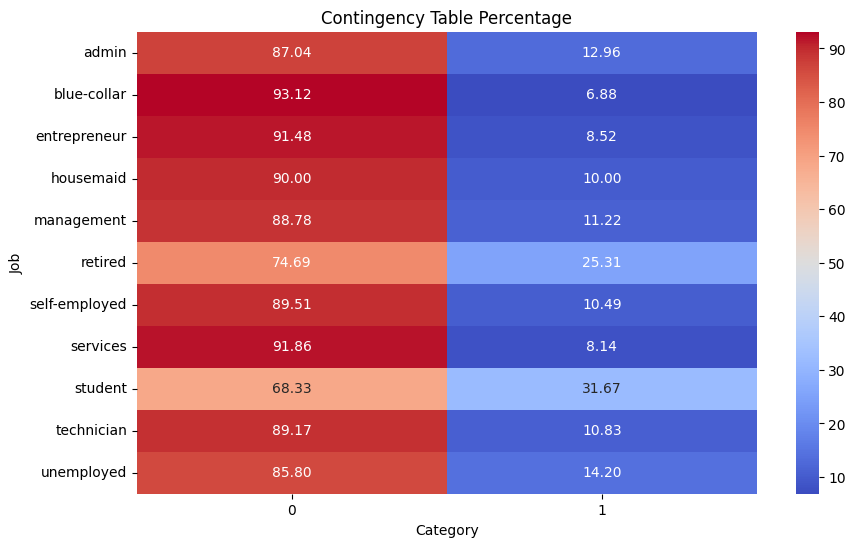

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(contingency_table_percentage_job, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Contingency Table Percentage")
plt.xlabel("Category")
plt.ylabel("Job")
plt.show()

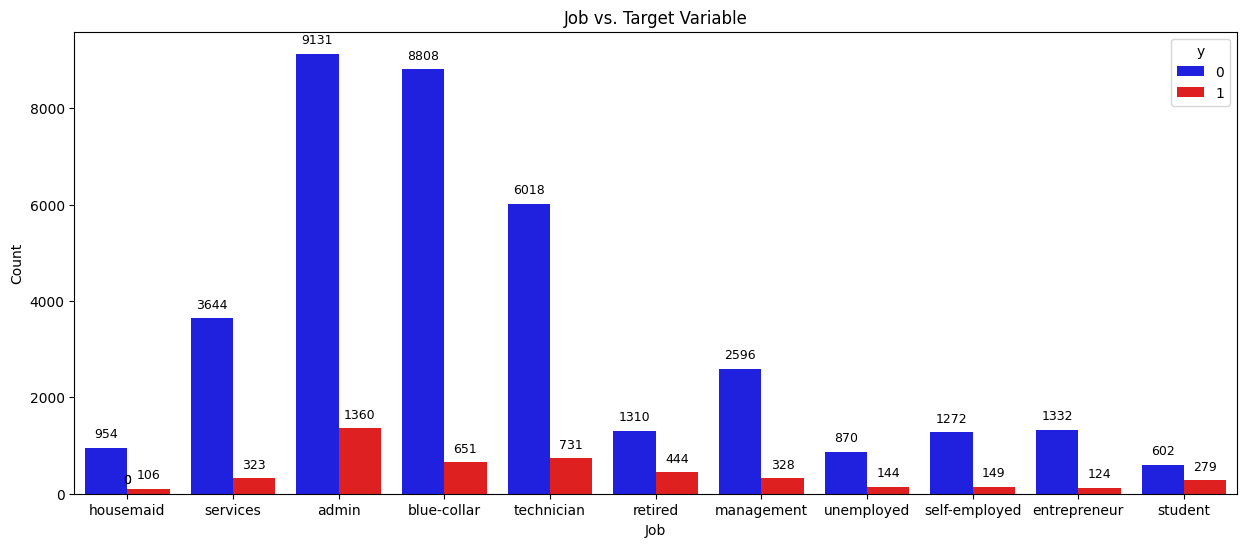

In [ ]:
# Create Bar Chart

plt.figure(figsize=(15, 6))
ax = sns.countplot(x='job', hue='y', data=df, palette={0:'blue', 1:'red'})
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job vs. Target Variable')
plt.show()

Berdasarkan grafik di atas, dapat disimpulkan bahwa:
1.  Pekerjaan "student" dan "retired" memiliki persentase keberhasilan campaign yang tinggi, yaitu sekitar 31% dan 25%

  Alasan mungkin untuk meningkatnya tingkat keberhasilan campaign pada "student" dan "retired":
   - **Student**:
     - **Financial planning**: 'student' mungkin memiliki kebutuhan untuk menabung untuk biaya pendidikan atau kebutuhan lainnya, sehingga mereka lebih cenderung mempertimbangkan deposito berjangka.
     - **Financial literacy**: 'student' mungkin memiliki pemahaman yang lebih baik tentang investasi dan produk keuangan, yang membuat mereka lebih mungkin untuk tertarik dengan deposito berjangka.
     - **Time horizon**: 'student' mungkin memiliki jangka waktu yang lebih panjang untuk investasi, yang membuat deposito berjangka menjadi pilihan yang menarik.
   - **Retired**:
     - **Financial security**: Pensiunan mungkin ingin memastikan keamanan finansial mereka di masa pensiun, dan deposito berjangka dapat memberikan stabilitas.
     - **Risk aversion**: Pensiunan mungkin memiliki toleransi risiko yang lebih rendah dibandingkan dengan orang yang lebih muda, yang membuat mereka lebih memilih opsi investasi yang lebih aman seperti deposito berjangka.


**Rekomendasi Strategi Promosi:**

**a. "Student"**

*Client* berstatus 'student' memiliki persentase keberhasilan campaign yang tinggi, sekitar 31%. Untuk mempertahankan dan meningkatkan angka keberhasilan ini, kami menyarankan strategi promosi berikut:

1. Menawarkan Promo Spesial untuk 'student'

  - **Diskon Bunga:** Berikan diskon khusus bunga deposito bagi 'student'.
  - **Paket Hemat:** Kembangkan paket deposito dengan jangka waktu fleksibel dan biaya administrasi yang rendah.
  - **Promosi Berbasis Kebutuhan:** Tawarkan program deposito yang dikhususkan untuk membantu 'student' memenuhi kebutuhan biaya pendidikan seperti SPP, buku, dan biaya hidup.


2. Kerjasama dengan Universitas dan Lembaga Pendidikan

  - **Penawaran Eksklusif:** Berikan penawaran eksklusif kepada 'student' yang berasal dari universitas atau lembaga pendidikan tertentu.
  - **Seminar dan Workshop:** Gelar seminar dan workshop tentang keuangan dan investasi untuk 'student'.
  - **Kerjasama Promosi:** Kolaborasi dengan organisasi 'student' untuk meningkatkan kesadaran tentang deposito berjangka.


3.  Meningkatkan Layanan Pelanggan

  - **Layanan Konsultasi:** Berikan layanan konsultasi keuangan yang ramah dan mudah diakses oleh 'student'.
  - **Responsif:** Pastikan respon yang cepat dan tanggap terhadap pertanyaan dan kebutuhan 'student' terkait deposito berjangka.


**b. "Retired"**

Pelanggan pensiunan memiliki persentase keberhasilan campaign yang tinggi, sekitar 25%. Untuk mempertahankan dan meningkatkan angka keberhasilan ini, kami menyarankan strategi promosi berikut:

1. Menawarkan Program Deposito yang Aman dan Stabil
  - **Tingkat Bunga Kompetitif:** Tawarkan tingkat bunga kompetitif yang menarik bagi pensiunan.
  * **Jangka Waktu Fleksibel:** Berikan pilihan jangka waktu deposito yang fleksibel dan sesuai dengan kebutuhan para pensiunan.
  * **Promosi Berbasis Keamanan dan Stabilitas:** Menekankan aspek keamanan dan stabilitas investasi deposito berjangka, yang sangat relevan bagi para pensiunan yang ingin mengamankan dana mereka.


2. Menawarkan Program Khusus untuk Pensiunan

  * **Layanan Kesehatan:** Bermitra dengan layanan kesehatan dan asuransi jiwa untuk menawarkan promo atau diskon kepada para pensiunan.
  * **Perencanaan Masa Tua:**  Tawarkan paket khusus yang memberikan benefit tambahan ketika memasuki masa pensiun.
  * **Sosialisasi Program:** Berikan sosialisasi program deposito yang dikhususkan untuk memenuhi kebutuhan para pensiunan.


3. Peningkatan Layanan Pelanggan

  * **Layanan Konsultasi:** Berikan layanan konsultasi keuangan yang ramah dan mudah diakses oleh para pensiunan.
  * **Layanan Antar Jemput:** Pertimbangkan layanan antar jemput untuk membantu para pensiunan yang tidak bisa datang ke kantor secara langsung.
  * **Responsif:** Pastikan respon yang cepat dan tanggap terhadap pertanyaan dan kebutuhan para pensiunan terkait deposito berjangka.

**c. "blue-collar"**

Pelanggan  "blue-collar" memiliki persentase keberhasilan campaign yang rendah, sekitar 6-8%. Untuk meningkatkan angka keberhasilan ini, kami menyarankan strategi promosi berikut:

1. Penawaran Fleksibel dan Produk yang Sesuai Kebutuhan:
    - Kembangkan program deposito dengan jangka waktu yang lebih pendek dan fleksibel,
      yang memberikan opsi penarikan dana secara parsial untuk memenuhi kebutuhan mendesak.
    - Tawarkan opsi deposito dengan tenor yang bervariasi untuk mengakomodasi kebutuhan dan preferensi finansial mereka.
2. Layanan Perencanaan Keuangan yang Komprehensif:
    - Berikan edukasi finansial yang komprehensif tentang keuntungan berinvestasi dalam deposito berjangka
      dengan fokus pada manfaat jangka pendek dan kemudahan akses.
    - Gunakan bahasa dan media yang mudah dipahami oleh pekerja blue-collar.
3. Peningkatan Kampanye Digital dan Strategi Pemasaran Tertarget:
    - Optimalkan kanal digital seperti media sosial dan SMS marketing untuk menjangkau segmen ini dengan pesan yang relevan.
    - Bermitra dengan perusahaan yang mempekerjakan banyak pekerja blue-collar untuk menjangkau target pasar.
4. Promosi Berbasis Kebutuhan:
    - Tawarkan program deposito yang dapat dikaitkan dengan tujuan keuangan spesifik seperti dana darurat atau pembelian kendaraan.

**d. "sevices"**

Pelanggan "services" memiliki persentase keberhasilan campaign yang rendah, sekitar 6-8%. Untuk meningkatkan angka keberhasilan ini, kami menyarankan strategi promosi berikut:

1. Penawaran Fleksibel dan Produk yang Sesuai Kebutuhan:
    - Kembangkan program deposito dengan jangka waktu yang lebih pendek dan fleksibel,
      yang memberikan opsi penarikan dana secara parsial untuk memenuhi kebutuhan mendesak.
    - Tawarkan opsi deposito dengan tenor yang bervariasi untuk mengakomodasi kebutuhan dan preferensi finansial mereka.
2. Layanan Perencanaan Keuangan yang Komprehensif:
    - Berikan edukasi finansial yang komprehensif tentang keuntungan berinvestasi dalam deposito berjangka
      dengan fokus pada manfaat jangka pendek dan kemudahan akses.
    - Berikan konsultasi keuangan yang mudah diakses dan fleksibel dengan jadwal kerja mereka.
3. Peningkatan Kampanye Digital dan Strategi Pemasaran Tertarget:
    - Optimalkan kanal digital seperti media sosial dan email marketing untuk menjangkau segmen ini dengan pesan yang relevan.
    - Bermitra dengan perusahaan yang mempekerjakan banyak pekerja jasa untuk menjangkau target pasar.
4. Promosi Berbasis Kebutuhan:
    - Tawarkan program deposito yang dapat dikaitkan dengan tujuan keuangan spesifik, seperti dana liburan atau pendidikan anak.

**e. "entrepreneur"**

Pelanggan "entrepreneur" memiliki persentase keberhasilan campaign yang rendah, sekitar 6-8%. Untuk meningkatkan angka keberhasilan ini, kami menyarankan strategi promosi berikut:

1. Kemudahan Perjalanan Bisnis:
    - Berikan kemudahan akses dan layanan perbankan yang komprehensif untuk mendukung perjalanan bisnis mereka.
    - Bermitra dengan maskapai penerbangan, hotel, dan penyedia jasa perjalanan untuk memberikan penawaran eksklusif kepada para pengusaha.
2. Produk Deposito dengan Fleksibilitas dan Aksesibilitas:
    - Kembangkan program deposito dengan penarikan dana yang mudah dan fleksibel.
    - Tawarkan aksesibilitas online untuk mengelola deposito dan transaksi keuangan dengan mudah.
3. Layanan Perencanaan Keuangan yang Komprehensif:
    - Berikan layanan konsultasi keuangan yang komprehensif dan personal untuk membantu mereka membuat keputusan investasi yang tepat.
    - Fokus pada solusi finansial yang dapat membantu mereka meningkatkan bisnis dan mencapai tujuan keuangan mereka.
4. Peningkatan Kampanye Digital dan Strategi Pemasaran Tertarget:
    - Optimalkan kanal digital seperti media sosial dan email marketing untuk menjangkau segmen ini dengan pesan yang relevan.
    - Bermitra dengan asosiasi bisnis dan organisasi entrepreneur untuk menjangkau target pasar.
5. Promosi Berbasis Kebutuhan:
    - Tawarkan program deposito yang dapat dikaitkan dengan tujuan keuangan spesifik, seperti modal usaha, pengembangan bisnis, atau investasi jangka panjang.


### Marital

In [ ]:
# Create a contingency table
contingency_table_marital = pd.crosstab(df['marital'], df['y'])

contingency_table_marital

y             0     1
marital              
divorced   4135   476
married   22448  2540
single     9954  1623

In [ ]:
# Calculate percentages within each marital category
contingency_table_percentage_marital = contingency_table_marital.div(contingency_table_marital.sum(axis=1), axis=0) * 100

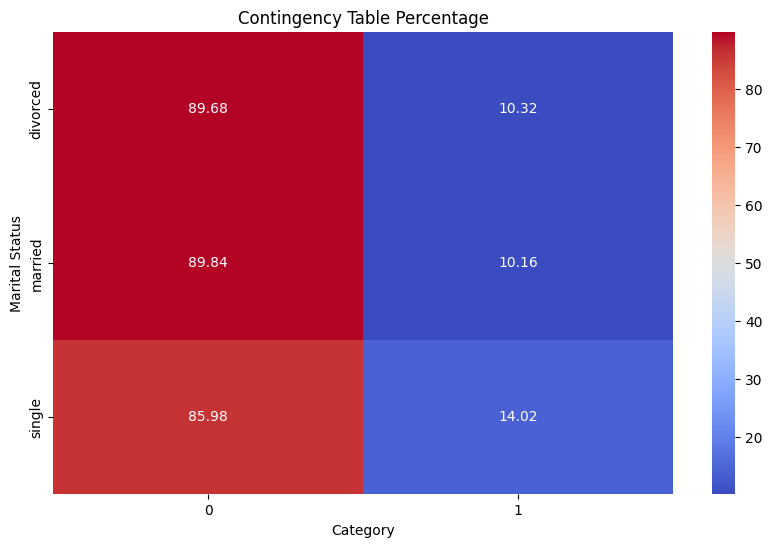

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(contingency_table_percentage_marital, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Contingency Table Percentage")
plt.xlabel("Category")
plt.ylabel("Marital Status")
plt.show()

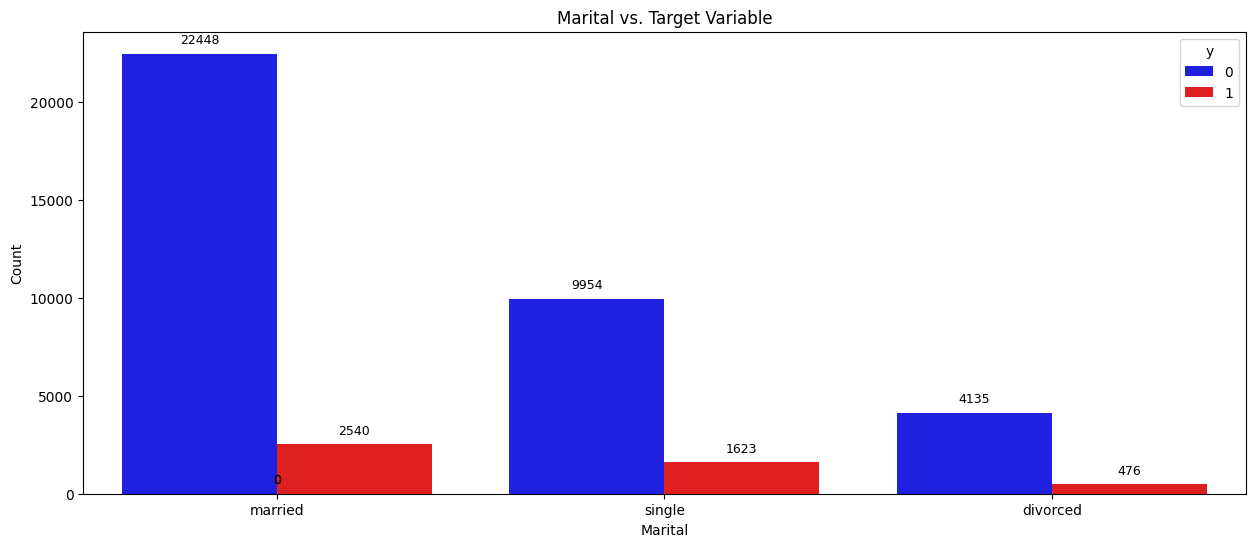

In [ ]:
# Create Bar Chart

plt.figure(figsize=(15, 6))
ax = sns.countplot(x='marital', hue='y', data=df, palette={0:'blue', 1:'red'})
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.title('Marital vs. Target Variable')
plt.show()

Berdasarkan grafik di atas, dapat disimpulkan bahwa:
 1.  Status pernikahan "single" memiliki persentase keberhasilan campaign yang tinggi, yaitu sekitar 14%
 Alasan mungkin untuk meningkatnya tingkat keberhasilan campaign pada "single":
        - **Financial flexibility**: Individu lajang mungkin memiliki lebih banyak fleksibilitas keuangan karena tidak memiliki tanggung jawab keuangan yang sama dengan individu yang sudah menikah.
        - **Investment focus**: Individu lajang mungkin lebih fokus pada investasi jangka panjang, termasuk deposito berjangka, karena tidak memiliki tanggung jawab keluarga yang sama dengan individu yang sudah menikah.
        - **Financial independence**: Individu lajang mungkin lebih mandiri secara finansial dan memiliki lebih banyak kebebasan untuk membuat keputusan investasi.



 2.  Status pernikahan "married" dan "divorced" memiliki persentase keberhasilan campaign yang rendah, yaitu sekitar 10%. Dengan asumsi Status pernikahan "married" dan "divorced" memiliki tanggungan anak untuk dibiayai. Oleh karena itu, alasan mungkin untuk rendahnya tingkat keberhasilan campaign pada "married" dan "divorced":
   - **Financial responsibility**: Individu yang sudah menikah atau bercerai mungkin memiliki tanggung jawab keuangan yang lebih besar, seperti biaya rumah tangga, anak-anak, atau utang. Hal ini dapat membuat mereka kurang mampu untuk berinvestasi dalam deposito berjangka.
   - **Financial priorities**: Individu yang sudah menikah atau bercerai mungkin memiliki prioritas keuangan yang berbeda, seperti memenuhi kebutuhan rumah tangga atau membayar utang. Hal ini dapat membuat mereka kurang tertarik dengan deposito berjangka.
   - **Risk aversion**: Individu yang sudah menikah atau bercerai mungkin memiliki toleransi risiko yang lebih rendah dibandingkan dengan individu yang lajang, yang membuat mereka lebih memilih opsi investasi yang lebih aman seperti deposito berjangka.
   - **Life stage**: Individu yang sudah menikah atau bercerai mungkin berada pada tahap hidup yang berbeda, seperti memiliki anak atau membeli rumah, yang dapat memengaruhi prioritas keuangan mereka.

**Rekomendasi Strategi Promosi:**

**a. "Single"**

Pelanggan dengan status 'single' memiliki persentase keberhasilan campaign yang tinggi, sekitar 14%. Untuk mempertahankan dan meningkatkan angka keberhasilan ini, kami menyarankan strategi promosi berikut:


1. Menawarkan Promo Spesial untuk 'single'
   - **Diskon Bunga:** Berikan diskon khusus bunga deposito bagi individu lajang.
   - **Paket Investasi Masa Depan:** Kembangkan paket deposito yang dikhususkan untuk membantu merencanakan masa depan finansial individu lajang, seperti investasi properti atau pendidikan.
   - **Promosi Berbasis Kebebasan Finansial:** Tawarkan program deposito yang dapat membantu mereka mencapai kebebasan finansial lebih cepat.

2. Menawarkan Layanan Konsultasi Keuangan yang Personal
   - **Perencanaan Keuangan Pribadi:** Berikan layanan konsultasi keuangan personal yang dapat membantu individu lajang merencanakan keuangan mereka secara efektif.
   - **Edukasi Keuangan:** Berikan edukasi keuangan yang relevan dengan kebutuhan dan tujuan finansial individu lajang.
   - **Layanan Online yang Ramah Pengguna:** Pastikan layanan online mudah diakses dan digunakan untuk membantu mereka mengelola keuangan secara mandiri.



**b. "Married" dan "Divorced"**

Pelanggan dengan status 'married' dan "Divorced" memiliki persentase keberhasilan campaign yang rendah, sekitar 10%. Untuk meningkatkan angka keberhasilan ini, kami menyarankan strategi promosi berikut:

1. Menawarkan Program Deposito yang Fleksibel dan Sesuai Kebutuhan Keluarga
   - **Paket Keluarga:** Kembangkan paket deposito yang dapat mengakomodasi kebutuhan finansial keluarga, seperti biaya pendidikan anak atau biaya rumah tangga.
   - **Penarikan Dana Fleksibel:** Berikan fleksibilitas dalam penarikan dana untuk memenuhi kebutuhan keluarga yang mendesak.
   - **Promosi Berbasis Keluarga:** Tawarkan promosi yang dapat dinikmati bersama keluarga, seperti diskon atau bonus untuk anggota keluarga.

2. Layanan Perencanaan Keuangan Keluarga
   - **Konsultasi Keuangan Keluarga:** Berikan layanan konsultasi keuangan yang komprehensif untuk membantu merencanakan keuangan keluarga secara efektif.
   - **Edukasi Keuangan Keluarga:** Berikan edukasi keuangan tentang cara mengelola keuangan keluarga dengan bijak dan efektif.
   - **Layanan Online Keluarga:** Pastikan layanan online mudah diakses dan digunakan oleh seluruh anggota keluarga.


### Education

 Penjelasan detail untuk setiap kategori pada kolom 'education':

**'Basic_4y':**
  -  Pendidikan dasar selama 4 tahun.
  -  Tingkat pendidikan dasar yang paling rendah.


**'Basic_6y':**
  -  Pendidikan dasar selama 6 tahun.
  -  Tingkat pendidikan dasar yang lebih tinggi dari 'Basic.4y'.


**'Basic_9y':**
  -  Pendidikan dasar selama 9 tahun.
  -  Tingkat pendidikan dasar yang paling tinggi.


**'High_school':**
  -  Pendidikan menengah atau SMA.
  -  Tingkat pendidikan menengah yang umum.


**'Professional_course':**
  -  Kursus profesional atau pelatihan khusus.
  -  Pendidikan yang berfokus pada keterampilan dan pengetahuan khusus untuk suatu bidang pekerjaan.


**'University_degree':**
  -  Gelar sarjana atau diploma universitas.
  -  Tingkat pendidikan tinggi yang diakui.
  

**'Illiterate':**
  -  Tidak bisa membaca dan menulis.
  -  Kategori untuk individu yang tidak memiliki kemampuan membaca dan menulis.



In [ ]:
# Create a contingency table
contingency_table_education = pd.crosstab(df['education'], df['y'])

contingency_table_education

y                        0     1
education                       
basic_4y              3863   476
basic_6y              2103   188
basic_9y              6102   504
high_school           8720  1109
illiterate              14     4
professional_course   4832   620
university_degree    10903  1738

In [ ]:
# Calculate percentages within each education category
contingency_table_percentage_education = contingency_table_education.div(contingency_table_education.sum(axis=1), axis=0) * 100

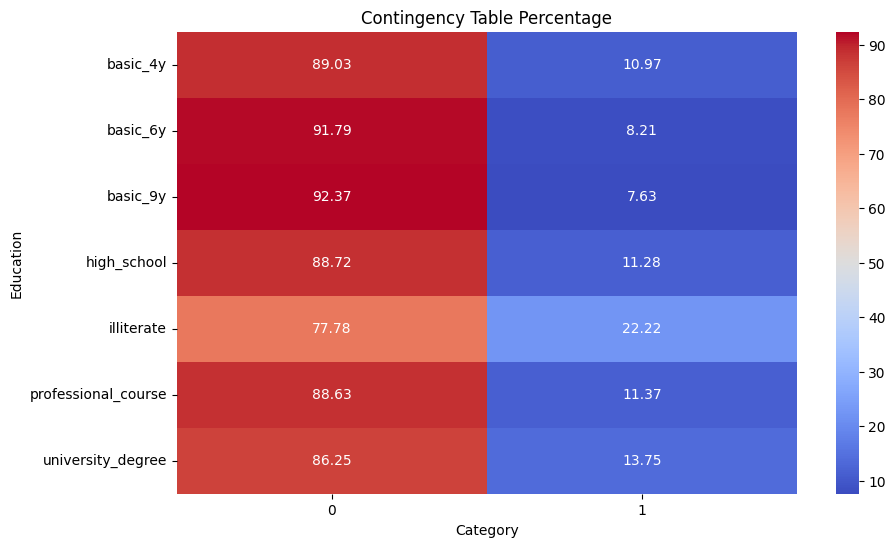

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(contingency_table_percentage_education, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Contingency Table Percentage")
plt.xlabel("Category")
plt.ylabel("Education")
plt.show()

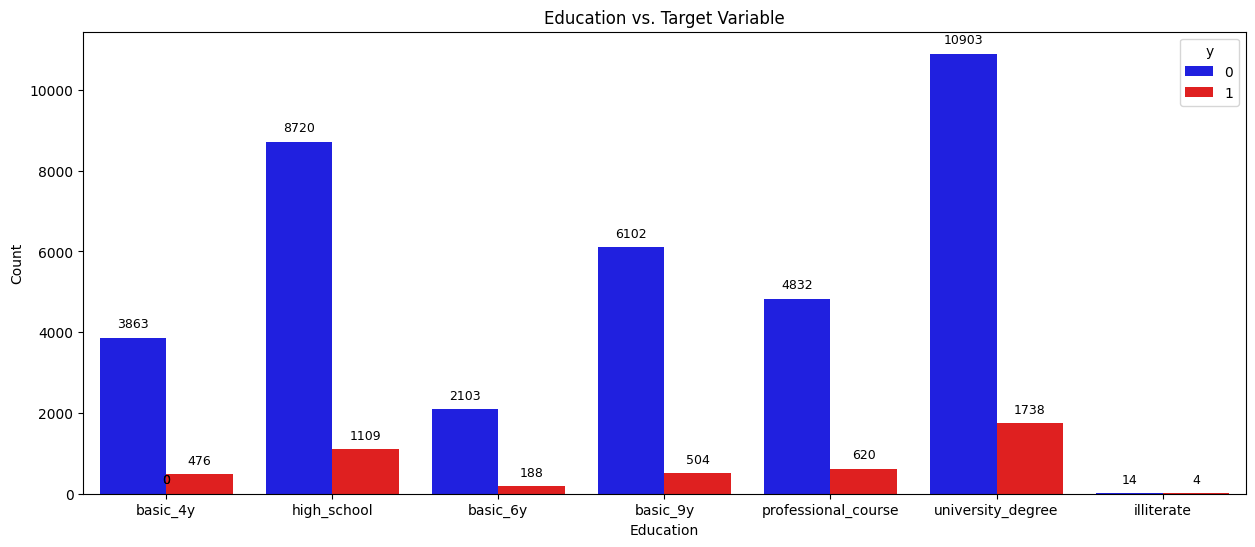

In [ ]:
# Create Bar Chart

plt.figure(figsize=(15, 6))
ax = sns.countplot(x='education', hue='y', data=df, palette={0:'blue', 1:'red'})
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education vs. Target Variable')
plt.show()

Berdasarkan grafik di atas, dapat disimpulkan bahwa:
 1.  Tingkat pendidikan "illiterate" memiliki persentase keberhasilan campaign yang tinggi, yaitu sekitar 22%
  
  Alasan mungkin untuk meningkatnya tingkat keberhasilan campaign pada "illiterate":
      - **Financial needs**: Individu yang buta huruf mungkin memiliki kebutuhan keuangan yang lebih tinggi karena keterbatasan akses ke peluang ekonomi.
      - **Financial literacy**: Individu yang buta huruf mungkin memiliki pemahaman yang lebih rendah tentang investasi dan produk keuangan, sehingga mereka lebih cenderung mempertimbangkan opsi investasi yang lebih sederhana seperti deposito berjangka.
      - **Risk aversion**: Individu yang buta huruf mungkin memiliki toleransi risiko yang lebih rendah dibandingkan dengan individu yang berpendidikan, yang membuat mereka lebih memilih opsi investasi yang lebih aman seperti deposito berjangka.

 2.  Tingkat pendidikan "basic_4y", "basic_6y", dan "basic_9y" memiliki persentase keberhasilan campaign yang rendah, yaitu sekitar 8-11%

   Alasan mungkin untuk menurunnya tingkat keberhasilan campaign pada "basic_4y", "basic_6y", dan "basic_9y":
    - **Financial literacy**: Individu dengan tingkat pendidikan dasar mungkin memiliki pemahaman yang lebih rendah tentang investasi dan produk keuangan, yang membuat mereka kurang tertarik dengan deposito berjangka.
    - **Financial stability**: Individu dengan tingkat pendidikan dasar mungkin memiliki stabilitas keuangan yang lebih rendah dibandingkan dengan individu dengan tingkat pendidikan yang lebih tinggi, yang membuat mereka kurang mampu untuk berinvestasi dalam deposito berjangka.
    - **Financial priorities**: Individu dengan tingkat pendidikan dasar mungkin memiliki prioritas keuangan yang berbeda, seperti memenuhi kebutuhan sehari-hari atau membayar utang.



**Rekomendasi Strategi Promosi:**

**a. "Illiterate"**

Pelanggan dengan tingkat pendidikan "Illiterate" memiliki persentase keberhasilan campaign yang tinggi, sekitar 22%. Untuk mempertahankan dan meningkatkan angka keberhasilan ini, kami menyarankan strategi promosi berikut:

1. Kemudahan Akses dan Layanan yang Ramah:
    - Gunakan bahasa yang sederhana dan mudah dipahami dalam semua komunikasi.
    - Sediakan layanan konsultasi keuangan yang personal dan mudah diakses,
      dengan dukungan staf yang ramah dan sabar.
    - Berikan pilihan media komunikasi yang beragam, seperti kunjungan langsung ke rumah atau penyampaian informasi melalui media visual seperti poster atau brosur.
    - Pastikan proses pembukaan deposito mudah dan sederhana, dengan minimal formulir dan persyaratan yang rumit.

2. Fokus pada Manfaat Jangka Panjang dan Keamanan:
    - Tekankan manfaat deposito berjangka dalam membangun stabilitas keuangan jangka panjang.
    - Sorot aspek keamanan deposito berjangka sebagai pilihan investasi yang terpercaya.
    - Gunakan contoh-contoh nyata dan ilustrasi yang mudah dipahami untuk menjelaskan manfaatnya.

3. Dukungan dan Pendampingan:
    - Berikan bantuan dan dukungan personal kepada pelanggan dalam memahami dan melakukan transaksi deposito berjangka.
    - Sediakan panduan tertulis atau visual yang sederhana dan mudah dipahami.
    - Jika memungkinkan, bermitra dengan organisasi sosial atau LSM yang membantu masyarakat buta huruf untuk memberikan edukasi keuangan dan dukungan dalam proses investasi.

4. Promosi yang Relevan dan Berdampak:
    - Tawarkan program deposito yang dikaitkan dengan kebutuhan dasar, seperti
     dana kesehatan atau biaya kebutuhan sehari-hari.
    - Berikan insentif atau bonus menarik yang mudah dipahami dan dinikmati.


**b. "Basic_4y", "Basic_6y", dan "Basic_9y"**

1. Edukasi Keuangan yang Sederhana dan Mudah Dipahami:
    - Kembangkan materi edukasi keuangan yang sederhana dan mudah dipahami, dengan bahasa dan visual yang menarik.
    - Gunakan analogi atau contoh-contoh yang relevan dengan kehidupan sehari-hari mereka.
    - Sediakan brosur, poster, atau video yang menjelaskan manfaat investasi deposito berjangka.

2. Kampanye yang Menekankan Pentingnya Stabilitas Keuangan Jangka Panjang:
    - Berikan pesan yang kuat tentang pentingnya membangun stabilitas keuangan jangka panjang melalui investasi yang aman seperti deposito berjangka.
    - Tunjukkan bagaimana deposito berjangka dapat membantu mereka mencapai tujuan keuangan jangka panjang, seperti membeli rumah atau mendanai pendidikan anak.
    - Gunakan testimonial atau cerita sukses dari pelanggan dengan tingkat pendidikan serupa yang telah berhasil mencapai tujuan keuangan mereka melalui deposito berjangka.

3. Program Deposito dengan Syarat dan Ketentuan yang Mudah dipahami:
    - Pastikan syarat dan ketentuan program deposito mudah dipahami dan tidak membingungkan.
    - Sediakan layanan konsultasi keuangan yang mudah diakses dan ramah pengguna.
    - Gunakan bahasa dan visual yang sederhana dan jelas dalam semua komunikasi terkait produk deposito berjangka.

4. Promosi dengan Insentif yang Menarik dan Relevan:
    - Tawarkan insentif atau bonus yang menarik dan relevan dengan kebutuhan mereka, seperti diskon bunga, hadiah, atau program loyalitas.
    - Berikan kesempatan bagi mereka untuk memenangkan hadiah atau mendapatkan keuntungan tambahan melalui program promo yang mudah dipahami dan diikuti.

5. Kerja Sama dengan Organisasi atau Lembaga yang Relevan:
    - Bermitra dengan organisasi atau lembaga yang bergerak di bidang pendidikan dan pemberdayaan masyarakat, seperti sekolah, pusat pelatihan, atau koperasi.
    - Gelar acara edukasi keuangan atau workshop yang dapat diikuti oleh masyarakat dengan tingkat pendidikan dasar.
    - Manfaatkan jaringan organisasi atau lembaga ini untuk menjangkau target pasar yang tepat.

### Default

Penjelasan detail untuk setiap kategori pada kolom 'default':

**'no':**
   -  Tidak memiliki riwayat gagal bayar kredit.
   -  Individu ini dianggap memiliki catatan kredit yang baik.

**'yes':**
   -  Memiliki riwayat gagal bayar kredit.
   -  Individu ini dianggap memiliki catatan kredit yang buruk.


In [ ]:
# Create a contingency table
contingency_table_default = pd.crosstab(df['default'], df['y'])

contingency_table_default

y            0     1
default             
no       36534  4639
yes          3     0

In [ ]:
# Calculate percentages within each default category
contingency_table_percentage_default = contingency_table_default.div(contingency_table_default.sum(axis=1), axis=0) * 100

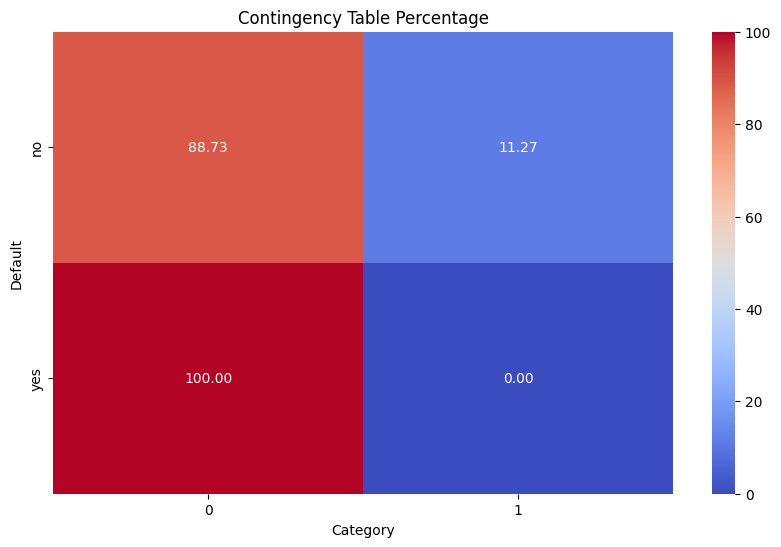

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_percentage_default, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Contingency Table Percentage")
plt.xlabel("Category")
plt.ylabel("Default")
plt.show()

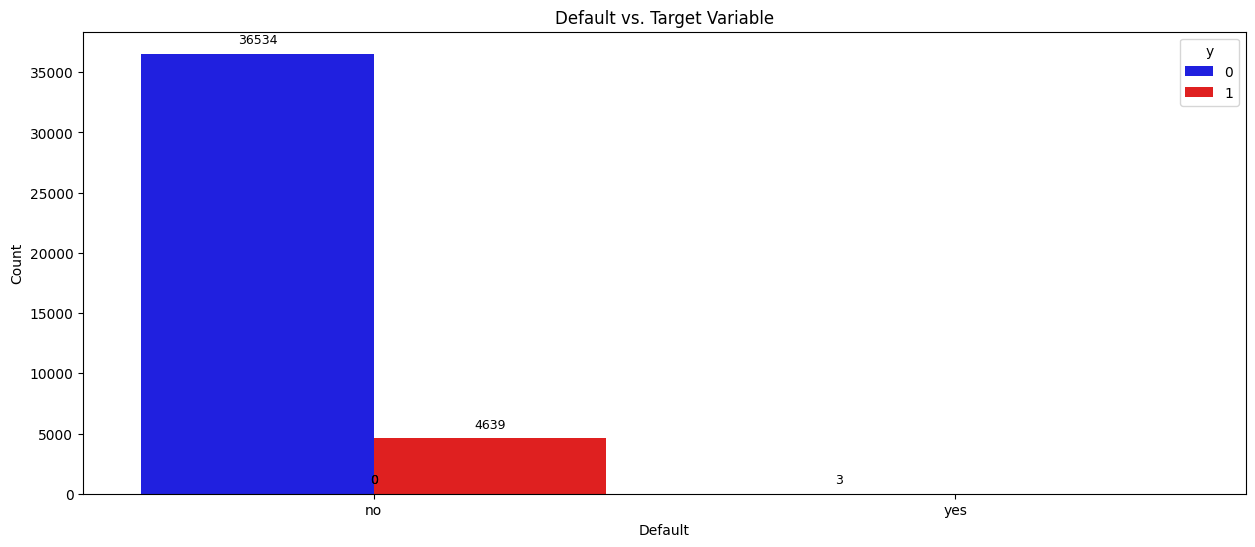

In [ ]:
# Create Bar Chart

plt.figure(figsize=(15, 6))
ax = sns.countplot(x='default', hue='y', data=df, palette={0:'blue', 1:'red'})
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Default vs. Target Variable')
plt.show()

Berdasarkan grafik di atas, dapat disimpulkan bahwa:

 1.  Status default "no" memiliki persentase keberhasilan campaign yang tinggi, yaitu sekitar 11%

   Alasan mungkin untuk meningkatnya tingkat keberhasilan campaign pada "no":
       - **Financial stability**: Individu yang tidak memiliki riwayat gagal bayar kredit cenderung memiliki stabilitas keuangan yang lebih baik, yang membuat mereka lebih mampu untuk berinvestasi dalam deposito berjangka.
       - **Creditworthiness**: Individu dengan riwayat kredit yang baik lebih mungkin untuk memenuhi syarat untuk produk keuangan lainnya, termasuk deposito berjangka.
       - **Financial responsibility**: Individu yang tidak memiliki riwayat gagal bayar kredit cenderung lebih bertanggung jawab secara finansial, yang membuat mereka lebih cenderung mempertimbangkan deposito berjangka sebagai cara untuk menabung dan merencanakan keuangan mereka.

 2.  Status default "yes" memiliki persentase keberhasilan campaign yang rendah, yaitu < 1%

   Alasan mungkin untuk menurunnya tingkat keberhasilan campaign pada "yes":
       - **Financial instability**: Individu dengan riwayat gagal bayar kredit mungkin mengalami kesulitan keuangan, yang membuat mereka kurang mampu untuk berinvestasi dalam deposito berjangka.
       - **Credit risk**: Individu dengan riwayat gagal bayar kredit mungkin dianggap sebagai risiko kredit yang lebih tinggi, yang membuat mereka kurang mungkin untuk memenuhi syarat untuk produk keuangan lainnya, termasuk deposito berjangka.
       - **Financial challenges**: Individu dengan riwayat gagal bayar kredit mungkin menghadapi tantangan keuangan yang membuat mereka kurang tertarik dengan deposito berjangka.
  
Berdasarkan analisis tersebut, strategi campaign dapat difokuskan pada segmentasi individu dengan status default "no" untuk meningkatkan peluang keberhasilan. Penawaran produk keuangan, seperti deposito berjangka, harus menyoroti stabilitas dan keuntungan jangka panjang, karena individu ini cenderung memiliki stabilitas keuangan dan tanggung jawab yang lebih tinggi. Untuk individu dengan status default "yes," pendekatan yang lebih suportif bisa digunakan, seperti menawarkan produk keuangan yang lebih fleksibel atau program pemulihan kredit, yang dapat membantu mereka memperbaiki stabilitas keuangan sebelum ditawarkan investasi jangka panjang seperti deposito berjangka.


### Housing

Penjelasan detail untuk setiap kategori pada kolom 'housing':

**'yes'**:
  -  Individu ini memiliki memiliki pinjaman rumah.

**'no'**:
  -  Individu ini tidak memiliki memiliki pinjaman rumah.



In [ ]:
# Create a contingency table
contingency_table_housing = pd.crosstab(df['housing'], df['y'])

contingency_table_housing

y            0     1
housing             
no       17473  2132
yes      19064  2507

In [ ]:
# Calculate percentages within each housing category
contingency_table_percentage_housing = contingency_table_housing.div(contingency_table_housing.sum(axis=1), axis=0) * 100

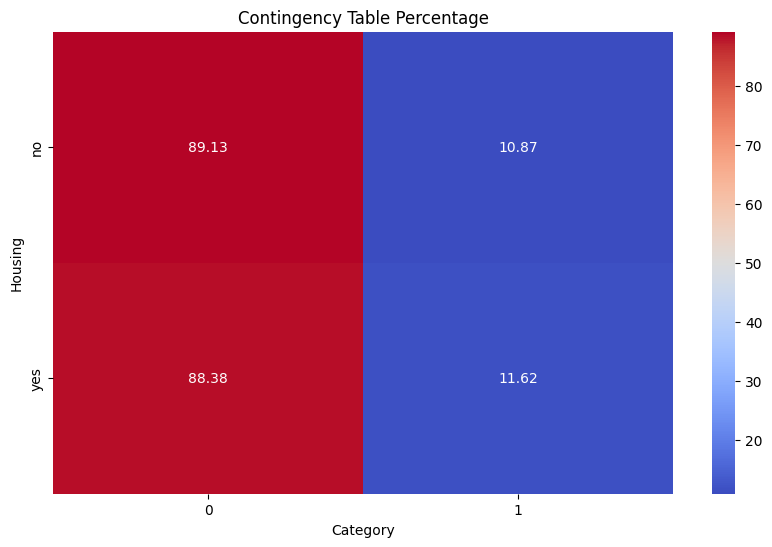

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_percentage_housing, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Contingency Table Percentage")
plt.xlabel("Category")
plt.ylabel("Housing")
plt.show()

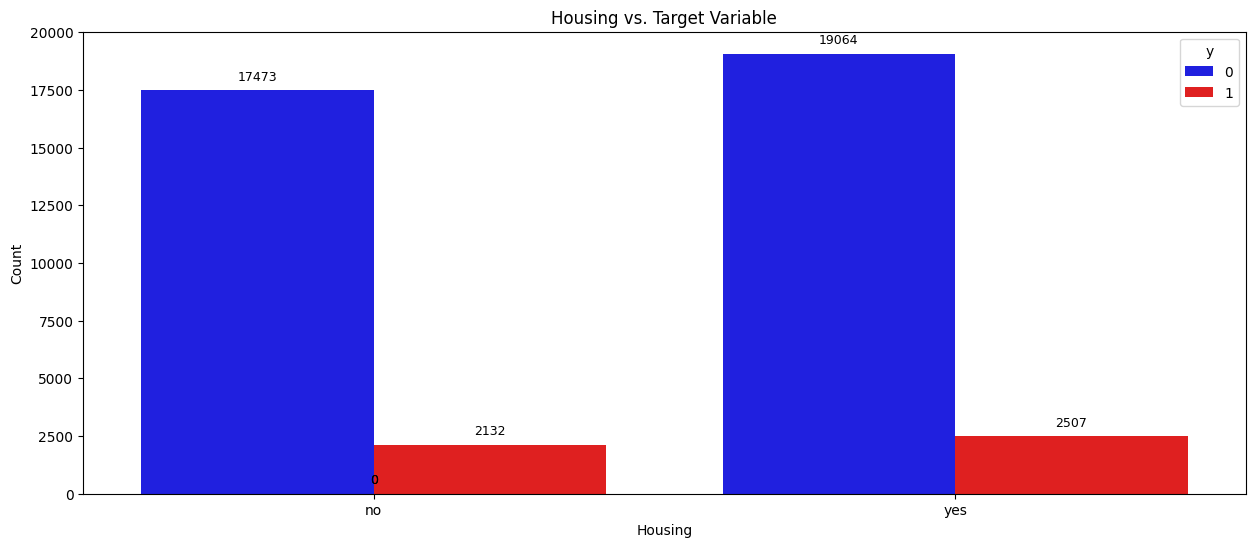

In [ ]:
# Create Bar Chart

plt.figure(figsize=(15, 6))
ax = sns.countplot(x='housing', hue='y', data=df, palette={0:'blue', 1:'red'})
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Housing vs. Target Variable')
plt.show()

Berdasarkan grafik di atas, dapat disimpulkan bahwa:

 1. Status kepemilikan rumah "yes" memiliki persentase keberhasilan campaign yang lebih tinggi  yaitu sekitar 11%.
   
   Alasan yang mungkin menjadi penyebabnya:
       - **Financial stability**: Individu dengan pinjaman rumah mungkin menunjukkan stabilitas keuangan yang lebih baik, karena mereka mampu memenuhi kewajiban pembayaran rumah.
       - **Homeownership**: Kepemilikan rumah bisa menjadi indikasi stabilitas dan tanggung jawab, yang dapat dilihat sebagai faktor positif oleh bank dalam menilai kelayakan nasabah.
       - **Longer-term financial planning**:  Kepemilikan rumah menunjukkan komitmen jangka panjang terhadap perencanaan keuangan. Individu ini mungkin lebih cenderung mempertimbangkan investasi jangka panjang seperti deposito berjangka.
  
2. Status housing "no" memiliki persentase keberhasilan campaign yang rendah, yaitu sekitar 10%.
   
   Alasan mungkin untuk menurunnya tingkat keberhasilan campaign pada "no":
     - **Financial responsibility**: Individu yang tidak memiliki pinjaman rumah mungkin memiliki tanggung jawab keuangan yang lebih besar, seperti biaya hidup atau utang lainnya.
     - **Financial priorities**: Individu yang tidak memiliki pinjaman rumah mungkin memiliki prioritas keuangan yang berbeda, seperti memenuhi kebutuhan sehari-hari atau membayar utang.
     - **Risk aversion**: Individu yang tidak memiliki pinjaman rumah mungkin memiliki toleransi risiko yang lebih rendah dibandingkan dengan individu yang memiliki pinjaman rumah, yang membuat mereka lebih memilih opsi investasi yang lebih aman seperti deposito berjangka.

Berdasarkan analisis di atas, campaign sebaiknya menargetkan individu dengan status kepemilikan rumah "yes," karena mereka cenderung lebih stabil secara finansial dan berkomitmen pada perencanaan jangka panjang. Penawaran deposito berjangka bisa ditekankan sebagai langkah logis dalam melengkapi perencanaan keuangan mereka. Untuk individu dengan status "no," campaign dapat menawarkan produk yang lebih fleksibel dan fokus pada edukasi manfaat deposito berjangka sebagai pilihan investasi aman yang membantu mereka mengelola keuangan secara lebih efektif tanpa mengganggu prioritas pengeluaran lainnya. Pendekatan yang lebih personal dan edukatif bisa meningkatkan keberhasilan campaign pada kelompok ini.

### Loan

Penjelasan detail untuk setiap kategori pada kolom 'loan':

'no':
  -  Tidak memiliki pinjaman pribadi.
  -  Individu ini tidak memiliki hutang dari pinjaman pribadi.

'yes':
  -  Memiliki pinjaman pribadi.
  -  Individu ini memiliki hutang dari pinjaman pribadi.



In [ ]:
# Create a contingency table
contingency_table_loan = pd.crosstab(df['loan'], df['y'])

contingency_table_loan

y         0     1
loan             
no    30972  3956
yes    5565   683

In [ ]:
# Calculate percentages within each loan category
contingency_table_percentage_loan = contingency_table_loan.div(contingency_table_loan.sum(axis=1), axis=0) * 100

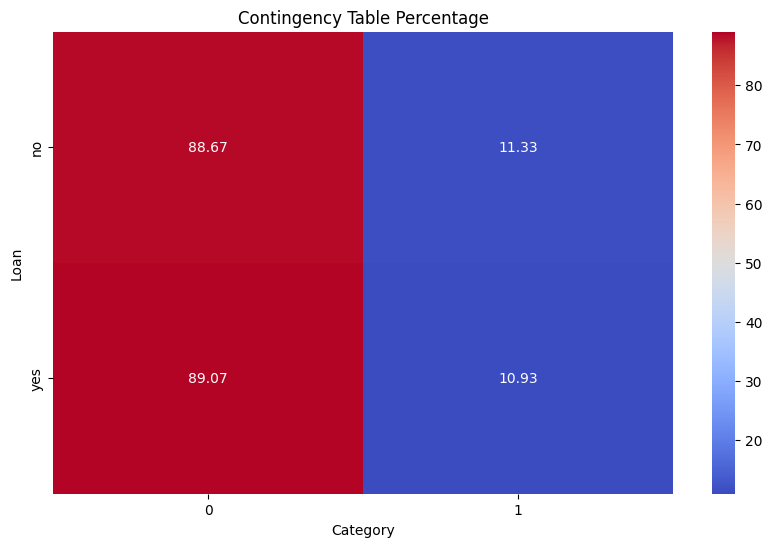

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_percentage_loan, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Contingency Table Percentage")
plt.xlabel("Category")
plt.ylabel("Loan")
plt.show()

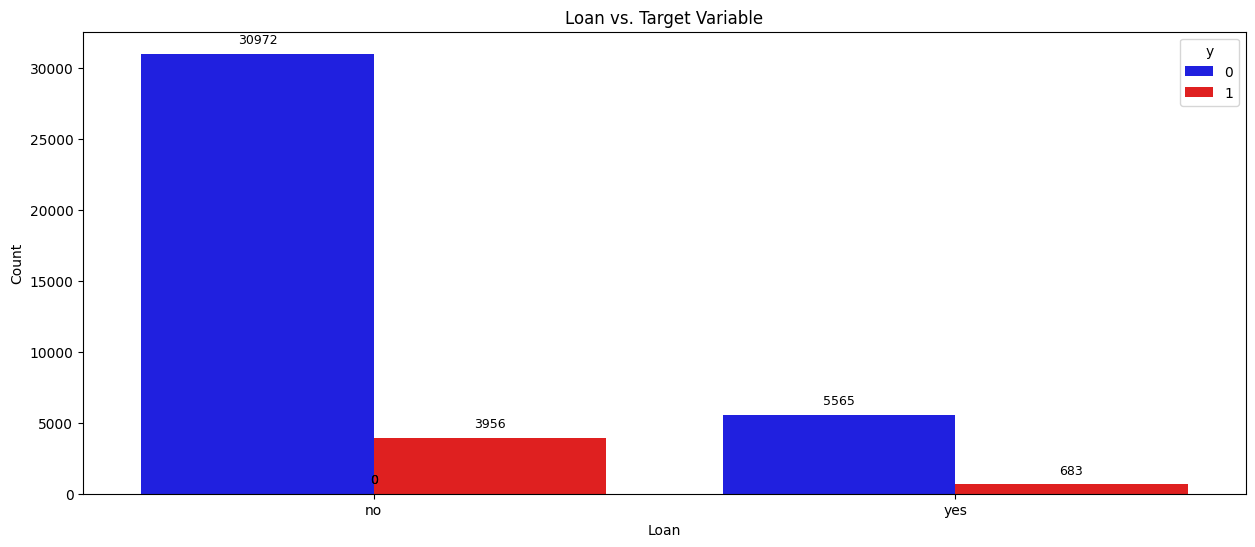

In [ ]:
# Create Bar Chart

plt.figure(figsize=(15, 6))
ax = sns.countplot(x='loan', hue='y', data=df, palette={0:'blue', 1:'red'})
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.title('Loan vs. Target Variable')
plt.show()

Berdasarkan grafik di atas, dapat disimpulkan bahwa:

  1.  Status loan "no" memiliki persentase keberhasilan campaign yang tinggi, yaitu sekitar 13%
  
    Alasan mungkin untuk meningkatnya tingkat keberhasilan campaign pada status loan "no":
        - **Financial flexibility**: Individu yang tidak memiliki pinjaman pribadi mungkin memiliki lebih banyak fleksibilitas keuangan untuk berinvestasi dalam deposito berjangka.
        - **Financial priorities**: Individu yang tidak memiliki pinjaman pribadi mungkin memiliki prioritas keuangan yang berbeda, seperti menabung untuk masa depan atau berinvestasi dalam produk keuangan lainnya.
  
  2.  Status loan "yes" memiliki persentase keberhasilan campaign yang rendah, yaitu sekitar 8%
  
    Alasan mungkin untuk menurunnya tingkat keberhasilan campaign pada status loan "yes":
        - **Financial responsibility**: Individu yang memiliki pinjaman pribadi mungkin memiliki tanggung jawab keuangan yang lebih besar, seperti membayar cicilan pinjaman, yang dapat membuat mereka kurang mampu untuk berinvestasi dalam deposito berjangka.
        - **Financial commitments**: Individu yang memiliki pinjaman pribadi mungkin memiliki komitmen keuangan yang lebih besar, yang dapat membuat mereka kurang tertarik dengan deposito berjangka.

Berdasarkan analisis tersebut, campaign dapat difokuskan pada individu dengan status loan "no" karena mereka memiliki fleksibilitas keuangan yang lebih besar dan cenderung berorientasi pada perencanaan masa depan. Penawaran deposito berjangka bisa ditekankan sebagai cara aman dan efektif untuk menabung. Sementara itu, untuk individu dengan status loan "yes," campaign bisa menawarkan solusi keuangan yang membantu mengelola beban pinjaman mereka, seperti program pengelolaan utang atau produk dengan syarat fleksibel sebelum mempromosikan deposito berjangka. Pendekatan ini dapat meningkatkan relevansi campaign dan peluang keberhasilannya.

### Uji Statistik Chi-Squared

In [ ]:
# Create Function Chi-square Test

def chi_square_test(df, column):

  contingency_table = pd.crosstab(df[column], df['y'])
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)

  if p_value < 0.05:
    conclusion = "Berpengaruh signifikan terhadap keberhasilan kampanye"
  else:
    conclusion = "Tidak berpengaruh signifikan terhadap keberhasilan kampanye"

  return {"kolom": column, "p_value": p_value, "kesimpulan": conclusion}

# List of columns to test
columns_to_test = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

# Perform chi-square test for each column
results = []
for column in columns_to_test:
  results.append(chi_square_test(df, column))

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results
results_df


kolom        p_value  \
0        age  1.803604e-295   
1        job  9.440794e-206   
2    marital   2.934528e-27   
3  education   3.404730e-38   
4    default   1.000000e+00   
5    housing   1.732643e-02   
6       loan   3.750887e-01   

                                                    kesimpulan  
0        Berpengaruh signifikan terhadap keberhasilan kampanye  
1        Berpengaruh signifikan terhadap keberhasilan kampanye  
2        Berpengaruh signifikan terhadap keberhasilan kampanye  
3        Berpengaruh signifikan terhadap keberhasilan kampanye  
4  Tidak berpengaruh signifikan terhadap keberhasilan kampanye  
5        Berpengaruh signifikan terhadap keberhasilan kampanye  
6  Tidak berpengaruh signifikan terhadap keberhasilan kampanye

Secara keseluruhan, sebagian besar variabel dalam tabel diatas berpengaruh signifikan terhadap keberhasilan cammpaign, kecuali status pinjaman pribadi (loan). Ini berarti bahwa faktor-faktor seperti usia, pekerjaan, pendidikan, dan status kredit seseorang perlu dipertimbangkan dalam merancang strategi campaign yang efektif.

## 4.2 Related with the last contact of the current campaign

### Contact

Penjelasan kategori:
- **cellular** : Jenis komunikasi menggunakan ponsel / smartphone
- **telephone** : Jenis komunikasi menggunakan telpon rumah

In [ ]:
contact_count = df['contact'].value_counts()
display(contact_count)

contact
cellular     26135
telephone    15041
Name: count, dtype: int64

In [ ]:
distribusi_contact = pd.crosstab(df['contact'], df['y'])
distribusi_contact

y              0     1
contact               
cellular   22283  3852
telephone  14254   787

In [ ]:
presentase_distribusi_contact = distribusi_contact.div(distribusi_contact.sum(axis=1), axis=0) * 100
presentase_distribusi_contact

y                  0          1
contact                        
cellular   85.261144  14.738856
telephone  94.767635   5.232365

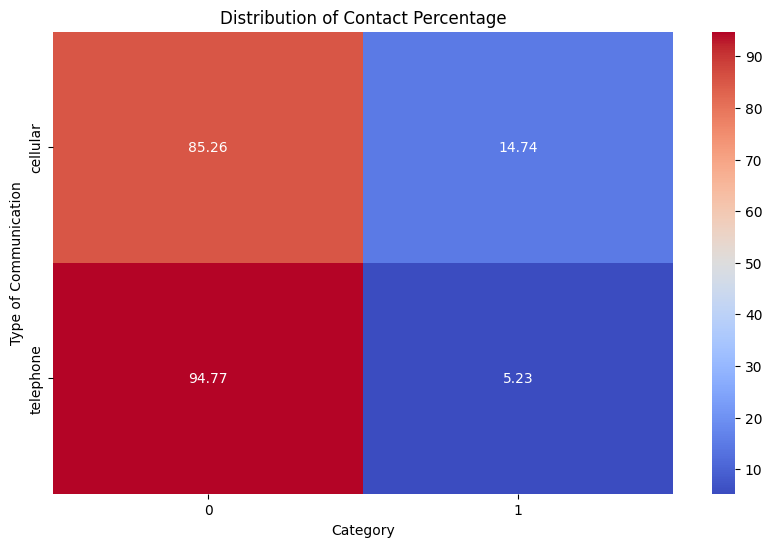

In [ ]:
# Create The Heatmap

plt.figure(figsize=(10, 6))

sns.heatmap(presentase_distribusi_contact, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Distribution of Contact Percentage")
plt.xlabel("Category")
plt.ylabel("Type of Communication")
plt.show()

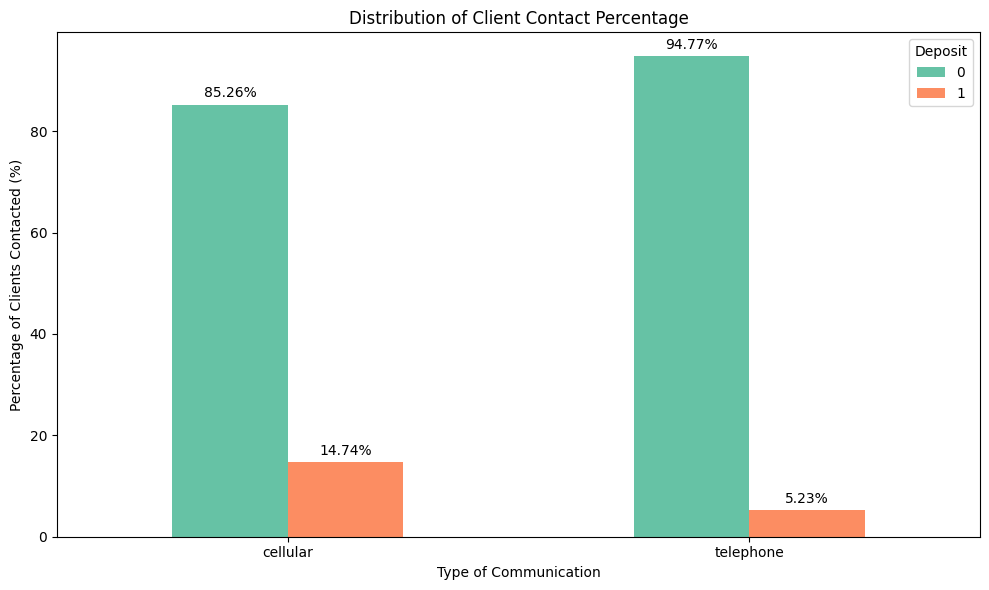

In [ ]:
# Create Bar Chart

palette = sns.color_palette("Set2", len(presentase_distribusi_contact))
ax = presentase_distribusi_contact.plot(kind='bar', figsize=(10, 6), color=palette)
plt.xlabel('Type of Communication')
plt.ylabel('Percentage of Clients Contacted (%)')
plt.title('Distribution of Client Contact Percentage')
plt.legend(title='Deposit')
plt.xticks(rotation=0)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%',
                (p.get_x() + p.get_width() / 2, height),
                ha='center',
                va='bottom',
                xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()

Berdasarkan analisa diatas didapat insight berupa :
- **Cellular** adalah metode yang lebih efektif daripada **telephone**. Walaupun sebagian besar klien yang dihubungi melalui ponsel masih tidak melakukan deposit, tingkat konversinya (14.74%) jauh lebih tinggi dibandingkan dengan telepon rumah (5.23%).
- **Telephone** (telepon rumah) memiliki tingkat konversi yang sangat rendah, dengan hampir 95% klien yang dihubungi melalui metode ini tidak melakukan deposit.
- Dapat disimpulkan bahwa menggunakan ponsel sebagai alat komunikasi jauh lebih efektif dibandingkan telepon rumah dalam mendorong klien untuk melakukan deposit.

Berikut beberapa alasan mengapa campaign menggunakan **cellular** lebih baik:
- **Mobilitas Tinggi**: Pengguna ponsel cenderung lebih responsif karena mereka dapat menerima panggilan kapan saja dan di mana saja.
- **Privasi yang Lebih Baik**: Panggilan ke ponsel dianggap lebih pribadi, sehingga pengguna mungkin lebih nyaman untuk mendengarkan dan merespons tanpa gangguan dari orang lain di sekitar mereka.
- **Fleksibilitas Waktu**: Panggilan ponsel memungkinkan interaksi pada waktu yang lebih fleksibel, tidak terbatas pada saat klien berada di rumah seperti halnya telepon rumah.
- **Akses ke Data**: Pengguna ponsel lebih mudah mengakses informasi atau tautan yang diberikan selama kampanye, yang dapat meningkatkan keterlibatan langsung.
- **Kepemilikan Lebih Personal**: Ponsel biasanya merupakan perangkat pribadi, sehingga pesan kampanye mungkin dirasakan lebih relevan dan langsung oleh pengguna.
- **Lebih Sedikit Penggunaan Telepon Rumah**: Banyak orang mulai meninggalkan telepon rumah, sehingga mengurangi efektivitas kampanye yang menggunakan metode ini.

- Perusahaan telah melakukan hal yang benar dengan lebih banyak menghubungi nasabah dengan cellular, karena berdaasarkan proporsi datanya, penerima tawaran dengan telepon rumah cenderung kecil (5.23%) maka sebaiknya kedepannya perusahaan dapat fokus menghubungi nasabah dengan cellular saja.

### Month

In [ ]:
month_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

In [ ]:
month = df['month'].value_counts().reindex(month_order)
month

month
jan        0
feb        0
mar      546
apr     2631
may    13767
jun     5318
jul     7169
aug     6176
sep      570
oct      717
nov     4100
dec      182
Name: count, dtype: int64

In [ ]:
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
distribusi_month = pd.crosstab(df['month'], df['y'])
distribusi_month

y          0    1
month            
mar      270  276
apr     2092  539
may    12881  886
jun     4759  559
jul     6521  648
aug     5521  655
sep      314  256
oct      402  315
nov     3684  416
dec       93   89

In [ ]:
presentase_distribusi_month = distribusi_month.div(distribusi_month.sum(axis=1), axis=0) * 100
presentase_distribusi_month

y              0          1
month                      
mar    49.450549  50.549451
apr    79.513493  20.486507
may    93.564320   6.435680
jun    89.488530  10.511470
jul    90.961082   9.038918
aug    89.394430  10.605570
sep    55.087719  44.912281
oct    56.066946  43.933054
nov    89.853659  10.146341
dec    51.098901  48.901099

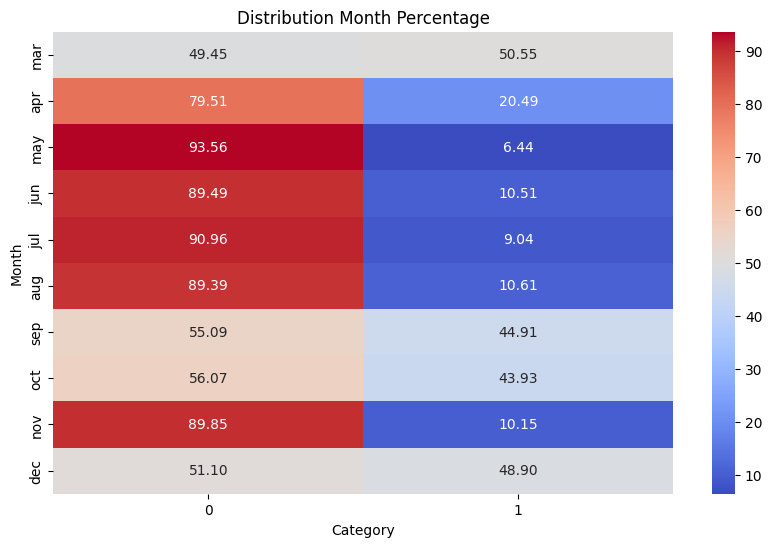

In [ ]:
# Create The Heatmap

plt.figure(figsize=(10, 6))

sns.heatmap(presentase_distribusi_month, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Distribution Month Percentage")
plt.xlabel("Category")
plt.ylabel("Month")
plt.show()

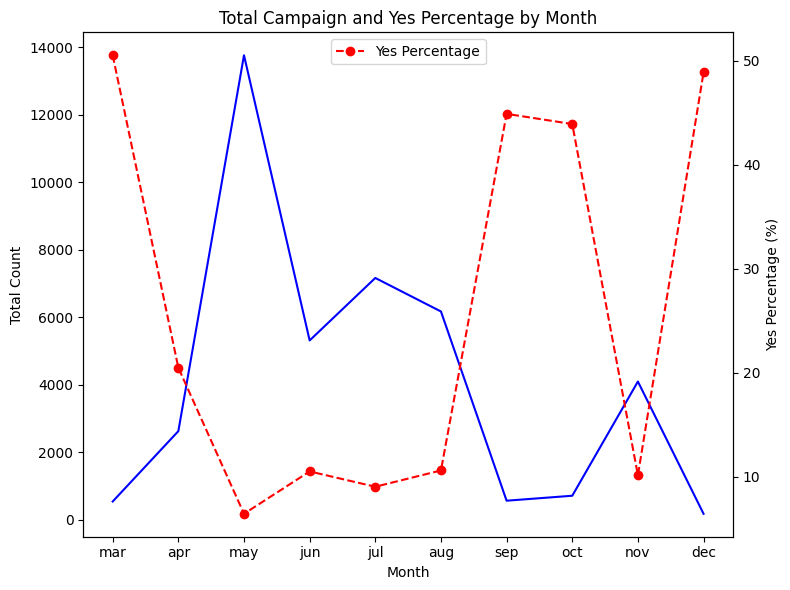

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(distribusi_month.index, distribusi_month[1] + distribusi_month[0], color='blue', label='Total')
ax1.set_xlabel("Month")
ax1.set_ylabel("Total Count", color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(presentase_distribusi_month.index, presentase_distribusi_month[1], color='red', marker='o', linestyle='--', label='Yes Percentage')
ax2.set_ylabel("Yes Percentage (%)")
ax2.tick_params(axis='y', labelcolor='black')

plt.title("Total Campaign and Yes Percentage by Month")
plt.legend(loc='upper center')

plt.tight_layout()
plt.show()

Berdasarkan grafik berikut dapat disimpulkan bahwa:
- Pada bulan Maret, jumlah kampanye tidak terlalu tinggi (546), tetapi tingkat keberhasilan (Yes Percentage) sangat tinggi (50%).
- Pada bulan Mei, meskipun jumlah kampanye sangat tinggi (13.767), tingkat keberhasilan sangat rendah (15%).
- Bulan-bulan seperti November dan Desember menunjukkan pola kebalikan, di mana jumlah kampanye meningkat pada Desember, dan tingkat keberhasilan kembali mencapai puncaknya di bulan ini.
- Secara keseluruhan, plot ini menggambarkan bahwa jumlah kampanye tidak selalu berbanding lurus dengan tingkat keberhasilan atau konversi, menunjukkan variasi signifikan antara dua variabel tersebut.

- Alasan mungkin untuk meningkatnya tingkat keberhasilan campaign pada bulan Maret dan Desember:
  - **Kondisi akhir tahun dan awal tahun**: individu cenderung mengambil keputusan finansial yang lebih besar setelah tahun baru (resolusi keuangan) atau akhir tahun (bonus dan insentif), yang dapat menyebabkan peningkatan partisipasi yang sukses.
- Alasan yang mungkin untuk menurunnya tingkat keberhasilan campaign pada bulan Mei dan September:
  - **Overload campaign**: Tingginya jumlah campaign pada bulan Mei mungkin menyebabkan peserta merasa kewalahan atau kurang fokus, sehingga menurunkan tingkat keberhasilan.
  - **Periode tidak aktif secara finansial**: Pada bulan Mei dan September, banyak individu mungkin sedang menghadapi komitmen lain, seperti liburan musim panas atau tahun ajaran baru, yang dapat mengurangi minat atau kapasitas mereka untuk berinvestasi atau terlibat dalam campaign.
- Campaign pada bulan Maret, September, Oktober dan Desember memiliki tingkat keberhasilan yang tinggi, namun dilihat dari distribusi datanya, jumlah nasabah yang dihubungi pada bulan-bulan tersebut cenderung rendah. Sementara itu, pada bulan Mei jumlah nasabah yang dihubungi cenderung tinggi namun tingkat keberhasilannya cenderung rendah. Oleh karena itu, tim bisnis disarankan untuk menghubungi nasabah dengan distribusi yang sama di setiap bulannya agar tingkat keberhasilannya dapat dibandingkan secara adil dan relevan.Tim bisnis dapat menggunakan strategi segmentasi dan targeting yang tepat untuk meningkatkan efektivitas campaign.

### Day of Week

In [ ]:
day_order = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

In [ ]:
df['day_of_week'].value_counts().reindex(day_order)

day_of_week
mon    8512
tue    8086
wed    8134
thu    8618
fri    7826
sat       0
sun       0
Name: count, dtype: int64

In [ ]:
distribusi_day = pd.crosstab(df['day_of_week'], df['y'])
distribusi_day

y               0     1
day_of_week            
mon          7665   847
tue          7133   953
wed          7185   949
thu          7574  1044
fri          6980   846

In [ ]:
presentase_distribusi_day = distribusi_day.div(distribusi_day.sum(axis=1), axis=0) * 100
presentase_distribusi_day

y                    0          1
day_of_week                      
mon          90.049342   9.950658
tue          88.214197  11.785803
wed          88.332924  11.667076
thu          87.885820  12.114180
fri          89.189880  10.810120

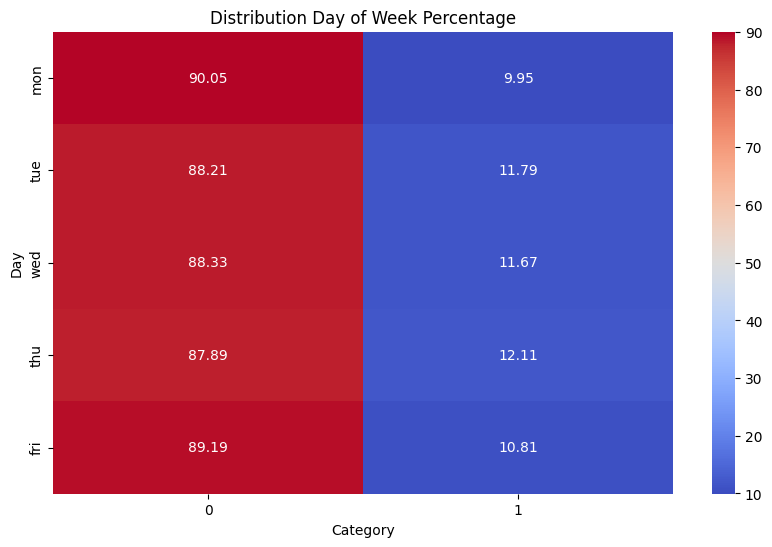

In [ ]:
# Create The Heatmap

plt.figure(figsize=(10, 6))

sns.heatmap(presentase_distribusi_day, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Distribution Day of Week Percentage")
plt.xlabel("Category")
plt.ylabel("Day")
plt.show()

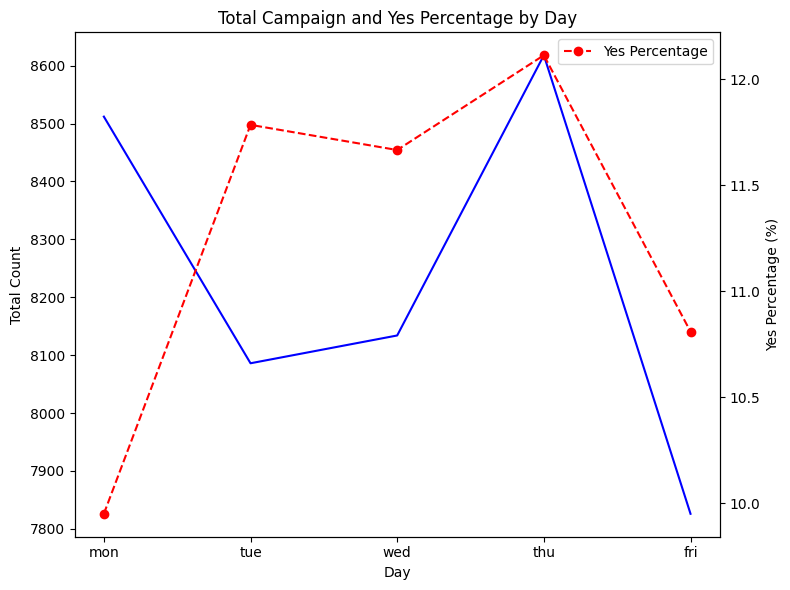

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(distribusi_day.index, distribusi_day[1] + distribusi_day[0], color='blue', label='Total')
ax1.set_xlabel("Day")
ax1.set_ylabel("Total Count", color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(presentase_distribusi_day.index, presentase_distribusi_day[1], color='red', marker='o', linestyle='--', label='Yes Percentage')
ax2.set_ylabel("Yes Percentage (%)")
ax2.tick_params(axis='y', labelcolor='black')

plt.title("Total Campaign and Yes Percentage by Day")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Berdasarkan grafik tersebut dapat disimpulkan bahwa :

- Pada hari **Senin** total campaign rendah, dan persentase keberhasilan juga relatif rendah. Ini mungkin disebabkan oleh produktivitas awal minggu yang lebih lambat atau orang-orang yang masih dalam mode transisi dari akhir pekan.

- Pada hari **Selasa** terjadi peningkatan yang signifikan pada total campaign dan presentase keberhasilan, hal ini mungkin disebabkan oleh peningkatan produktivitas setelah Senin.

- Pada hari **Rabu** menunjukkan sedikit penurunan presentase.

- Persentase keberhasilan tertinggi terjadi pada hari **Kamis** hal ini mungkin menunjukkan bahwa orang-orang lebih termotivasi atau lebih fokus menjelang akhir minggu.

- Pada hari **Jumat** terjadi penurunan yang signifikan pada total campaign dan presentase keberhasilan di hari Jumat mungkin disebabkan oleh banyak orang yang cenderung lebih santai menjelang akhir pekan, sehingga mengurangi efektivitas kampanye.

- Secara keseluruhan,  jumlah nasabah yang dihubungi sudah konsisten setiap harinya. Fluktuasi dalam keberhasilan campaign dan jumlah total dapat disebabkan oleh faktor-faktor eksternal seperti pola kerja, motivasi, dan prioritas selama seminggu.

- Berdasarkan analisis, tim bisnis disarankan untuk meningkatkan fokus dan strategi pemasaran pada hari Selasa dan Kamis, ketika tingkat keberhasilan tertinggi teramati, dengan memperkuat konten yang lebih menarik dan relevan untuk nasabah yang dihubungi.

### Duration

- Notes: atribut ini sangat memengaruhi output (misalnya, jika durasi = 0 maka y = "tidak"). Namun, durasi tidak dapat diketahui sebelum panggilan dilakukan.
- Target atau y dapat diketahui setelah panggilan berakhir. Jadi, fitur ini
Selain itu, setelah panggilan berakhir, target/y dapat jelas diketahui.
- Oleh karena itu, input ini hanya boleh dimasukkan untuk tujuan benchmarking dan harus diabaikan jika tujuannya adalah untuk membuat model prediksi yang realistis.

In [ ]:
duration_outlier = detect_outlier(df, 'duration')
print(f'kolom "duration" terdeteksi memiliki {len(duration_outlier)} outlier')

kolom "duration" terdeteksi memiliki 2963 outlier


In [ ]:
df['duration'].value_counts().sort_index().head()

duration
0     4
1     3
2     1
3     3
4    12
Name: count, dtype: int64

In [ ]:
df['duration'].value_counts().sort_index().tail()

duration
3631    1
3643    1
3785    1
4199    1
4918    1
Name: count, dtype: int64

In [ ]:
distribusi_duration = pd.crosstab(df['duration'], df['y'])
distribusi_duration

y          0  1
duration       
0          4  0
1          3  0
2          1  0
3          3  0
4         12  0
...       .. ..
3631       0  1
3643       0  1
3785       1  0
4199       0  1
4918       1  0

[1544 rows x 2 columns]

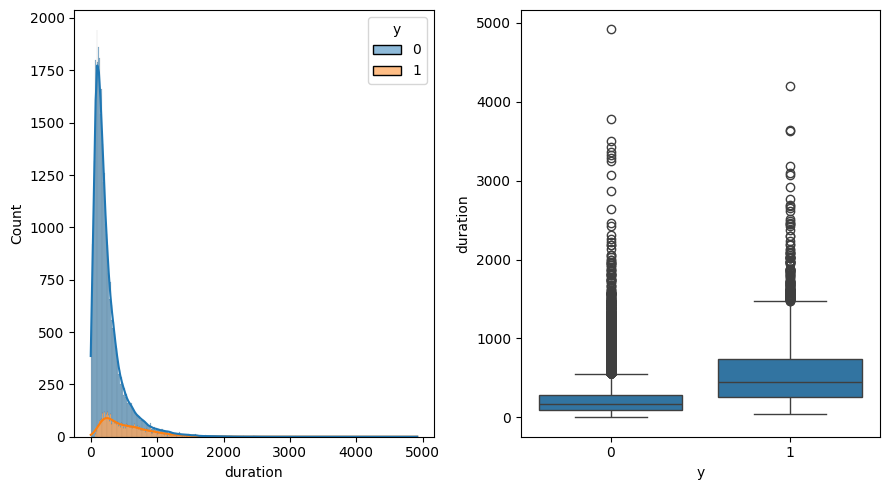

In [ ]:
# Create Histogram and Boxplot

fig, ax=plt.subplots(1,2,figsize=(9,5))
sns.histplot(data=df, x='duration', hue='y',ax=ax[0],multiple='stack',kde=True)

sns.boxplot(data=df, x='y', y='duration', ax=ax[1])
plt.tight_layout()

- Mayoritas panggilan yang tidak berhasil (y=0) memiliki durasi lebih pendek, dengan puncak yang sangat tinggi di durasi sekitar 0-500 detik. Distribusi ini mendominasi grafik.
- Panggilan yang berhasil (y=1) juga tampak cenderung lebih pendek, tetapi secara proporsi, jumlahnya jauh lebih sedikit dibandingkan dengan y=0.

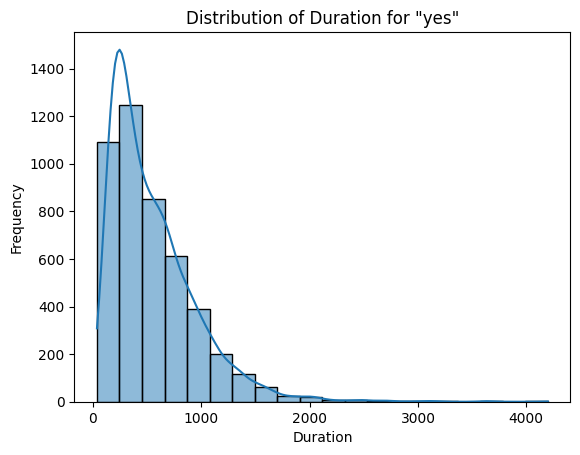

In [ ]:
# Create Histogram

yes_filtered = df[df['y'] == 1]

sns.histplot(yes_filtered['duration'], bins=20, kde=True, alpha=0.5)
plt.title('Distribution of Duration for "yes"')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

Berdasarkan histogram tersebut didapatkan beberapa informasi sebagai berikut:

- **Distribusi Positif Skew** : Distribusi cenderung skewed ke kanan, sebagian besar tingkat keberhasilan campaign berada di sebelah kiri (antara 0 - 1000 detik). Hal ini menunjukkan bahwa kebanyakan panggilan yang berhasil berlangsung dalam durasi yang lebih pendek, umumnya dibawah 1000 detik / kurang lebih 15 menit.

- **Nilai Peak** : Peak tertinggi berada di sekitar 300-600 detik, dimana durasi panggilan paling sering terjadi dan  berada dalam rentang tersebut.
Nilai Puncak (Peak):

- **Penurunan Frekuensi** : Seiring dengan meningkatnya durasi panggilan, frekuensi panggilan menurun secara drastis. Panggilan yang lebih lama dari 1000 detik menjadi semakin jarang. Ini mengindikasikan bahwa hanya sedikit panggilan yang berlangsung lebih lama dari 1000 detik, dan bahkan lebih sedikit lagi yang berlangsung di atas 2000 detik.

- **KDE (Kernel Density Estimation)**: Garis KDE (kurva biru) yang digambarkan di atas histogram menunjukkan perkiraan distribusi data yang lebih halus. Kurva ini mengikuti tren dari distribusi frekuensi, menunjukkan bahwa sebagian besar panggilan sukses terjadi dalam rentang waktu yang lebih pendek.

- Secara keseluruhan, sebagian besar panggilan yang menghasilkan jawaban "yes" terjadi dengan durasi yang lebih pendek (di bawah 1000 detik). Namun, ada beberapa panggilan yang berlangsung lebih lama hingga di atas 2000 detik, meskipun jumlahnya sangat sedikit. Ini menunjukkan bahwa durasi yang lebih pendek cenderung lebih sering berhubungan dengan hasil yang sukses.

- Oleh karena itu, tim bisnis disarankan untuk fokus pada strategi panggilan yang efisien dengan durasi di bawah 1000 detik, mengingat bahwa sebagian besar panggilan sukses terjadi dalam rentang waktu tersebut. Tim bisnis dapat meningkatkan efektivitas panggilan dalam waktu singkat dengan menyusun skrip yang lebih ringkas agar nasabah dapat lebih tertarik dalam melakukan panggilan.

- Sebelumnya dikatakan bahwa durasi memiliki hubungan yang erat dengan variabel target **y**, di mana semakin lama durasi, semakin tinggi kemungkinan untuk berlangganan.
- Namun, menyertakan variabel ini dalam **data train** tidak dianggap sebagai pendekatan yang baik karena tidak realistis untuk mengetahui durasi kontak/panggilan terakhir, mengingat model dibuat untuk memprediksi hasil bahkan sebelum panggilan terakhir dilakukan. Oleh karena itu, fitur ini tidak akan dimasukkan dalam **data train**.

### Campaign

- Beberapa klien dihubungi beberapa kali sebelum memutuskan untuk berlangganan deposito berjangka. Dalam dataset, jumlah total panggilan/kontak dicatat sebagai campaign (dilakukan pada kampanye saat ini).

- Karena distribusi campaign sangat beragam, nilai-nilai tersebut akan dikelompokkan.

In [ ]:
outlier_campaign = detect_outlier(df, 'campaign')
print(f'kolom "campaign" terdeteksi memiliki {len(outlier_campaign)} outlier')

kolom "campaign" terdeteksi memiliki 2406 outlier


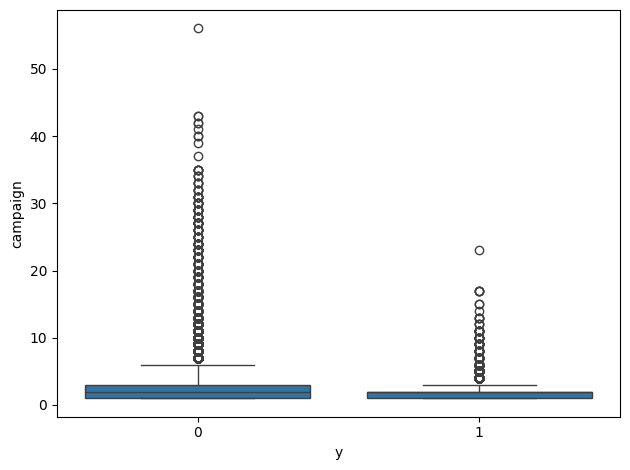

In [ ]:
# Create Boxplot

sns.boxplot(data=df, x='y', y='campaign')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot of Campaign')

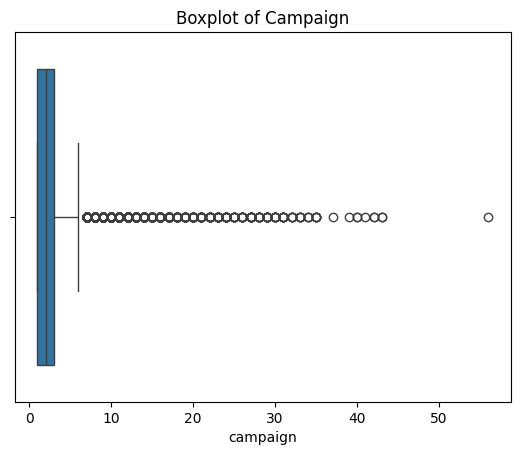

In [ ]:
sns.boxplot(x=df['campaign'])
plt.title('Boxplot of Campaign')

In [ ]:
campaign_percentage = df.groupby('campaign')['y'].mean() * 100

campaign_percentage_df = pd.DataFrame({'campaign': campaign_percentage.index, 'y_percentage': campaign_percentage.values})

campaign_percentage_df

campaign  y_percentage
0          1     13.037314
1          2     11.459122
2          3     10.749064
3          4      9.396226
4          5      7.504690
5          6      7.660878
6          7      6.041335
7          8      4.250000
8          9      6.007067
9         10      5.333333
10        11      6.779661
11        12      2.400000
12        13      4.347826
13        14      1.449275
14        15      3.921569
15        16      0.000000
16        17      6.896552
17        18      0.000000
18        19      0.000000
19        20      0.000000
20        21      0.000000
21        22      0.000000
22        23      6.250000
23        24      0.000000
24        25      0.000000
25        26      0.000000
26        27      0.000000
27        28      0.000000
28        29      0.000000
29        30      0.000000
30        31      0.000000
31        32      0.000000
32        33      0.000000
33        34      0.000000
34        35      0.000000
35        37      0.000000
36        39      0.000000
37        40      0.000000
38        41      0.000000
39        42      0.000000
40        43      0.000000
41        56      0.000000

In [ ]:
def cluster_campaign(x):
    if x >= 1 and x <= 3:
        return '1-3'
    elif x > 3 and x <= 6:
        return '4-6'
    elif x > 6 and x <= 9:
        return '7-9'
    elif x > 9 and x <= 12:
        return '10-12'
    elif x > 12 and x <= 15:
        return '13-15'
    else:
        return '>15'

In [ ]:
df['campaign_cluster'] = df['campaign'].apply(lambda x: cluster_campaign(x))

In [ ]:
order_cluster = ['1-3', '4-6', '7-9', '10-12', '13-15', '>15']
df['campaign_cluster'] = pd.Categorical(df['campaign_cluster'], categories=order_cluster, ordered=True)

In [ ]:
distribusi_campaign = pd.crosstab(df['campaign_cluster'], df['y'])
distribusi_campaign

y                     0     1
campaign_cluster             
1-3               29458  4084
4-6                4784   444
7-9                1240    72
10-12               500    27
13-15               205     7
>15                 350     5

In [ ]:
presentase_distribusi_campaign  = distribusi_campaign.div(distribusi_campaign.sum(axis=1), axis=0) * 100
presentase_distribusi_campaign

y                         0          1
campaign_cluster                      
1-3               87.824220  12.175780
4-6               91.507269   8.492731
7-9               94.512195   5.487805
10-12             94.876660   5.123340
13-15             96.698113   3.301887
>15               98.591549   1.408451

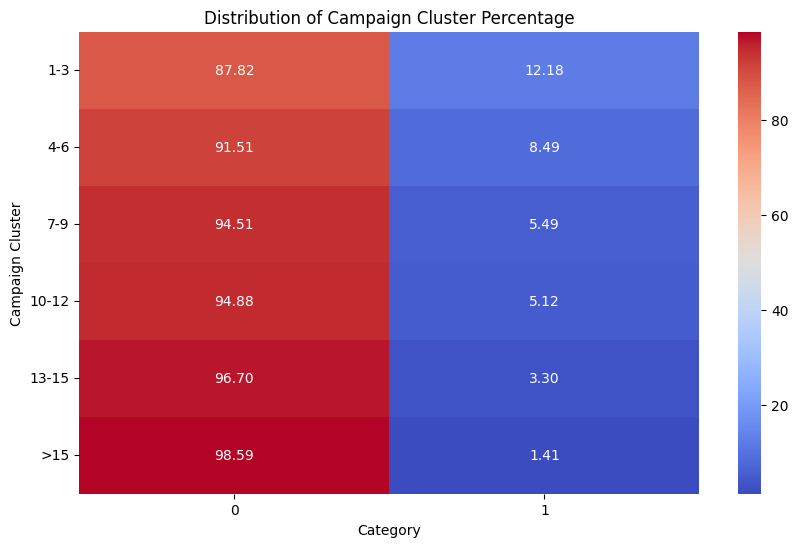

In [ ]:
plt.figure(figsize=(10, 6))

sns.heatmap(presentase_distribusi_campaign, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Distribution of Campaign Cluster Percentage")
plt.xlabel("Category")
plt.ylabel("Campaign Cluster")
plt.yticks(rotation=0)
plt.show()

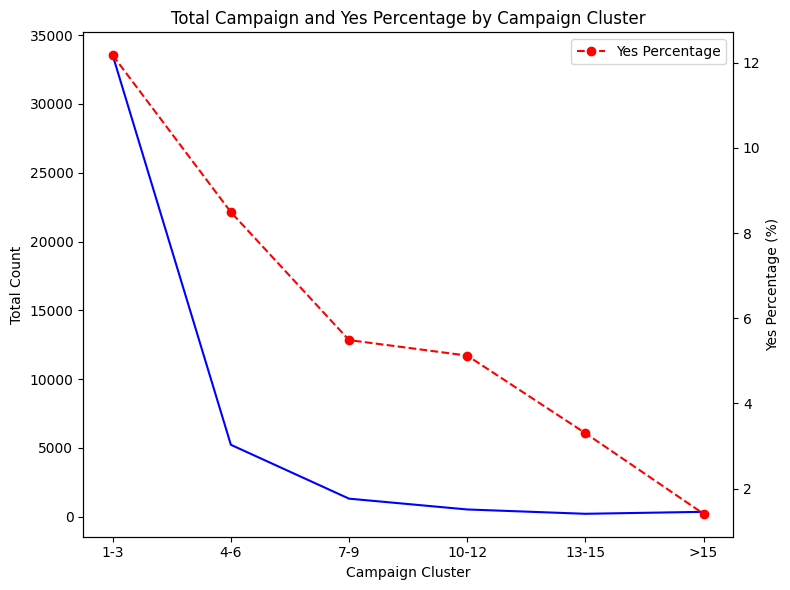

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(distribusi_campaign.index, distribusi_campaign[1] + distribusi_campaign[0], color='blue', label='Total')
ax1.set_xlabel("Campaign Cluster")
ax1.set_ylabel("Total Count", color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(presentase_distribusi_campaign.index, presentase_distribusi_campaign[1], color='red', marker='o', linestyle='--', label='Yes Percentage')
ax2.set_ylabel("Yes Percentage (%)")
ax2.tick_params(axis='y', labelcolor='black')

plt.title("Total Campaign and Yes Percentage by Campaign Cluster")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

- Campaign yang melibatkan kontak lebih sedikit(1-3 kali) cenderung lebih efektif dalam mencapai hasil yang positif / hasil yes percentage yang lebih tinggi (12.18%).
- Ketika frekuensi kontak meningkat (lebih dari 15 kali), baik jumlah klien yang dihubungi maupun persentase keberhasilan kampanye menurun drastis.
- Hal ini dapat dikatakan bahwa terlalu sering menghubungi klien selama kampanye dapat mengurangi efektivitasnya.
- Berdasarkan analisis, tim bisnis disarankan untuk membatasi jumlah panggilan yang dilakukan kepada klien menjadi 1-3 kali per campaign untuk memaksimalkan tingkat keberhasilan. Strategi ini dapat melibatkan penyampaian pesan yang lebih terfokus dan relevan pada setiap kontak, sehingga tidak terasa berlebihan bagi klien.

### Pdays

Jumlah hari yang berlalu setelah client terakhir dihubungi dari kampanye sebelumnya. 999 apabila client tidak pernah dihubungi sebelumnya.

In [ ]:
pdays_count = df['pdays'].value_counts().sort_index()
pdays_count

pdays
0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
12        58
13        36
14        20
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39661
Name: count, dtype: int64

In [ ]:
df['pdays_enc']=df['pdays'].apply(lambda x:'Contacted' if x<999 else 'Not_Contacted')

In [ ]:
df['pdays_enc'].value_counts()

pdays_enc
Not_Contacted    39661
Contacted         1515
Name: count, dtype: int64

In [ ]:
distribusi_pdays_enc = pd.crosstab(df['pdays_enc'], df['y'])
distribusi_pdays_enc

y                  0     1
pdays_enc                 
Contacted        548   967
Not_Contacted  35989  3672

In [ ]:
presentase_distribusi_pdays_enc  = distribusi_pdays_enc.div(distribusi_pdays_enc.sum(axis=1), axis=0) * 100
presentase_distribusi_pdays_enc

y                      0          1
pdays_enc                          
Contacted      36.171617  63.828383
Not_Contacted  90.741535   9.258465

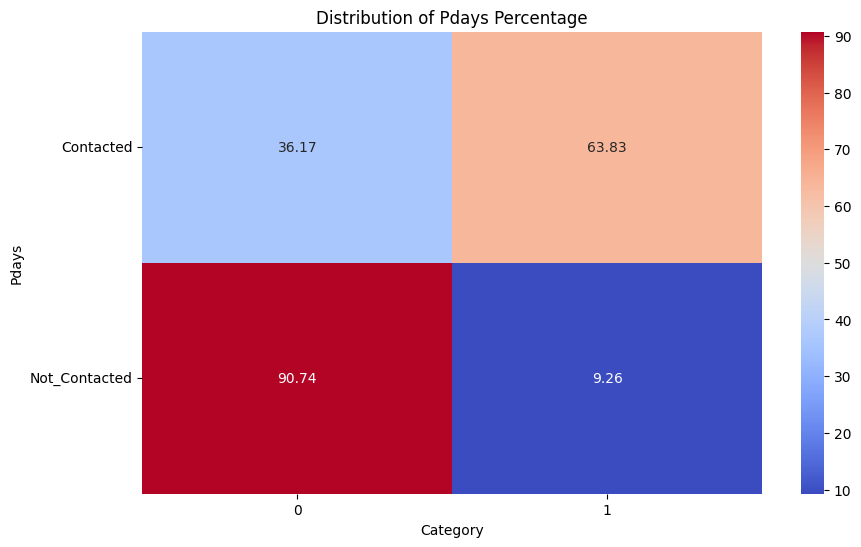

In [ ]:
plt.figure(figsize=(10, 6))

sns.heatmap(presentase_distribusi_pdays_enc, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Distribution of Pdays Percentage")
plt.xlabel("Category")
plt.ylabel("Pdays")
plt.yticks(rotation=0)
plt.show()

Berdasarkan plot diatas, dapat disimpulkan bahwa:
- **Contacted**: Dari klien yang dihubungi sebelumnya, 36.17% berada dalam kategori 0 (tidak menerima tawaran), dan 63.83% berada dalam kategori 1 (menerima tawaran). Hal ini menunjukkan bahwa klien yang pernah dihubungi sebelumnya cenderung lebih banyak menerima tawaran deposit dibandingkan yang menolak.
- **Not_Contacted**: Dari klien yang belum pernah dihubungi sebelumnya, 90.74% berada dalam kategori 0 (tidak menerima tawaran), dan hanya 9.26% yang berada dalam kategori 1 (menerima tawaran). Hal ini menunjukkan bahwa klien yang belum pernah dihubungi sebelumnya cenderung lebih banyak menolak tawaran deposit.
- Klien yang dihubungi dalam kampanye sebelumnya (Contacted) memiliki tingkat keberhasilan yang lebih tinggi dalam menerima tawaran deposit dibandingkan klien yang belum pernah dihubungi (Not_Contacted).
- Oleh karena itu, disarankan untuk memprioritaskan kampanye kepada klien yang telah dihubungi sebelumnya, mengingat tingkat penerimaan tawaran deposit yang jauh lebih tinggi pada kelompok ini. Strategi ini dapat diterapkan dengan melakukan follow-up yang lebih intensif kepada klien yang sudah pernah dihubungi, sambil tetap menyusun strategi komunikasi yang lebih menarik untuk klien baru atau yang belum dihubungi. Mengoptimalkan pesan pemasaran, menawarkan insentif atau keuntungan tambahan, dan menggunakan pendekatan yang lebih personal dapat meningkatkan peluang konversi pada klien yang belum pernah dihubungi sebelumnya.

### Previous

In [ ]:
distribusi_prev = pd.crosstab(df['previous'], df['y'])
distribusi_prev

y             0     1
previous             
0         32411  3140
1          3594   967
2           404   350
3            88   128
4            32    38
5             5    13
6             2     3
7             1     0

In [ ]:
presentase_distribusi_prev = distribusi_prev.div(distribusi_prev.sum(axis=1), axis=0) * 100
presentase_distribusi_prev

y                  0          1
previous                       
0          91.167618   8.832382
1          78.798509  21.201491
2          53.580902  46.419098
3          40.740741  59.259259
4          45.714286  54.285714
5          27.777778  72.222222
6          40.000000  60.000000
7         100.000000   0.000000

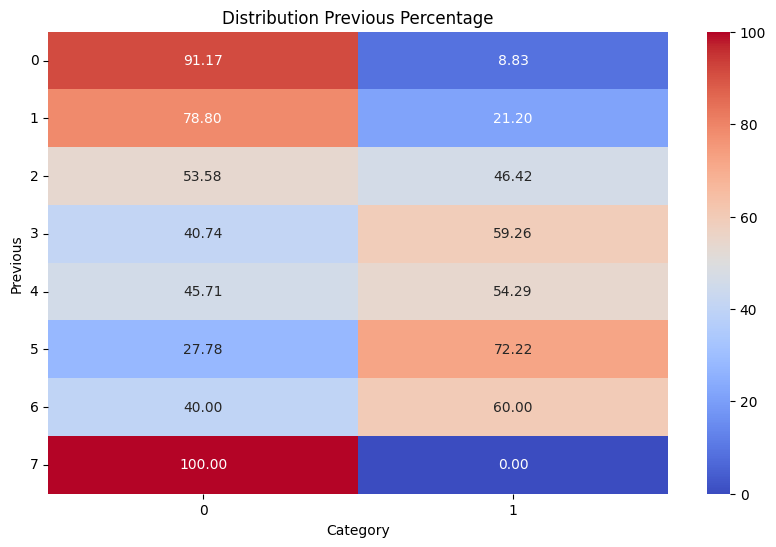

In [ ]:
plt.figure(figsize=(10, 6))

sns.heatmap(presentase_distribusi_prev, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Distribution Previous Percentage")
plt.xlabel("Category")
plt.ylabel("Previous")
plt.yticks(rotation=0)
plt.show()

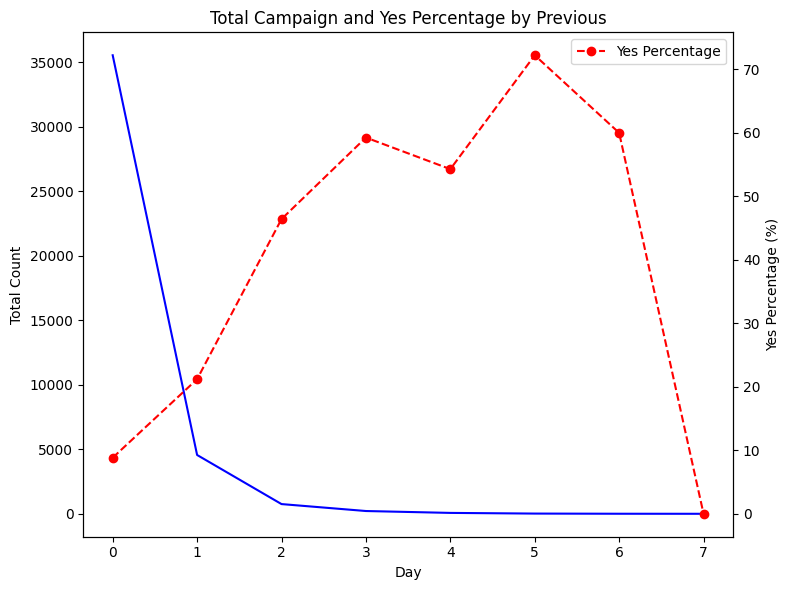

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(distribusi_prev.index, distribusi_prev[1] + distribusi_prev[0], color='blue', label='Total')
ax1.set_xlabel("Day")
ax1.set_ylabel("Total Count", color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(presentase_distribusi_prev.index, presentase_distribusi_prev[1], color='red', marker='o', linestyle='--', label='Yes Percentage')
ax2.set_ylabel("Yes Percentage (%)")
ax2.tick_params(axis='y', labelcolor='black')

plt.title("Total Campaign and Yes Percentage by Previous")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

- **Total Klien yang Dihubungi**:
  - Jumlah klien yang dihubungi sangat tinggi ketika Previous = 0, yang berarti mereka belum pernah dihubungi dalam kampanye sebelumnya.
  - Ketika jumlah panggilan sebelumnya meningkat dari 1 hingga 7, jumlah total klien yang dihubungi menurun drastis, hampir nol setelah 2 panggilan sebelumnya.
- **YesPercentage**:
  - Ketika Previous = 0 (tidak ada panggilan sebelumnya), persentase keberhasilan rendah.
  - Persentase keberhasilan meningkat secara signifikan ketika jumlah panggilan sebelumnya bertambah. Puncaknya terjadi pada Previous = 5, dengan tingkat keberhasilan lebih dari 70%.
  - Namun, setelah Previous = 6 dan 7, persentase keberhasilan kembali menurun drastis hingga mendekati 0% pada Previous = 7.
- Dapat disimpulkan bahwa melakukan beberapa panggilan sebelum campaign dapat meningkatkan peluang keberhasilan, tetapi terlalu banyak panggilan dapat memiliki efek sebaliknya. Oleh karena itu, campaign dapat difokuskan pada klien yang pernah dihubungi hingga 5 kali untuk memanfaatkan peningkatan peluang keberhasilan, sambil mengurangi frekuensi panggilan setelahnya agar tidak memberikan kesan terlalu mendesak atau membebani klien, yang dapat berujung pada penolakan.

### Poutcome

In [ ]:
df['poutcome'].value_counts()

poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64

In [ ]:
distribusi_poutcome = pd.crosstab(df['poutcome'], df['y'])
distribusi_poutcome

y                0     1
poutcome                
failure       3647   605
nonexistent  32411  3140
success        479   894

In [ ]:
presentase_distribusi_poutcome  = distribusi_poutcome.div(distribusi_poutcome.sum(axis=1), axis=0) * 100
presentase_distribusi_poutcome

y                    0          1
poutcome                         
failure      85.771402  14.228598
nonexistent  91.167618   8.832382
success      34.887109  65.112891

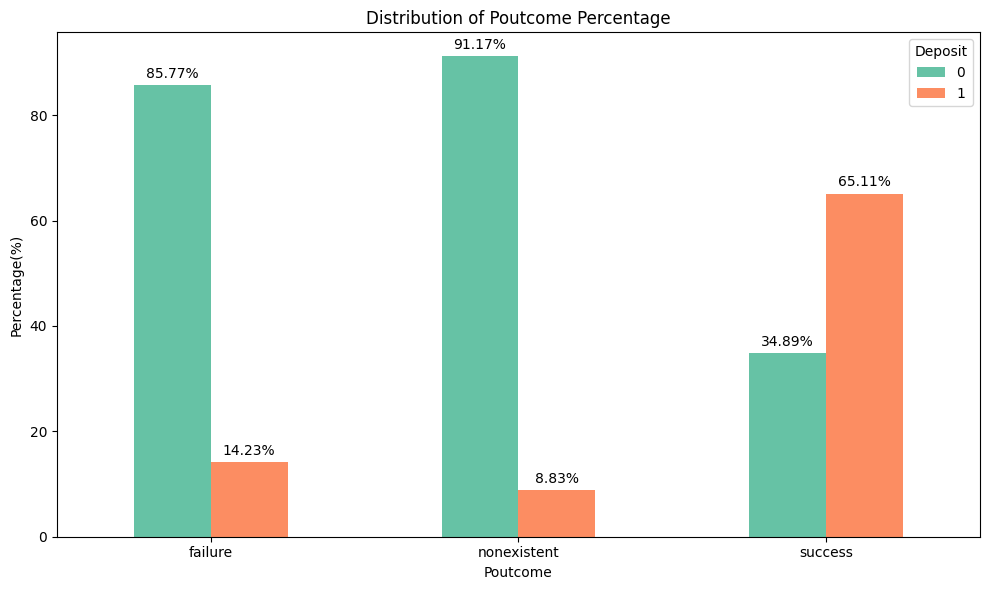

In [ ]:
palette = sns.color_palette("Set2", len(presentase_distribusi_poutcome))
ax = presentase_distribusi_poutcome.plot(kind='bar', figsize=(10, 6), color=palette)
plt.xlabel('Poutcome')
plt.ylabel('Percentage(%)')
plt.title('Distribution of Poutcome Percentage')
plt.legend(title='Deposit')
plt.xticks(rotation=0)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%',
                (p.get_x() + p.get_width() / 2, height),
                ha='center',
                va='bottom',
                xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()

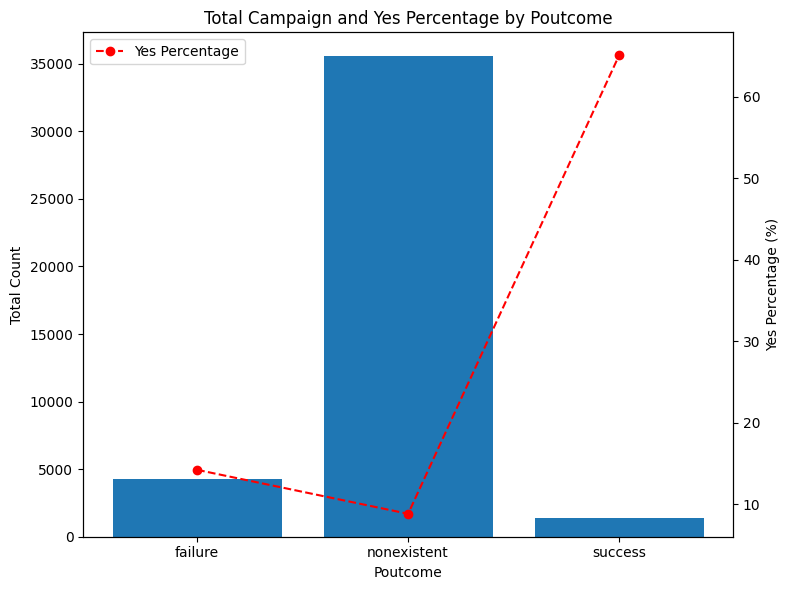

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(distribusi_poutcome.index, distribusi_poutcome[1] + distribusi_poutcome[0], label='Total')
ax1.set_xlabel("Poutcome")
ax1.set_ylabel("Total Count", color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(presentase_distribusi_poutcome.index, presentase_distribusi_poutcome[1], color='red', marker='o', linestyle='--', label='Yes Percentage')
ax2.set_ylabel("Yes Percentage (%)")
ax2.tick_params(axis='y', labelcolor='black')

plt.title("Total Campaign and Yes Percentage by Poutcome")
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Berdasarkan grafik tersebut, didapatkan beberapa insight berikut:
- **Failure**:
  - 14.23% klien yang melakukan deposit berasal dari campaign sebelumnya yang gagal.
  - Hal ini menunjukkan bahwa mayoritas dari klien yang dihubungi pada campaign sebelumnya dan gagal, tidak menerima tawaran deposit.
- **Nonexistent**:
  - 8.83% klien yang melakukan deposit tidak pernah dihubungi pada campaign sebelumnya.
  - Hal ini jelas terlihat bahwa sebagian besar klien yang tidak menerima tawaran berasal dari campaign sebelumnya yang tidak pernah berpartisipasi atau dihuubungi.
- **Success**:
  - 65.11% klien yang menerima tawaran deposit berasal dari campaign sebelumnya yang sukses.
  - Ini menunjukkan tren yang jelas bahwa klien yang sebelumnya berhasil menerima tawaran, lebih memungkinkan untuk melakukan deposit di masa berikutnya.
- Secara keseluruhan, hasil campaaign sebelumnya berpengaruh terhadap keputusan klien untuk melakukan deposit. Klien yang berhasil dalam campaign sebelumnya lebih cenderung melakukan deposit di masa depan, sementara mereka yang gagal atau tidak pernah dihubungi lebih kecil kemungkinannya untuk melakukan deposit.
- Oleh karena itu, disarankan agar tim bisnis lebih memfokuskan upaya pada klien yang sebelumnya sukses dalam campaign, karena mereka lebih mungkin untuk melakukan deposit kembali. Untuk klien yang gagal di campaign sebelumnya, perlu dilakukan pendekatan ulang dengan penawaran yang lebih menarik atau personalisasi agar peluang konversi meningkat. Selain itu, klien yang belum pernah dihubungi sebelumnya harus dimasukkan dalam campaign yang lebih proaktif dan menarik untuk meningkatkan keterlibatan mereka. Langkah ini diharapkan dapat meningkatkan efektivitas campaign secara keseluruhan dan mendorong lebih banyak yang menerima tawaran deposit di campaign selanjutnya.

<Axes: >

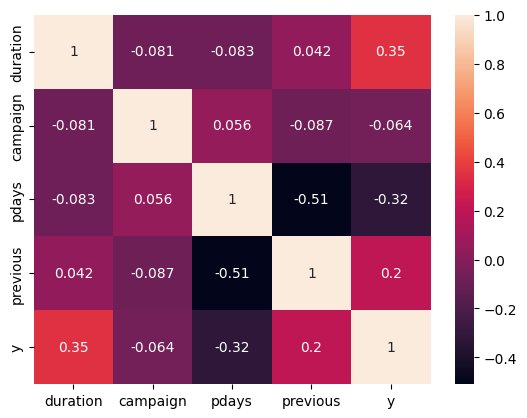

In [ ]:
sns.heatmap(df[['duration', 'campaign', 'pdays', 'previous', 'y']].corr('spearman'), annot=True)

- Korelasi dengan target:
  - Terdapat korelasi positif sedang (0.35) antara **duration** (durasi panggilan) dan **y** (target). Hal ini berarti semakin lama durasi panggilan, semakin besar kemungkinan klien menerima tawaran.
  - **Previous** memiliki korelasi positif rendah (0.2) dengan target. Artinya, semakin sering klien dihubungi dalam campaign sebelumnya, semakin besar kemungkinan klien melakukan deposit, meskipun pengaruhnya tidak terlalu besar.
  - **Pdays** memiliki korelasi negatif dengan variabel target (-0.32), menunjukkan bahwa semakin lama waktu sejak klien terakhir dihubungi dalam campaign sebelumnya, semakin kecil kemungkinan klien untuk menerima tawaran.
  - Jumlah total panggilan dalam **campaign** saat ini memiliki korelasi yang sangat rendah dan negatif (-0.064) dengan variabel target. Ini menunjukkan bahwa jumlah kontak selama kampanye tidak terlalu mempengaruhi keputusan klien untuk melakukan deposit.
- Korelasi antar fitur:
  - Terdapat korelasi negatif kuat (-0.51) antara **pdays** dan **previous**. Ini masuk akal karena semakin sering klien dihubungi sebelumnya, semakin pendek waktu sejak kontak terakhir.

### Uji Statistik Chi-Squared

In [ ]:
def chi_square_test_multi(features_dict, alpha=0.05):

    # Inisialisasi dataframe untuk menyimpan hasil uji chi-square
    results = []

    # Melakukan uji Chi-square untuk setiap fitur
    for table_name, feature_var in features_dict.items():
        chi2, p, dof, expected = stats.chi2_contingency(feature_var)

        # Interpretasi hasil uji berdasarkan p-value
        if p < alpha:
            result = "Terdapat hubungan signifikan"
        else:
            result = "Tidak terdapat hubungan signifikan"

        # Tambahkan hasil uji ke dalam list
        results.append({
            "Feature": table_name,
            "P-value": p,
            "Hasil": result
        })

    df = pd.DataFrame(results)

    return df

features_dict = {
    "Contact": distribusi_contact,
    "Month": distribusi_month,
    "Poutcome": distribusi_poutcome,
    "Day Of Week": distribusi_day,
    "Duration": distribusi_duration,
    "Campaign": distribusi_campaign,
    "Pdays": distribusi_pdays_enc,
    "Previous": distribusi_prev,
    "Poutcome": distribusi_poutcome,

}

df_result = chi_square_test_multi(features_dict)
df_result


Feature        P-value                         Hasil
0      Contact  1.718741e-189  Terdapat hubungan signifikan
1        Month   0.000000e+00  Terdapat hubungan signifikan
2     Poutcome   0.000000e+00  Terdapat hubungan signifikan
3  Day Of Week   3.085755e-05  Terdapat hubungan signifikan
4     Duration   0.000000e+00  Terdapat hubungan signifikan
5     Campaign   6.333514e-37  Terdapat hubungan signifikan
6        Pdays   0.000000e+00  Terdapat hubungan signifikan
7     Previous   0.000000e+00  Terdapat hubungan signifikan

- Semua fitur yang diuji memiliki hubungan signifikan dengan target.
- P-value yang sangat kecil (lebih rendah dari 0.05) menunjukkan bahwa fitur-fitur ini memengaruhi keputusan klien secara signifikan.
- Oleh karena itu, aspek-aspek seperti cara kontak, bulan kampanye, hari kontak, durasi panggilan, serta hasil kampanye sebelumnya, semuanya relevan dalam menentukan keberhasilan penawaran "Term Deposit".

## 4.3 Social and Economics


In [ ]:
month_order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

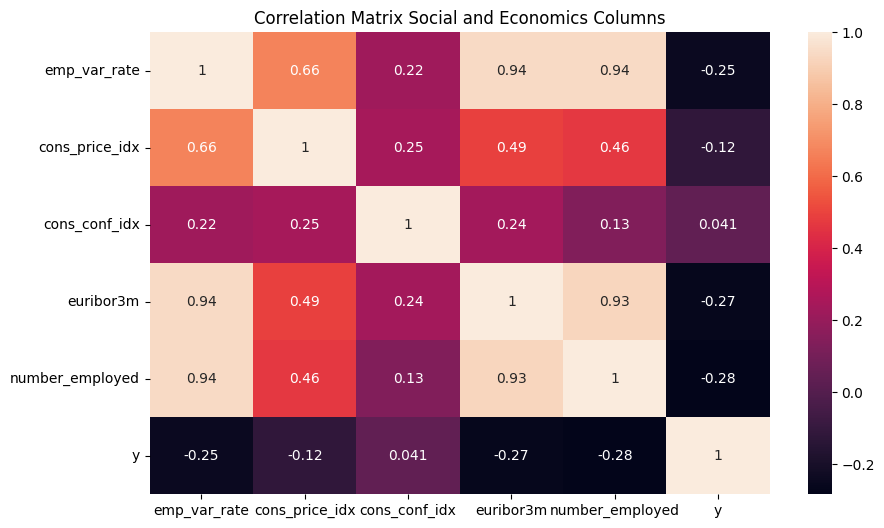

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'number_employed', 'y']].corr('spearman'), annot=True)

plt.title('Correlation Matrix Social and Economics Columns')
plt.show()

- Rate tenaga kerja mempunyai hubungan kuat yang searah dengan suku bunga dan jumlah tenaga kerja, artinya `pertumbuhan rate tenaga kerja mempengaruhi pertumbuhan suku bunga dan jumlah tenaga kerja` (relationship strength: 94%).
- Rate tenaga kerja mempunyai hubungan cukup kuat dengan index consumer price, artinya `indikasi pertumbuhan rate tenaga kerja mempengaruhi nilai index harga barang dan jasa yang juga ikut meningkat` pada dataset (relationship strength: 66%).
- `Sedangkan hubungan antara rate tenaga kerja dengan tingkat kepercayaan masyarakat bisa dikatakan lemah namun masih memiliki relasi`, artinya `masih memiliki indikasi bahwa semakin tinggi rate tenaga kerja juga meningkatkan nilai consumer confidence index` (relationship strength: 22%).
- Consumer price index mempunyai hubungan moderate searah terhadap suku bunga dan jumlah tenaga kerja, artinya `kenaikan pada nilai harga barang dan jasa kecenderungan mempengaruhi kenaikan suku bunga` (relationship strength: 49%).
- Consumer price index dengan consumer confidence index memiliki indikasi kenaikan cpi mempengaruhi kenaikan cci namun pengaruh ini bisa dikatakan lemah dengan relationship strength 25%.
- Relasi consumer confidence index terhadap pertumbuhan suku bunga lemah, artinya `meningkatnya suku bunga masih memiliki indikasi/pengaruh terhadap peningkatan consumer confidence index` (relationship strength: 24%).

Hubungan Kondisi Global dengan Hasil Campaign:
- Namun kondisi global pada hasil campaign berbanding terbalik dimana `ketika rate tenaga kerja, index harga barang-jasa, dan suku bunga berada pada range 'rendah', hasil campaign menunjukkan pertumbuhan positif (artinya banyak client yang menerima penawaran)` dibandingkan ketika rate tenaga kerja, cpi, dan suku bunga sedang dalam keadaan menunjukkan peningkatan positif, client kurang menunjukkan antusias (relationship strength: 25%).


### Consumer Confidence Index
**Short description:** CCI merupakan index indikator tingkat kepercayaan masyarakat terhadap kondisi ekonomi saat ini. Index ini berpengaruh terhadap bagaimana cara masyarakat memperlakukan uang mereka. Index positif menandakan kepercayaan masyarakat terhadap kondisi financial mereka saat ini dan kedepan, artinya masyarakat akan lebih 'mudah' untuk spending, sedangkan index negatif menandakan pessimistic outlook terhadap kondisi financial mereka saat ini dan kedepannya, artinya masyarakat akan lebih berhati-hati dan cenderung mengurangi spending rate.

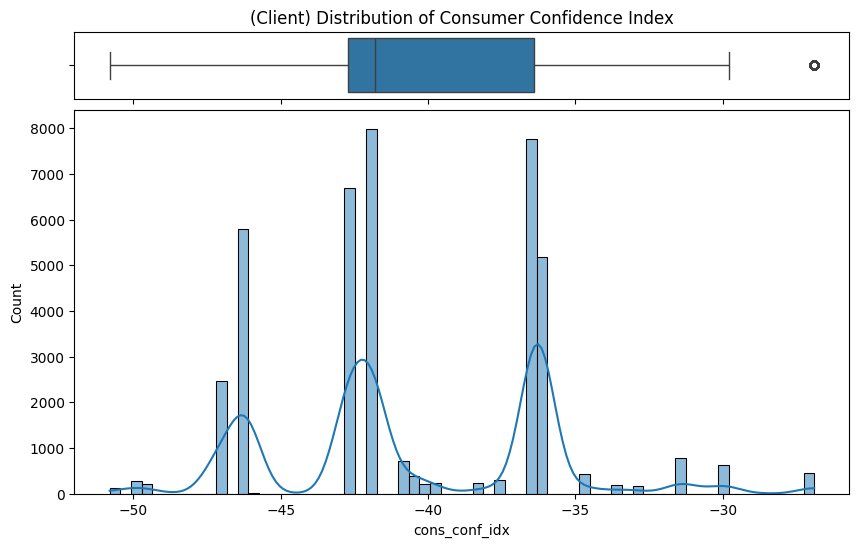

In [ ]:
# Create Histogram and Boxplot

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (10, 6),
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})
sns.boxplot(x = df['cons_conf_idx'], ax=ax1)
sns.histplot(data = df['cons_conf_idx'], ax=ax2, kde=True)
ax1.set_title('(Client) Distribution of Consumer Confidence Index')
plt.show()

In [ ]:
cci_percentage = df['cons_conf_idx'].value_counts(normalize=True) * 100
cci_percentage = cci_percentage.to_frame()
cci_percentage['cumsum'] = cci_percentage['proportion'].cumsum()
cci_percentage[cci_percentage['cumsum'] <= 80].index

Index([-36.4, -42.7, -46.2, -36.1, -41.8], dtype='float64', name='cons_conf_idx')

In [ ]:
# CCI hanya memiliki 1.08% outlier, asumsi outlier dihilangkan maka rata cci yang didapat
cci_outlier_df = detect_outlier(df, 'cons_conf_idx')

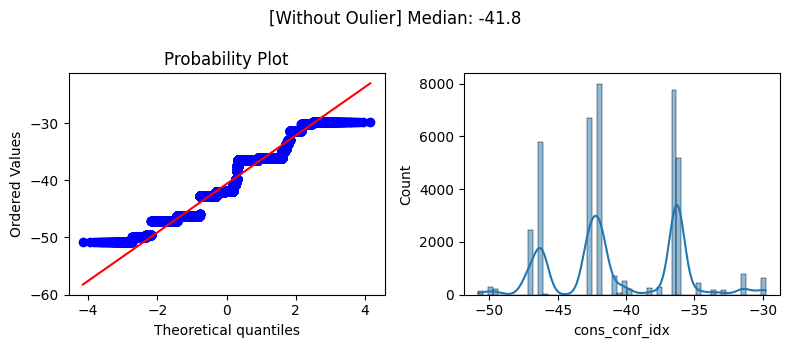

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(8,3.5))
stats.probplot(df[~df.index.isin(cci_outlier_df.index)]['cons_conf_idx'], dist='norm', plot=ax[0])
sns.histplot(ax=ax[1], x=df[~df.index.isin(cci_outlier_df.index)]['cons_conf_idx'], kde=True)
plt.suptitle(f"[Without Oulier] Median: {df[~df.index.isin(cci_outlier_df.index)]['cons_conf_idx'].median().__round__(2)}")
plt.tight_layout();

Penyebaran client terhadap consumer confidence index terbanyak berada pada range -36 hingga -42 dengan rata sebesar -41.8*.<br>
Jika asumsi lowest index berada pada -100 maka -41.8 menandakan `kepercayaan sebagian besar client terhadap kondisi perekonomian saat itu sedang buruk`.

*berdasarkan uji test normality

In [ ]:
result = stats.anderson(df[~df.index.isin(cci_outlier_df.index)]['cons_conf_idx'], dist='norm')
stat = result.statistic
idx = result.significance_level.tolist().index(5.0)
p = result.critical_values[idx]
print(f"{'data is normally distributed' if p > stat else 'data is not normally distributed'}")

data is not normally distributed


Consumer Confidence Growth over Months ?

In [ ]:
t = df.groupby(['month', 'y'])['cons_conf_idx'].unique().reset_index().dropna(axis=0)
t['cons_conf_idx_mean'] = t['cons_conf_idx'].apply(np.mean).__round__(2)
t['month'] = pd.Categorical(values=t['month'], categories=month_order, ordered=True)
t.sort_values(by='month', inplace=True)
t.reset_index(drop=True, inplace=True)
t

<ipython-input-274-7e09763dae62>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = df.groupby(['month', 'y'])['cons_conf_idx'].unique().reset_index().dropna(axis=0)


month  y          cons_conf_idx  cons_conf_idx_mean
0    mar  0         [-50.0, -34.8]              -42.40
1    mar  1         [-50.0, -34.8]              -42.40
2    apr  0         [-47.1, -34.6]              -40.85
3    apr  1         [-47.1, -34.6]              -40.85
4    may  0  [-36.4, -46.2, -40.0]              -40.87
5    may  1  [-36.4, -46.2, -40.0]              -40.87
6    jun  0  [-41.8, -40.8, -39.8]              -40.80
7    jun  1  [-41.8, -40.8, -39.8]              -40.80
8    jul  1  [-42.7, -33.6, -40.3]              -38.87
9    jul  0  [-42.7, -33.6, -40.3]              -38.87
10   aug  0  [-36.1, -31.4, -38.3]              -35.27
11   aug  1  [-36.1, -31.4, -38.3]              -35.27
12   sep  0         [-29.8, -37.5]              -33.65
13   sep  1         [-29.8, -37.5]              -33.65
14   oct  0  [-40.4, -26.9, -49.5]              -38.93
15   oct  1  [-40.4, -26.9, -49.5]              -38.93
16   nov  0  [-42.0, -30.1, -50.8]              -40.97
17   nov  1  [-42.0, -30.1, -50.8]              -40.97
18   dec  0         [-45.9, -33.0]              -39.45
19   dec  1         [-45.9, -33.0]              -39.45

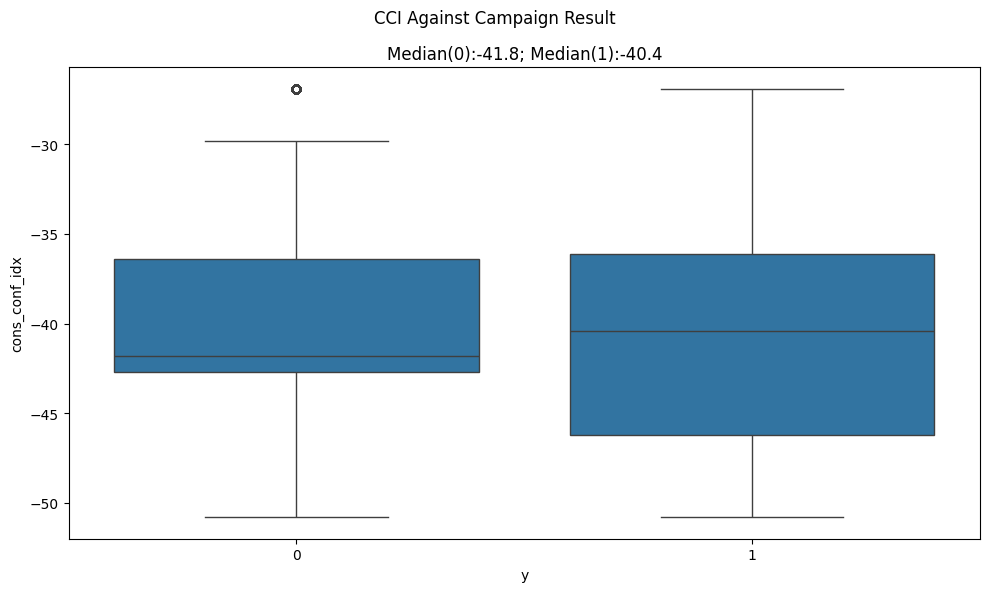

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['cons_conf_idx'], x=df['y'])
plt.title(f"Median(0):{df[df['y']==0]['cons_conf_idx'].median().__round__(2)}; Median(1):{df[df['y']==1]['cons_conf_idx'].median().__round__(2)}")
plt.suptitle('CCI Against Campaign Result')
plt.tight_layout();

In [ ]:
prop_cci = df[df['y']==0]['cons_conf_idx'].value_counts(normalize=True).reset_index()
prop_cci['proportion'] = prop_cci['proportion']*100
prop_cci['pct'] = prop_cci['proportion'].cumsum()
f"Penyebaran 80% Rata CPI pada client yang memutuskan untuk menolak pembukaan deposit: {prop_cci[prop_cci['pct'] < 80]['cons_conf_idx'].mean()}"

'Penyebaran 80% Rata CPI pada client yang memutuskan untuk menolak pembukaan deposit: -40.64'

In [ ]:
prop_cci_1 = df[df['y']==1]['cons_conf_idx'].value_counts(normalize=True).reset_index()
prop_cci_1['proportion'] = prop_cci_1['proportion']*100
prop_cci_1['pct'] = prop_cci_1['proportion'].cumsum()
f"Penyebaran 80% Rata CPI pada client yang memutuskan untuk membuka deposit: {prop_cci_1[prop_cci_1['pct'] < 80]['cons_conf_idx'].mean()}"

'Penyebaran 80% Rata CPI pada client yang memutuskan untuk membuka deposit: -38.15'

Hasil perbandingan nilai rata index tiap bulan (table) terhadap target campaign tidak memiliki perbedaan, artinya situasi ekonomi antara client yang menerima penawaran dengan client yang tidak menerima penawaran dalam keadaan sama.<br>
Namun **pada penyebaran datanya, diketahui bahwa distribusi index kepercayaan client yang menerima campaign saat itu sebagian besar berada pada range sedikit lebih tinggi daripada index kepercayaan client yang tidak menerima campaign.**

<ipython-input-279-354ae1773080>:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout();


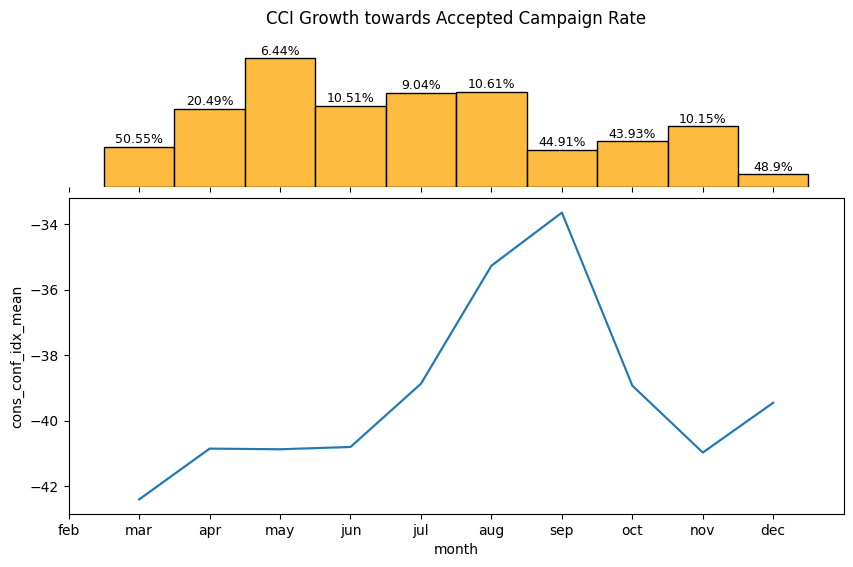

In [ ]:
df_cci = df.copy()
df_cci['month'] = pd.Categorical(values=df_cci['month'], categories=month_order, ordered=True)
# plt.figure(figsize=(6,3))
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (10, 6),
                                gridspec_kw={"height_ratios": (.3, .7),
                                            "hspace": 0.05})
sns.histplot(data=df_cci[df_cci['y']==1], x = 'month', ax=ax1, color='orange')
sns.lineplot(x = t['month'], y=t['cons_conf_idx_mean'], ax=ax2)

for i, p in enumerate(ax1.patches):
    len_month = len(df_cci[df_cci['month'] == month_order[i+2]])
    ax1.annotate(f'{round(p.get_height()*100/len_month,2)}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

ax1.set_yticks([])
ax1.set_ylabel(None)
ax1.set_title("CCI Growth towards Accepted Campaign Rate", pad=20)
plt.setp(ax1.spines.values(), visible=False)
plt.tight_layout();

Pada Maret hingga September, terjadi peningkatan index, artinya selama 6 bulan tersebut sempat terjadi pem-baikan terhadap kondisi ekonomi, namun setelah bulan tersebut terjadi penurunan drastis.

### Consumer Price Index
**Short description:** CPI merupakan index indikator perubahan harga barang dan jasa. Indeks ini digunakan untuk mengukur inflasi dan deflasi suatu negara. Semakin tinggi nilai index dari base market, memungkinkan adanya potensi inflasi dan semakin rendah nilai index dari base market, maka berpotensi deflasi. Sama halnya dengan CCI, hal tersebut dapat berdampak pada bagaimana cara masyarakat memperlakukan uang mereka.<br>

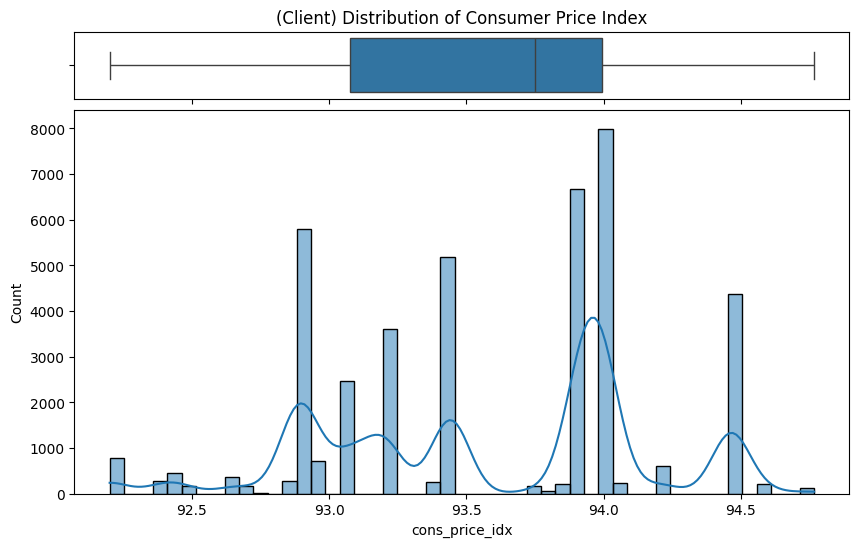

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (10, 6),
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})
sns.boxplot(x = df['cons_price_idx'], ax=ax1)
sns.histplot(data = df['cons_price_idx'], ax=ax2, kde=True)
ax1.set_title('(Client) Distribution of Consumer Price Index')
plt.show()

In [ ]:
cpi_percentage = df['cons_price_idx'].value_counts(normalize=True) * 100
cpi_percentage = cpi_percentage.to_frame()
cpi_percentage['cumsum'] = cpi_percentage['proportion'].cumsum()
cpi_percentage[cpi_percentage['cumsum'] <= 80].index

Index([93.994, 93.918, 92.893, 93.444, 94.465], dtype='float64', name='cons_price_idx')

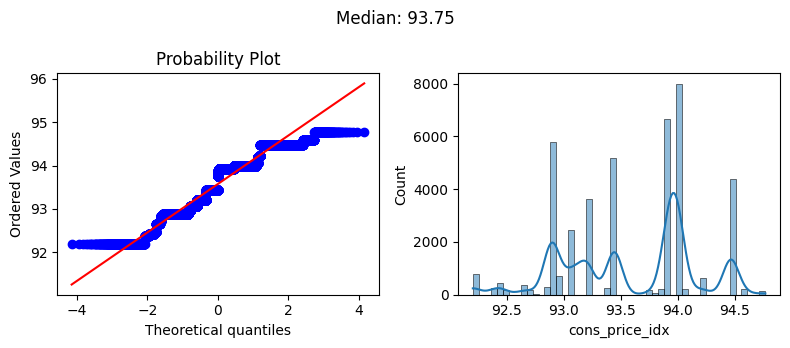

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(8,3.5))

stats.probplot(df['cons_price_idx'], dist='norm', plot=ax[0])
sns.histplot(ax=ax[1], x=df['cons_price_idx'], kde=True)
plt.suptitle(f"Median: {df['cons_price_idx'].median().__round__(2)}")
plt.tight_layout();

In [ ]:
result = stats.anderson(df['cons_price_idx'], dist='norm')
stat = result.statistic
idx = result.significance_level.tolist().index(5.0)
p = result.critical_values[idx]
print(f"{'data is normally distributed' if p > stat else 'data is not normally distributed'}")

data is not normally distributed


*Kondisi CPI bagi sebagian besar client yang mendapatkan penawaran campaign dari bank saat itu sedang berada pada rentang index 93 - 94.5*.

In [ ]:
df_market_changes = df[['month', 'cons_price_idx']]

df_cons_price_index = df_market_changes.groupby(['month'])['cons_price_idx'].unique().reset_index()
df_cons_price_index['cons_price_idx_mean'] = df_cons_price_index['cons_price_idx'].apply(np.mean).__round__(2)
df_cons_price_index['month'] = pd.Categorical(values=df_cons_price_index['month'], categories=month_order, ordered=True)

df_cons_price_index['change_pct'] = df_cons_price_index.sort_values(by='month')['cons_price_idx_mean'].pct_change().fillna(0)
df_cons_price_index['change_pct'] = df_cons_price_index['change_pct']*100

<ipython-input-284-1813039fc14c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cons_price_index = df_market_changes.groupby(['month'])['cons_price_idx'].unique().reset_index()
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
df_cons_price_index.sort_values(by='month', inplace=True)
df_cons_price_index.reset_index(drop=True, inplace=True)
df_cons_price_index

month            cons_price_idx  cons_price_idx_mean  change_pct
0    jan                        []                  NaN    0.000000
1    feb                        []                  NaN    0.000000
2    mar          [92.843, 93.369]                93.11    0.000000
3    apr          [93.075, 93.749]                93.41    0.322200
4    may  [93.994, 92.893, 93.876]                93.59    0.192699
5    jun  [94.465, 92.963, 94.055]                93.83    0.256438
6    jul  [93.918, 92.469, 94.215]                93.53   -0.319727
7    aug  [93.444, 92.201, 94.027]                93.22   -0.331444
8    sep          [92.379, 94.199]                93.29    0.075091
9    oct  [93.798, 92.431, 94.601]                93.61    0.343016
10   nov    [93.2, 92.649, 94.767]                93.54   -0.074778
11   dec          [92.756, 92.713]                92.73   -0.865940

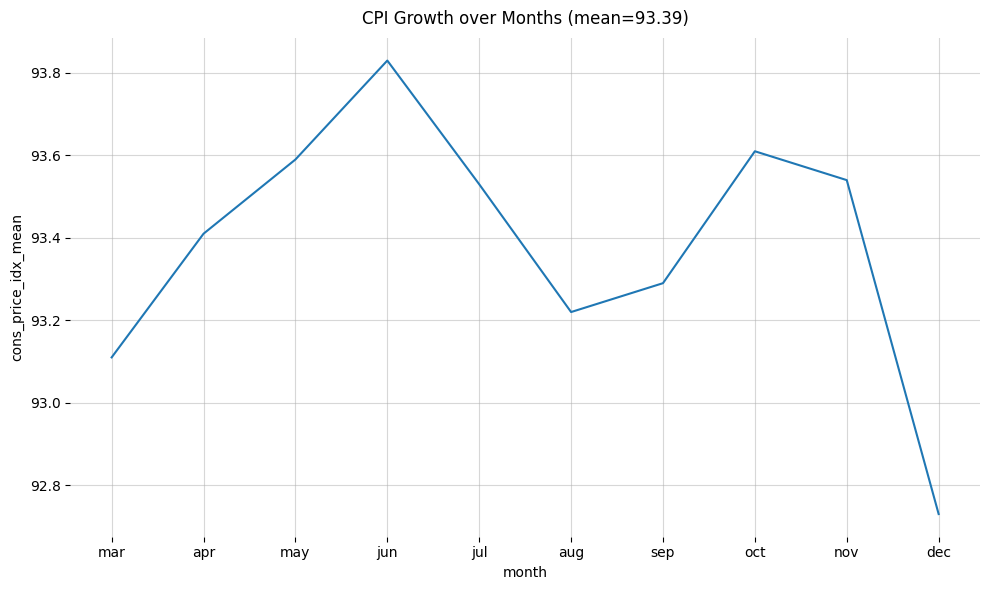

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(df_cons_price_index, x='month', y='cons_price_idx_mean')
plt.title(f"CPI Growth over Months (mean={df_cons_price_index['cons_price_idx_mean'].mean().__round__(2)})", pad=10)
plt.grid(alpha=0.5)
plt.setp(ax.spines.values(), visible=False)
plt.tight_layout();

Graphic pertumbuhan index cenderung menurun dengan penurunan terendah 92.73 dibulan December, termasuk juga sebagai bulan dengan rate penurunan paling significant dengan selisih 0.87% dari index bulan sebelumnya. Artinya kondisi harga barang dan jasa pada saat itu sedang menuju ranah penurunan.

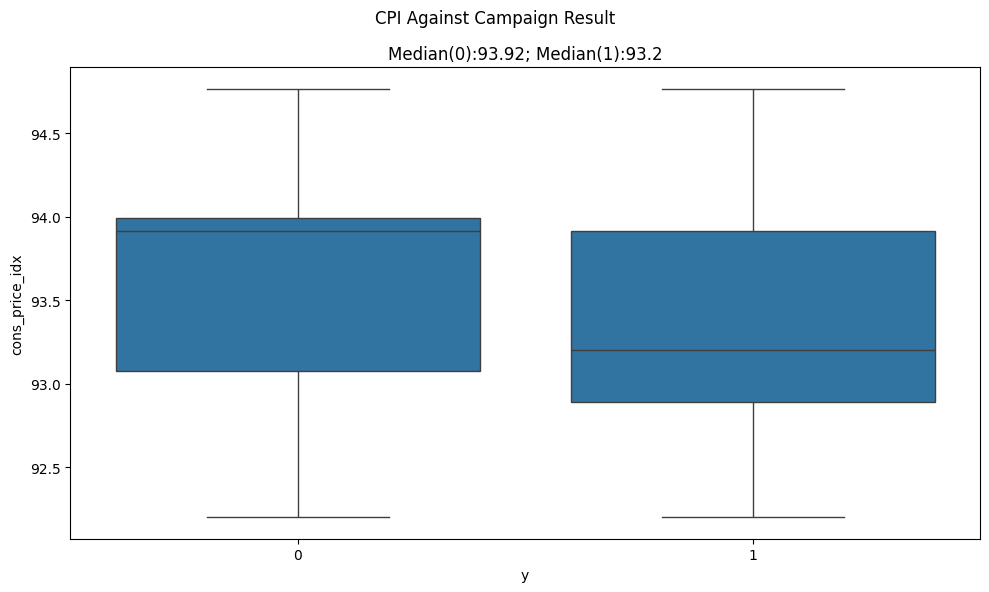

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['cons_price_idx'], x=df['y'])
plt.title(f"Median(0):{df[df['y']==0]['cons_price_idx'].median().__round__(2)}; Median(1):{df[df['y']==1]['cons_price_idx'].median().__round__(2)}")
plt.suptitle('CPI Against Campaign Result')
plt.tight_layout();

Pada penyebaran data*, diketahui bahwa `penyebaran CPI pada client yang menerima campaign berada pada rentang lebih rendah dibandingkan rata CPI client yang tidak menerima campaign`<br>

*didukung dengan uji test

In [ ]:
stat, p = stats.mannwhitneyu(df[df['y'] == 0]['cons_price_idx'].values, df[df['y'] == 1]['cons_price_idx'].values, alternative='two-sided')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Penyebaran data pada client yang menerima penawaran campaign sama dengan penyebaran pada client yang menolak')
else:
    print('Penyebaran data pada client yang menerima penawaran campaign tidak sama dengan penyebaran pada client yang menolak')

stat=103476892.500, p=0.000
Penyebaran data pada client yang menerima penawaran campaign tidak sama dengan penyebaran pada client yang menolak


### Employment Variation Rate (EVR)
EVR merupakan indikator mengukur pertumbuhan dan penurunan tenaga kerja. Positif rate mengindikasikan banyaknya lapangan pekerja yang terbuka dan pekerja yang dihire, artinya kondisi ekonomi saat itu sedang baik, sedangkan negatif rate mengindikasikan banyaknya pekerja yang difire/lay-off, kondisi ekonomi menurun.<br>

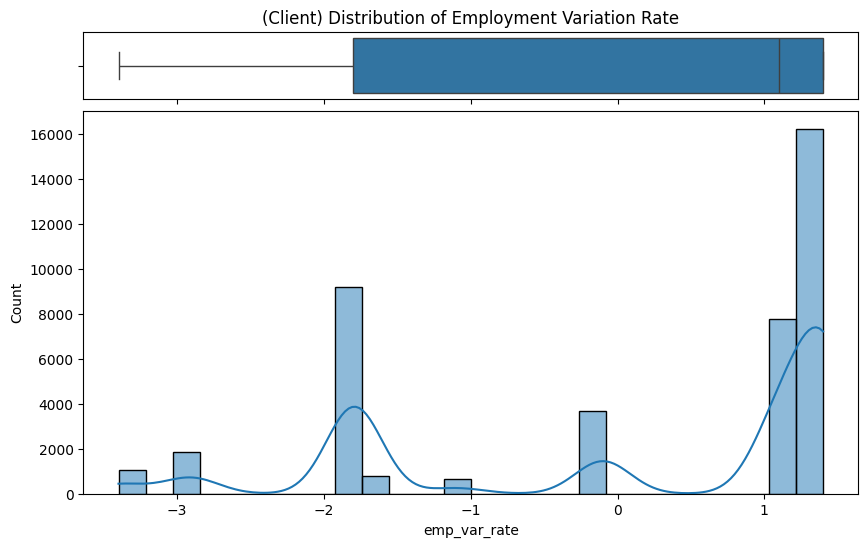

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (10, 6),
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})
sns.boxplot(x = df['emp_var_rate'], ax=ax1)
sns.histplot(data = df['emp_var_rate'], ax=ax2, kde=True)
ax1.set_title(f"(Client) Distribution of Employment Variation Rate")
plt.show()

In [ ]:
emp_percentage = df['emp_var_rate'].value_counts(normalize=True) * 100
emp_percentage = emp_percentage.to_frame()
emp_percentage['cumsum'] = emp_percentage['proportion'].cumsum()
emp_percentage[emp_percentage['cumsum'] <= 80].index

Index([1.4, -1.8], dtype='float64', name='emp_var_rate')

In [ ]:
df_emp_var_rate = df[['month', 'emp_var_rate', 'y']].drop_duplicates()
df_emp_var_rate['month'] = pd.Categorical(values=df_emp_var_rate['month'], categories=month_order, ordered=True)
df_emp_var_rate = df_emp_var_rate.groupby(['month', 'y'])['emp_var_rate'].unique().sort_index().dropna(axis=0).reset_index()

df_emp_var_rate['emp_var_rate_mean'] = df_emp_var_rate['emp_var_rate'].apply(np.mean)
df_emp_var_rate

<ipython-input-292-7d4cded81532>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_emp_var_rate = df_emp_var_rate.groupby(['month', 'y'])['emp_var_rate'].unique().sort_index().dropna(axis=0).reset_index()


month  y        emp_var_rate  emp_var_rate_mean
0    mar  0              [-1.8]          -1.800000
1    mar  1              [-1.8]          -1.800000
2    apr  0              [-1.8]          -1.800000
3    apr  1              [-1.8]          -1.800000
4    may  0         [1.1, -1.8]          -0.350000
5    may  1         [1.1, -1.8]          -0.350000
6    jun  0   [1.4, -2.9, -1.7]          -1.066667
7    jun  1   [1.4, -2.9, -1.7]          -1.066667
8    jul  0   [1.4, -2.9, -1.7]          -1.066667
9    jul  1   [1.4, -2.9, -1.7]          -1.066667
10   aug  0   [1.4, -2.9, -1.7]          -1.066667
11   aug  1   [1.4, -2.9, -1.7]          -1.066667
12   sep  0        [-3.4, -1.1]          -2.250000
13   sep  1        [-3.4, -1.1]          -2.250000
14   oct  0  [-0.1, -3.4, -1.1]          -1.533333
15   oct  1  [-0.1, -3.4, -1.1]          -1.533333
16   nov  0  [-0.1, -3.4, -1.1]          -1.533333
17   nov  1  [-0.1, -3.4, -1.1]          -1.533333
18   dec  0        [-0.2, -3.0]          -1.600000
19   dec  1        [-0.2, -3.0]          -1.600000

Employment rate antara client yang menerima campaign dengan client yang tidak menerima dalam kondisi rate employment yang sama.

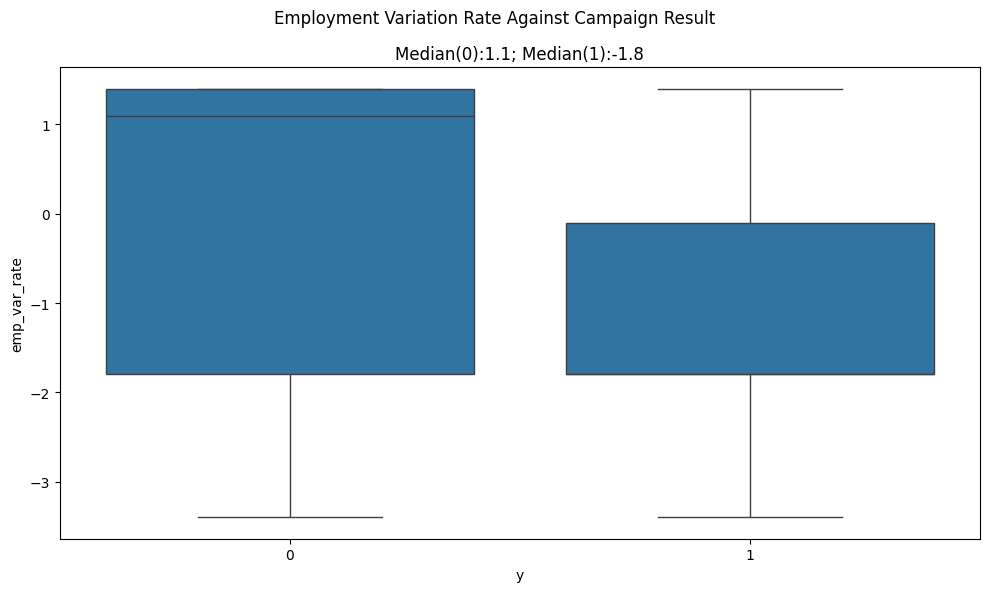

In [ ]:
# Create Boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['emp_var_rate'], x=df['y'])
plt.suptitle('Employment Variation Rate Against Campaign Result')
plt.title(f"Median(0):{df[df['y']==0]['emp_var_rate'].median().__round__(2)}; Median(1):{df[df['y']==1]['emp_var_rate'].median().__round__(2)}")
plt.tight_layout();

Namun informasi employment rate terhadap client yang menerima offering dengan client yang tidak menerima berada pada rentang distribusi berbeda. **Client yang menolak offering, penyebaran employment rate terpusat pada rentang 1.4 > x > -2 (positif) lebih besar daripada client yang menerima terpusat pada rentang 0 > x > -2. (negatif)**

In [ ]:
df_emp_var_rate = df_emp_var_rate[['month', 'emp_var_rate', 'emp_var_rate_mean']].drop_duplicates(subset='month').reset_index(drop=True)

In [ ]:
df_emp_var_rate

month        emp_var_rate  emp_var_rate_mean
0   mar              [-1.8]          -1.800000
1   apr              [-1.8]          -1.800000
2   may         [1.1, -1.8]          -0.350000
3   jun   [1.4, -2.9, -1.7]          -1.066667
4   jul   [1.4, -2.9, -1.7]          -1.066667
5   aug   [1.4, -2.9, -1.7]          -1.066667
6   sep        [-3.4, -1.1]          -2.250000
7   oct  [-0.1, -3.4, -1.1]          -1.533333
8   nov  [-0.1, -3.4, -1.1]          -1.533333
9   dec        [-0.2, -3.0]          -1.600000

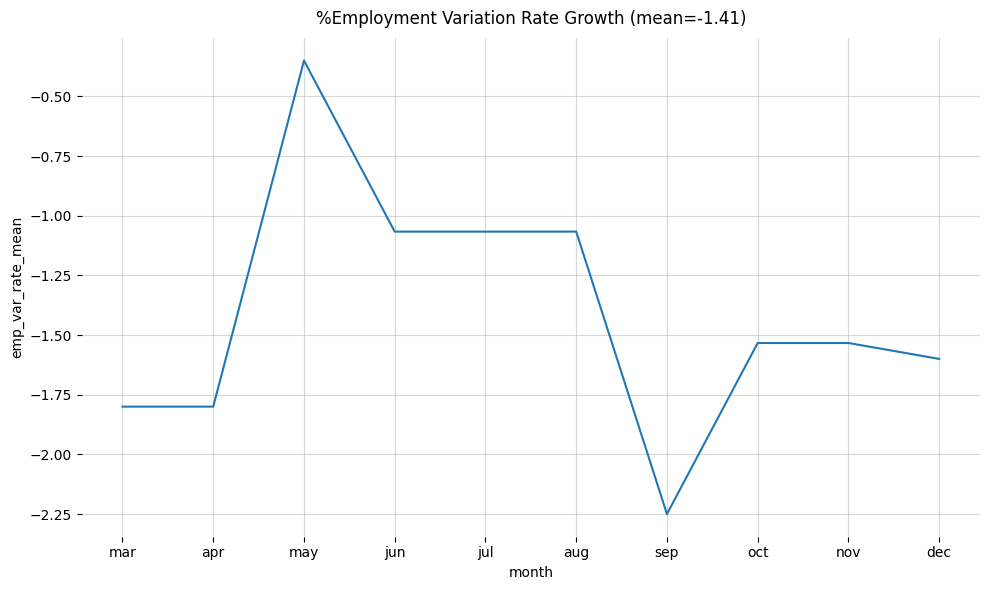

In [ ]:
# Create Line Chart

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_emp_var_rate, x='month', y='emp_var_rate_mean')
plt.title(f"%Employment Variation Rate Growth (mean={df_emp_var_rate['emp_var_rate_mean'].mean().__round__(2)})", pad=10)
plt.grid(alpha=0.5)
plt.setp(ax.spines.values(), visible=False)
plt.tight_layout();

Pertumbuhan employment rate cenderung menurun dengan rata penurunan -1.41%. May merupakan bulan dengan employment rate tertinggi dengan rate -0.35% yang juga merupakan bulan dengan penerimaan campaign terbanyak.


### Euro Interbank Offered Rate (Pemberian suku bunga)
**Short description**: Suku bunga adalah biaya yang harus dibayar atas pinjaman (baik pinjaman dari masyarakat(tabungan) ataupun bank).<br>

Global POV: Nilai suku bunga berpengaruh terhadap rasio penawaran dan pinjaman. Jika permintaan pinjaman lebih besar daripada penawaran maka suku bunga naik (karena bank memerlukan uang untuk diputar dan dipinjamkan ke debitur lain), jika penawaran > pinjaman maka suku bunga turun (agar uang/keuntungan yang tersisa bisa dipakai untuk diputarkan ke hal lain). <br>
Hal ini berlaku ketika terjadi inflasi (harga naik), bank pusat akan menaikkan suku bunga agar jumlah pinjaman tidak melonjak sehingga uang yang beredar lebih sedikit (artinya jumlah pembelian menurun sehingga berdampak kepada pedagang yang memilih untuk menurunkan harga barang dagangannya).<br>
Ketika deflasi, bank menurunkan suku bunga sehingga jumlah penawaran/savings menurun dan pinjaman meningkat, sehingga uang yang beredar(jumlah pembelian) meningkat dan terjadinya perputaran uang.

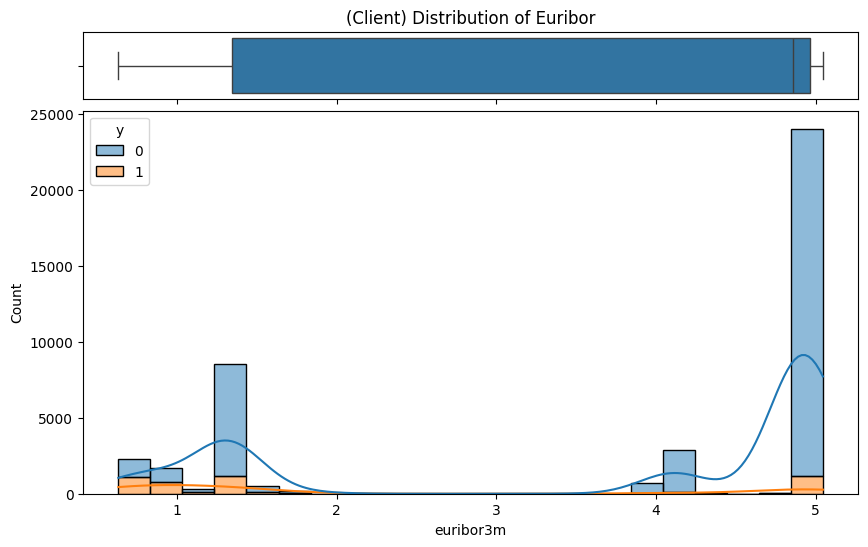

In [ ]:
# Create Histogram and Boxplot

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (10, 6),
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})
sns.boxplot(x = df['euribor3m'], ax=ax1)
sns.histplot(data = df, x='euribor3m', hue='y', multiple='stack', kde=True, ax=ax2)
ax1.set_title(f"(Client) Distribution of Euribor")
plt.show()

In [ ]:
df_euribor = df[['month', 'euribor3m', 'y']].drop_duplicates(ignore_index=True)

In [ ]:
print(f"{'Tidak ada pengaruh rate suku bunga terhadap penerimaan penawaran pembukaan deposito berjangka' if (df_euribor[df_euribor['y'] == 1]['euribor3m'].nunique()) == (df_euribor[df_euribor['y'] == 0]['euribor3m'].nunique()) else 'rate suku bunga kemungkinan berpengaruh terhadap penerimaan penawaran pembukaan deposito berjangka'}")

rate suku bunga kemungkinan berpengaruh terhadap penerimaan penawaran pembukaan deposito berjangka


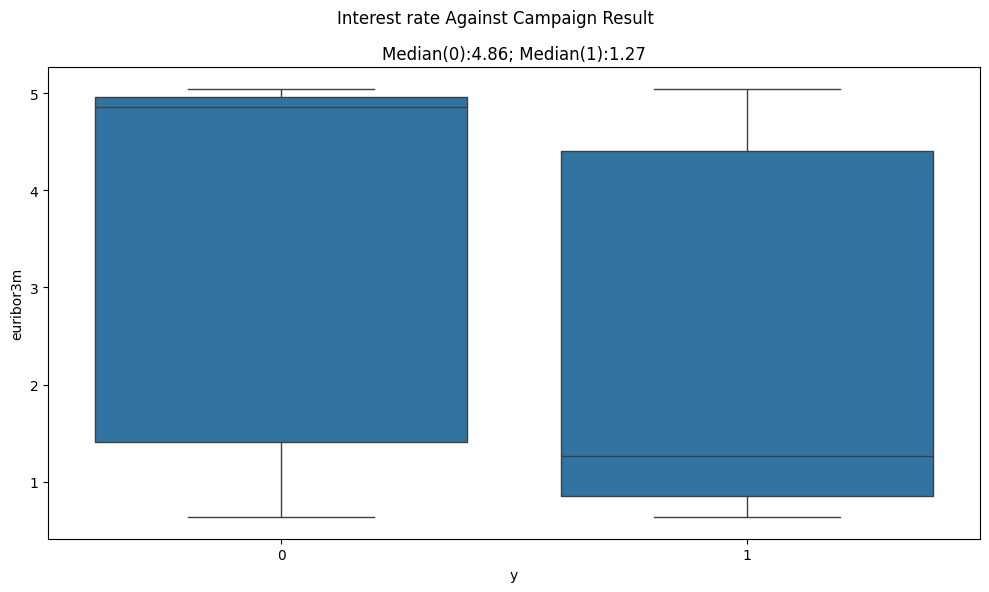

In [ ]:
# Create Boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['euribor3m'], x=df['y'])
plt.suptitle('Interest rate Against Campaign Result')
plt.title(f"Median(0):{df[df['y']==0]['euribor3m'].median().__round__(2)}; Median(1):{df[df['y']==1]['euribor3m'].median().__round__(2)}")
plt.tight_layout();

**Sebagian besar suku bunga pada client yang menerima campaign cenderung lebih kecil dibandingkan suku bunga pada client yang menolak penawaran**.

*didukung dengan hasil uji test

In [ ]:
stat, p = stats.mannwhitneyu(df[df['y'] == 0]['euribor3m'].values, df[df['y'] == 1]['euribor3m'].values, alternative='two-sided')
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Penyebaran data pada client yang menerima penawaran campaign sama dengan penyebaran pada client yang menolak')
else:
    print('Penyebaran data pada client yang menerima penawaran campaign tidak sama dengan penyebaran pada client yang menolak')

stat=126006833.000, p=0.000
Penyebaran data pada client yang menerima penawaran campaign tidak sama dengan penyebaran pada client yang menolak


In [ ]:
df_euribor['month'] = pd.Categorical(values=df_euribor['month'], categories=month_order, ordered=True)
df_euribor.sort_values(by='month', inplace=True)
df_euribor.reset_index(drop=True, inplace=True)

In [ ]:
df_euribor = df_euribor[['month', 'euribor3m']].drop_duplicates(ignore_index=True)

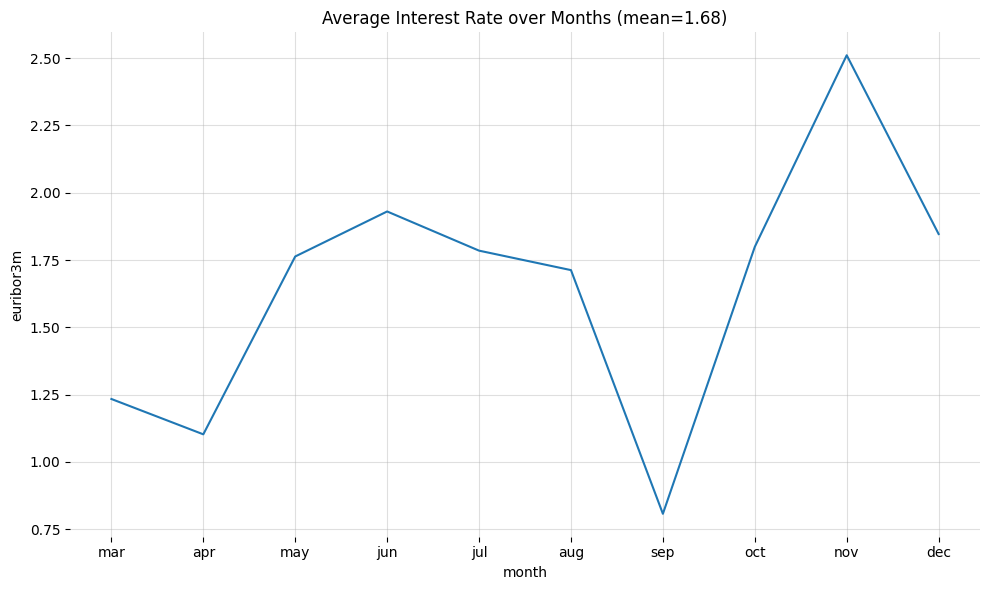

In [ ]:
# Create Line Chart

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_euribor, x='month', y='euribor3m', errorbar=None)
plt.title(f"Average Interest Rate over Months (mean={df_euribor['euribor3m'].mean().__round__(2)})")
plt.grid(alpha=0.4)
plt.setp(ax.spines.values(), visible=False)
plt.tight_layout();

Suku bunga tertinggi berada pada bulan November dan suku bunga terendah berada pada bulan September.

### Number of Employee

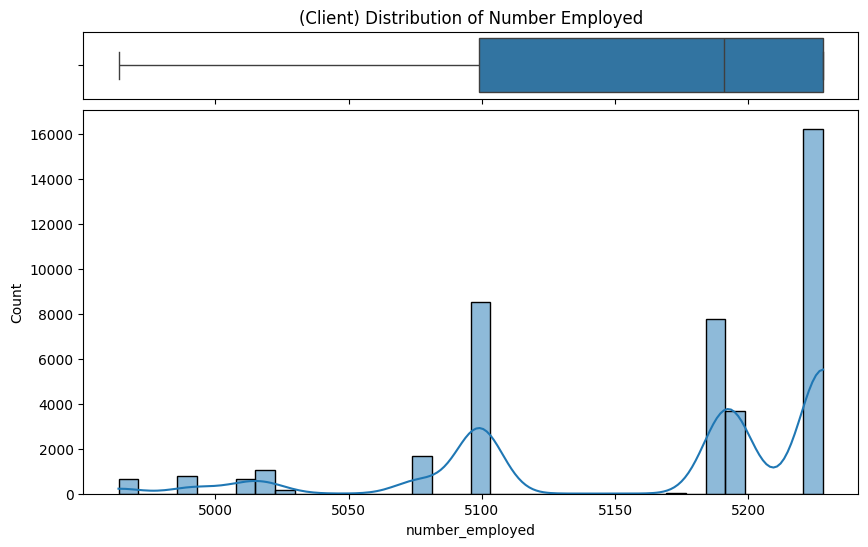

In [ ]:
# Create Histogram and Boxplot

fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (10, 6),
                                gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})
sns.boxplot(x = df['number_employed'], ax=ax1)
sns.histplot(data = df, x='number_employed', kde=True, ax=ax2)
ax1.set_title(f"(Client) Distribution of Number Employed")
plt.show()

Penyebaran client pada dataset berpusat pada rentang > 5100.

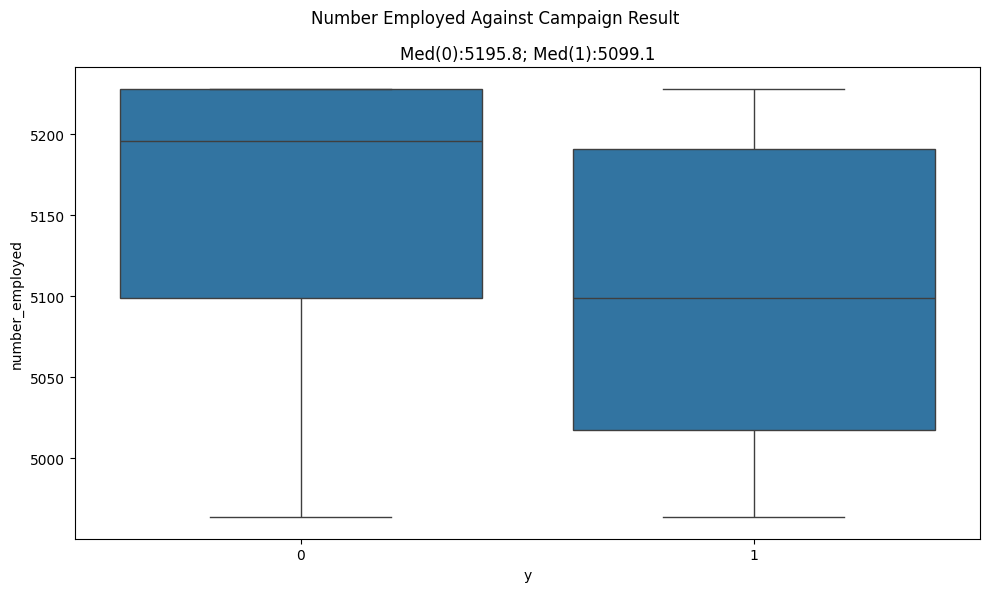

In [ ]:
# Create Boxplot

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y=df['number_employed'], x=df['y'])
plt.title(f"Med(0):{df[df['y']==0]['number_employed'].median().__round__(2)}; Med(1):{df[df['y']==1]['number_employed'].median().__round__(2)}")
plt.suptitle('Number Employed Against Campaign Result')
# plt.setp(ax.spines.values(), visible=False)
plt.tight_layout();

**Hubungan kondisi ekonomi terkait jumlah tenaga kerja yang dipekerjakan dengan keputusan client dalam menerima penawaran campaign sangat berbeda, dimana kondisi saat itu terhadap client yang menerima penawaran lebih kecil daripada client yang menolak.**  

In [ ]:
df_num_emp = df[['month', 'number_employed', 'emp_var_rate']].drop_duplicates(ignore_index=True)
df_num_emp['month'] = pd.Categorical(values=df_num_emp['month'], categories=month_order, ordered=True)
df_num_emp.sort_values(by='month', inplace=True)

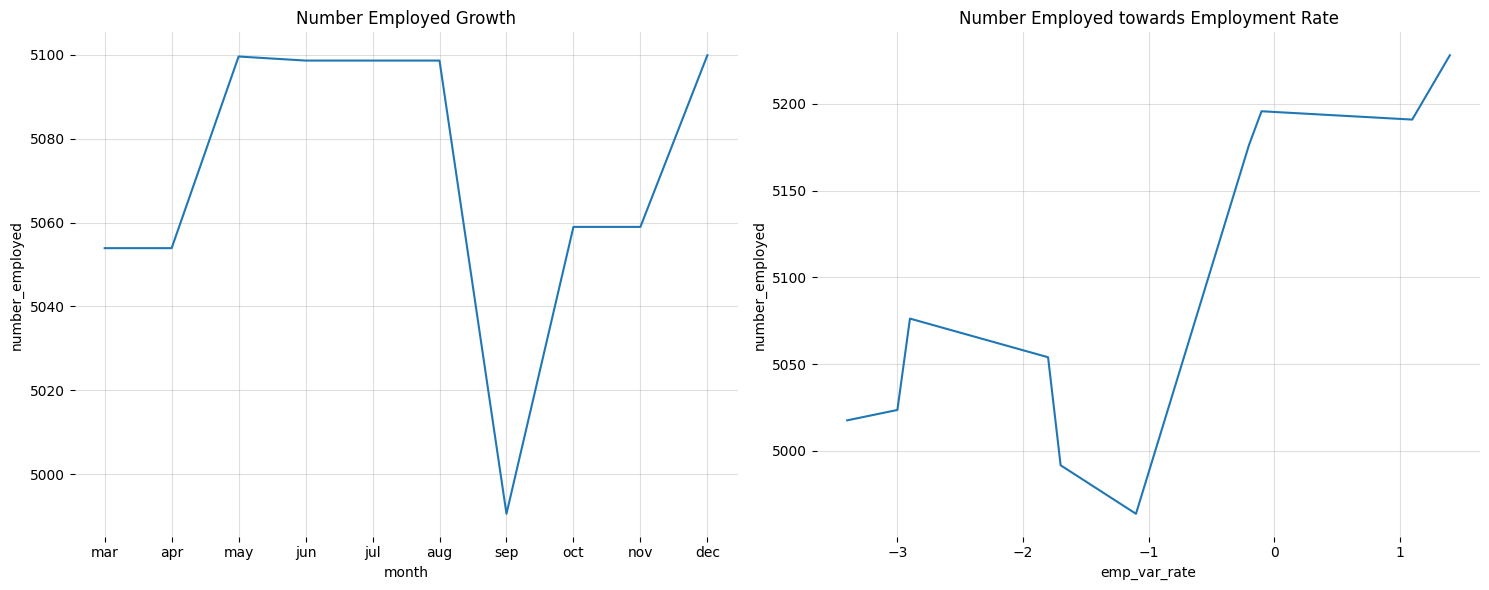

In [ ]:
# plt.figure(figsize=(6,3))
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.lineplot(ax=ax[0],data=df_num_emp[['month', 'number_employed']], x='month', y='number_employed', errorbar=None)
sns.lineplot(ax=ax[1], data=df_num_emp, x='emp_var_rate', y='number_employed', errorbar=None)
ax[0].set_title("Number Employed Growth")
ax[1].set_title("Number Employed towards Employment Rate")
ax[0].grid(alpha=0.4)
ax[1].grid(alpha=0.4)

plt.setp(ax[0].spines.values(), visible=False)
plt.setp(ax[1].spines.values(), visible=False)
plt.tight_layout();

May hingga Agustus, dan Desember merupakan bulan dengan jumlah pekerja terbanyak, sedangkan September dengan pekerja paling sedikit. Rate tenaga kerja berbanding lurus terhadap jumlah tenaga kerja, artinya semakin tinggi persentase, semakin besar besaran jumlahnya.

### Economics Summary<br>
Ketika kondisi ekonomi sebagai berikut, client perusahaan cenderung menerima penawaran untuk membuka deposit:
- Employment Rate: Rendah.
- Suku Bunga (Euribor): Rendah.

Ketika banyak yang menerima penawaran untuk membuka tabungan/deposito disaat kondisi suku bunga rendah, artinya jumlah permintaan pinjaman sedang naik yang menyebabkan pedagang/pengusaha menaikkan harga (indikasi inflasi). Dampak inflasi menyebabkan employment rate menurun, karena minimnya uang yang beredar menyebabkan pemasukan terhambat sehingga untuk mengurangi cost adalah mengurangi pekerja.

## Business Recommendation
Penawaran pembukaan deposito/tabungan memiliki kemungkinan besar berhasil jika penawaran dilakukan dengan rincian sebagai berikut:
- Kondisi ekonomi mengindikasikan adanya inflasi.
- Nasabah yang termasuk dalam rentang usia tua (kategori pensiun) > 65 memiliki acceptance rate terhadap penerimaan pembukaan deposito lebih besar serta nasabah yang berstatus 'student' masih berpotensi untuk menerima penawaran pembukaan tabungan/deposito.
- Penawaran pembukaan tabungan/deposito bisa lebih diprioritaskan kepada mereka yang masih berstatus single dan mereka yang belum pernah memiliki riwayat pembayaran pinjaman gagal (artinya, nasabah tidak pernah mengalami kesulitan pemenuhan kebutuhan seharinya sehingga memiliki potensi besar untuk melakukan savings).
- Menghubungi kembali nasabah yang pernah menerima campaign sebelumnya.
- Banyak melakukan campaign diawal dan diakhir bulan, karena tingkat acceptance rate dikedua bulan besar dibandingkan pertengahan bulan.

# 5. Machine Learning


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier

from xgboost.sklearn import XGBClassifier

from sklearn.metrics import make_scorer, confusion_matrix, recall_score

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

import lightgbm as lgb

## 5.0 Data Preprocessing

Diketahui hasil exploratory data sebelumnya, terdapat beberapa column yang memiliki value 'unknown'. Dalam penerapan data ke machine, unknown value dapat menjadikan faktor bias model dalam menginterpretasikan ciri client/nasabah. Oleh karena itu berikut dilakukan analisa dan preprocess lebih lanjut.

In [ ]:
def detect_unknown(x):
    if x == 'unknown':
        return np.nan
    else:
        return x

for i in df.columns:
    if 'unknown' in df[i].unique():
        df[i] = df[i].apply(detect_unknown)

C:\Users\Enigmanian\AppData\Local\Temp\ipykernel_14388\1831660269.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in df[i].unique():
C:\Users\Enigmanian\AppData\Local\Temp\ipykernel_14388\1831660269.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in df[i].unique():


In [ ]:
for i in df.columns:
  if df[i].isna().sum() > 0:
    unknown_total = df[i].isna().sum()
    unknown_positive = df[df['y']==1][i].isna().sum()*100/len(df[df['y']==1])
    unknown_negative = df[df['y']==0][i].isna().sum()*100/len(df[df['y']==0])
    print(f"{i} has {(unknown_total*100/len(df)).__round__(2)}% unknown values with target 0 contains: {unknown_negative.__round__(2)}% and target 1 contains: {unknown_positive.__round__(2)}% ")


job has 0.8% unknown values with target 0 contains: 0.8% and target 1 contains: 0.8% 
marital has 0.19% unknown values with target 0 contains: 0.19% and target 1 contains: 0.26% 
education has 4.2% unknown values with target 0 contains: 4.05% and target 1 contains: 5.41% 
default has 20.88% unknown values with target 0 contains: 22.31% and target 1 contains: 9.55% 
housing has 2.4% unknown values with target 0 contains: 2.42% and target 1 contains: 2.31% 
loan has 2.4% unknown values with target 0 contains: 2.42% and target 1 contains: 2.31% 


Dikarenakan salah satu kolom mengandung unknown 21%, maka menghilangkan data unknown tidak bisa dilakukan karena akan mengurangi informasi data terutama 9.5%nya merupakan ciri informasi client yang menerima penawaran.

Untuk unknown value akan ada 2 pendekatan terhadap beberapa column tertentu yang dirincikan seperti dibawah.

- **'Unknown'** pada **Default** bisa diinterpretasikan sebagai client yang belum pernah melakukan pinjaman apapun sedangkan **'No'** diinterpretasikan sebagai client yang sudah pernah melakukan pinjaman namun tidak pernah mengalami kemacetan/gagal bayar.
- **'Unknown'** pada **Marital** bisa diinterpretasikan sebagai janda/duda. Perbedaannya dengan **Divorced**:
  - **Usia**: Janda/duda umumnya diasumsikan sebagai mereka yang dipisahkan melalui kematian, sehingga dalam range usia bisa dikatakan lebih tua dibandingkan divorced.
  - **Responsibility**: Janda/duda harus menanggung biaya anak mereka sendiri tanpa bantuan dari pihak lain, sedangkan divorced tanggungan anak masih menjadi tanggung jawab kedua belah pihak<sup>1</sup>. Hal ini berdampak pada bobot beban finansial individu.
- **Housing** sebagai indikator pernah tidaknya client melakukan pinjaman untuk pembayaran rumah (asset). Seperti diketahui pada data, beberapa job client merupakan mahasiswa, oleh karena itu **'Unknown'** pada housing bisa diinterpretasikan apabila client belum pernah memiliki riwayat pembelian rumah (asset property)**, sedangkan <b>'No'</b> diinterpretasikan bagi client yang sudah memiliki riwayat pembelian rumah dan tidak menggunakan pinjaman untuk pelunasan/pembayaran.
- 'Unknown' pada **Job** diasumsikan sebagai pekerjaan diluar list yang tidak disebutkan.
- 'Unknown' pada **Education** diasumsikan sebagai pendidikan diluar list yang tidak disebutkan.
- 'Unknown' pada **Loan**, akan diisi dengan nilai terbanyak.
- 'Nonexistent' pada **Poutcome** diasumsikan sebagai client/nasabah baru gabung yang pada penawaran campaign sebelumnya tidak ada.

**Pembelian asset (hal yang mengeluarkan biaya besar) dan bagaimana pelunasan dilakukan dapat menjadi gambaran perusahaan dalam mengukur kapabilitas financial dan karakteristik client.  

<sup>1</sup>https://e-justice.europa.eu/content_parental_responsibility-302-pt-en.do?member=1


In [ ]:
df['loan'].fillna(df['loan'].mode()[0], inplace=True)

In [ ]:
df.fillna('unknown', inplace=True)

## 5.1 Feature Selection

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'number_employed', 'y'],
      dtype='object')

In [ ]:
print(f"Jumlah client yang belum pernah menerima panggilan sebelumnya (pdays): {len(df[df['pdays'] == 999])*100/len(df)}%")
print(f"Jumlah client yang menerima campaign tahun kemarin: {(len(df[(df['poutcome'] == 'success')])*100/len(df)).__round__(2)}%")
print(f"Jumlah client yang menolak campaign tahun kemarin: {(len(df[(df['poutcome'] == 'failure')])*100/len(df)).__round__(2)}%")
print()
print(f"Jumlah client yang menerima campaign tahun kemarin dan tahun ini: {(len(df[(df['poutcome'] == 'success') & (df['y']==1)])*100/len(df)).__round__(2)}% \
({(len(df[(df['poutcome'] == 'success') & (df['y']==1)])*100/len(df[(df['poutcome'] == 'success')])).__round__(2)}% of 3.33%)")
print(f"Jumlah client yang menolak campaign tahun kemarin dan tahun ini: {(len(df[(df['poutcome'] == 'failure') & (df['y']==0)])*100/len(df)).__round__(2)}%")

print(f"Jumlah client yang menerima campaign tahun kemarin namun menolak campaign tahun ini: {(len(df[(df['poutcome'] == 'success') & (df['y']==0)])*100/len(df)).__round__(2)}% \
({(len(df[(df['poutcome'] == 'success') & (df['y']==0)])*100/len(df[(df['poutcome'] == 'success')])).__round__(2)}% of 3.33%)")
print(f"Jumlah client yang menolak campaign tahun kemarin akhirnya menerima campaign tahun ini: {(len(df[(df['poutcome'] == 'failure') & (df['y']==1)])*100/len(df)).__round__(2)}% \
({(len(df[(df['poutcome'] == 'failure') & (df['y']==1)])*100/len(df[(df['poutcome'] == 'failure')])).__round__(2)}% of 10.33%)")

print(f"Jumlah client yang belum pernah mendapatkan tawaran campaign tahun kemarin dan menerima tawaran pertama tahun ini: {(len(df[(df['poutcome'] == 'nonexistent') & (df['y']==1)])*100/len(df)).__round__(2)}%")
print(f"Jumlah client yang belum pernah mendapatkan tawaran campaign tahun kemarin dan menolak tawaran pertama tahun ini: {(len(df[(df['poutcome'] == 'nonexistent') & (df['y']==0)])*100/len(df)).__round__(2)}%")

Jumlah client yang menerima campaign tahun kemarin: 3.33%
Jumlah client yang menolak campaign tahun kemarin: 10.33%

Jumlah client yang menerima campaign tahun kemarin dan tahun ini: 2.17% (65.11% of 3.33%)
Jumlah client yang menolak campaign tahun kemarin dan tahun ini: 8.86%
Jumlah client yang menerima campaign tahun kemarin namun menolak campaign tahun ini: 1.16% (34.89% of 3.33%)
Jumlah client yang menolak campaign tahun kemarin akhirnya menerima campaign tahun ini: 1.47% (14.23% of 10.33%)
Jumlah client yang belum pernah mendapatkan tawaran campaign tahun kemarin dan menerima tawaran pertama tahun ini: 7.63%
Jumlah client yang belum pernah mendapatkan tawaran campaign tahun kemarin dan menolak tawaran pertama tahun ini: 78.71%


Persentase jumlah client yang belum pernah mendapatkan tawaran campaign sebelumnya mencapai > 80%, artinya <u>sebagian besar client dataset merupakan client baru</u><br>

Berdasarkan data, persentase client yang sebelumnya menolak masih memiliki kemungkinan untuk menerima campaign tahun ini, dan 1.16% (atau ~35% dari clients yang sebelumnya menerima) menolak pembukaan deposito kembali, artinya <u>hasil campaign sebelumnya tidak bisa menentukan pasti keputusan client/nasabah dalam penawaran campaign selanjutnya</u><br>

**Namun persentase proporsi keputusan client terhadap penerimaan campaign sebelumnya (poutcome) dengan hasil keputusan campaign tahun ini (berdasarkan analisis sebelum) sangat besar, hal ini dapat mempengaruhi keputusan model ketika mempelajari ciri tersebut** (dikarenakan cara kerja model melihat hubungan per ciri terhadap hasil keputusan), <u> dikhawatirkan model akan memprediksi campaign selanjutnya berdasarkan ciri significant yang ada pada fitur ini</u>. Oleh karena itu, ciri poutcome akan dihilangkan.  

Ciri sama lainnya, **'Previous' dan 'Campaign'**, menunjukkan <u>pola persentase penolakan besar terhadap keputusan campaign ketika semakin banyak panggilan kepada client.</u> Hal ini dapat membuat model menginterpretasikan semakin besar nilai pada 2 ciri ini, semakin besar kemungkinan penolakan, <u>artinya jika panggilan semakin banyak dilakukan, maka kemungkinan model akan memprediksi client menolak semakin tinggi. Dalam konteks marketing/pemasaran, penawaran bisa dilakukan lebih dari 1x atau lebih, oleh karena itu ciri ini tidak bisa dipakai sebagai penentuan keputusan</u>.  

**Pdays** merupakan jumlah hari berlalu terakhir kali client dihubungi dari campaign sebelumnya dan pada penyebaran data, ciri menunjukkan 96.32% client merupakan client yang belum pernah dihubungi sebelumnya. Pada 96% tersebut <b>90% (berdasarkan analisis) menolak keputusan campaign tahun ini, artinya jika ciri ini dipelajari mesin sebagai ciri penentu keputusan, maka dikhawatirkan fitur ini mempengaruhi besar kemungkinan client yang belum pernah menerima panggilan untuk campaign sebelumnya, akan diprediksi menolak</b> (karena kenyataannya perusahaan bahkan belum melakukan panggilan terhadap client, tetapi model sudah memprediksi kemungkinan hasil client menolak)

Untuk memprediksi kemungkinan client terhadap penawaran sebelum dilakukan panggilan, maka **'Duration'** tidak akan pernah memiliki nilai dan akan dihilangkan dari ciri client.  

In [ ]:
features = df.drop(columns=['y', 'duration', 'poutcome', 'previous', 'campaign', 'pdays'], axis=1)
target = df['y']

## 5.2 Feature Encoding
Karena machine memproses angka maka untuk data text (string) akan diencode kedalam bentuk numeric. Untuk mempermudah mesin menginterpretasikan nilai kolom dan hubungannya dengan kolom/fitur lain, proses encoding dilakukan dengan rincian sebagai berikut:<br>
- Value Education akan diencode kedalam bentuk ordinal, artinya interpretasi value berupa 'tingkatan', semakin tinggi numeric semakin tinggi level value. (note: unknown akan didefine -1)
- Value pada kolom sisanya akan dilakukan encode per-category.  

In [ ]:
# categorical_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
categorical_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']
ordinal_features = ['education']
ordinal_education_order = ['illiterate', 'basic_4y', 'basic_6y', 'basic_9y', 'high_school', 'professional_course', 'university_degree']

categorical_tf = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')),
    ]
)
ordinal_tf = Pipeline(
    steps=[
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[ordinal_education_order]))
    ]
)

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_tf, categorical_features),
    ('ordinal', ordinal_tf, ordinal_features)
], remainder='passthrough')

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['job', 'marital', 'default', 'housing',
                                  'loan', 'contact', 'month', 'day_of_week']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(categories=[['illiterate',
                                                                              'basic_4y',
                                                                              'basic_6y',
                                                                              'basic_9y',
                                                                              'high_school',
                                                                              'professional_course',
                                                                              'university_degree']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['education'])])

In [ ]:
encoded_features_ = preprocessor.fit_transform(features)

feature_names = preprocessor.get_feature_names_out()
feature_names = [name.split('__')[1] if '__' in name else name for name in feature_names]
encoded_features = pd.DataFrame(encoded_features_, columns=feature_names)
encoded_features.head(2)

In [ ]:
encoded_features.shape

## 5.3 Data Splitting

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(features, target, test_size=0.2, stratify=target, random_state=42)

## 5.4 Modelling

### 5.4.1 Model Definition


In [ ]:
# Linear
logistic = LogisticRegression(random_state=42)

# Ensemble & Bagging Method
tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
bagging = BaggingClassifier(random_state=42, estimator=tree)

# Boosting Method
gradient_boost = GradientBoostingClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

In [ ]:
model_list = [logistic, tree, random_forest, bagging, lgbm, xgb, gradient_boost]

### 5.4.2 Feature Scaler (TBC)

In [ ]:
scaler = RobustScaler(with_centering=False)

### 5.4.3 Feature Sampling
Teknik sampling yang dilakukan *over-sampling*, artinya data minority class yang akan disintesis.<br> Untuk menghindari potensi overfitting terhadap minority class, sampling_strategy yang akan digunakan sebesar 70% (artinya jumlah minority setara 70% majority class)

Algoritma syntetis yang dipakai:
1. RandomOverSampler: Algoritma yang melakukan duplicate data
2. SMOTE : Selecting a minority class instance and its k nearest neighbors,generates synthetic examples by *interpolating between the selected instance and its neighbors.* (requirement: scalling)
3. ADASYN : ADASYN generates more synthetic samples for minority instances that are *closer to the decision boundary*, making it more likely to create synthetic samples in challenging areas of the feature space. (requirement:  scalling)

In [ ]:
sampling_strategy = 0.7

# oversampling
ros = RandomOverSampler(random_state=42, sampling_strategy=sampling_strategy)
smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
adasyn = ADASYN(random_state=42, sampling_strategy=sampling_strategy)

sampling_list = [ros, smote, adasyn]

### 5.4.4 Model & Metrics Preparation

Metrics Definition:<br>

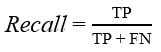



Untuk mengetahui persentase recall/prediksi yang diperoleh menghasilkan profit optimum terhadap penerapan prediksi ML, maka dibuat custom metrics dengan rincian sebagai berikut:<br>

Profit Optimum merupakan rasio profit hasil kalkulasi prediksi model terhadap rasio profit kalkulasi campaign manual.<br>
<u>Custom metrics bertujuan sebagai tolak ukur keberhasilan model dalam memberikan profit maksimal.</u>

======

Prenotes: 5.32 revenue 1 client & 1.14 biaya marketing. <br>
profit = revenue - cost campaign <br>
profit = (5.32 x jumlah prediksi benar) - (1.14 x (jumlah prediksi benar + jumlah error prediksi positif aktual negatif)

ml_metrics = (5.32 TP) - (1.14 (TP + FP)) *: profit yang dihasilkan dari hasil penerapan ML*<br>
manual_metrics = (5.32 (TP + FN) ) - (1.14 (TP + FP + FN + TN)) *: profit yang dihasilkan sebelum penerapan ML* <br>
selisih_profit = ml_metrics - manual_metrics<br>
**rate peningkatan profit per client (profit_metrics) = selisih_profit/jumlah_client**



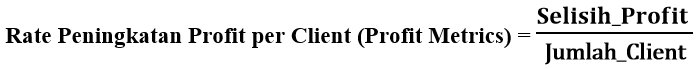

In [ ]:
def profit_metrics(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true=y_true, y_pred=y_pred).ravel()
  return ( ((5.32 * tp) - (1.14 * (tp + fp))) - ((5.32 * (tp + fn)) - (1.14 * (tp + fp + fn + tn))) ) / (tp+fp+fn+tn)

profit_score = make_scorer(profit_metrics, greater_is_better=True)

Apabila profit score bernilai positive, artinya sistem berhasil memberikan peningkatan profit kepada perusahaan <u>lebih besar</u> dibandingkan tanpa penerapan ML.

<u>Nilai profit score merupakan besaran rata profit minimum per client.</u>

#### Build Model

In [ ]:
def pipe_model(preprocessor=None, scaler=None, resampler=None, estimator=None):
  return Pipeline([
          ('preprocess', preprocessor),
          ('scaler', scaler),
          ('resample', resampler),
          ('model', estimator)
  ])

In [ ]:
skfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)

#### **Cross Validation**

In [ ]:
crossval_result = {}
for model in model_list:
  crossval_result[f'{model.__class__.__name__}']={}

  for sampling in sampling_list:
    pmodel = pipe_model(preprocessor=preprocessor, scaler=scaler, resampler=sampling, estimator=model)

    cv_score = cross_val_score(
        estimator=pmodel,
        X = X_train,
        y = y_train,
        cv = skfold,
        scoring = profit_score,
        # scoring = 'recall',
        error_score = 'raise',
        n_jobs=-1
    )

    crossval_result[f'{model.__class__.__name__}'][f'{sampling.__class__.__name__}'] = {}
    crossval_result[f'{model.__class__.__name__}'][f'{sampling.__class__.__name__}']['mean'] = cv_score.mean() # rata score
    # crossval_result[f'{model.__class__.__name__}'][f'{sampling.__class__.__name__}']['std'] = cv.std() # std error
    crossval_result[f'{model.__class__.__name__}'][f'{sampling.__class__.__name__}']['score'] = cv_score.round(3) # detail score




In [ ]:
# sampling 70% with new features
pd.DataFrame(crossval_result)

LogisticRegression  \
RandomOverSampler  {'mean': 0.6910370370370369, 'score': [0.693, 0.692, 0.679, 0.703, 0.688]}   
SMOTE              {'mean': 0.6926520947176684, 'score': [0.693, 0.694, 0.681, 0.705, 0.691]}   
ADASYN             {'mean': 0.6790740740740742, 'score': [0.685, 0.684, 0.665, 0.687, 0.675]}   

                                                                       DecisionTreeClassifier  \
RandomOverSampler  {'mean': 0.5921724347298116, 'score': [0.584, 0.591, 0.592, 0.588, 0.605]}   
SMOTE               {'mean': 0.5944681238615664, 'score': [0.59, 0.603, 0.589, 0.587, 0.603]}   
ADASYN              {'mean': 0.5924608378870674, 'score': [0.58, 0.593, 0.591, 0.592, 0.606]}   

                                                                      RandomForestClassifier  \
RandomOverSampler  {'mean': 0.648364905889496, 'score': [0.647, 0.649, 0.645, 0.649, 0.652]}   
SMOTE              {'mean': 0.6455962355798421, 'score': [0.639, 0.651, 0.642, 0.646, 0.65]}   
ADASYN               {'mean': 0.642619914996964, 'score': [0.64, 0.649, 0.639, 0.635, 0.65]}   

                                                                            BaggingClassifier  \
RandomOverSampler   {'mean': 0.6310030358227079, 'score': [0.627, 0.633, 0.625, 0.641, 0.63]}   
SMOTE              {'mean': 0.6309914996964178, 'score': [0.629, 0.628, 0.628, 0.639, 0.631]}   
ADASYN             {'mean': 0.6277959927140254, 'score': [0.624, 0.635, 0.621, 0.622, 0.637]}   

                                                                               LGBMClassifier  \
RandomOverSampler    {'mean': 0.7151475409836066, 'score': [0.722, 0.712, 0.7, 0.725, 0.717]}   
SMOTE              {'mean': 0.6731445051608985, 'score': [0.677, 0.674, 0.664, 0.669, 0.682]}   
ADASYN               {'mean': 0.662127504553734, 'score': [0.658, 0.664, 0.654, 0.66, 0.675]}   

                                                                                XGBClassifier  \
RandomOverSampler  {'mean': 0.6824426229508196, 'score': [0.685, 0.675, 0.681, 0.685, 0.687]}   
SMOTE               {'mean': 0.650833636915604, 'score': [0.646, 0.651, 0.653, 0.651, 0.653]}   
ADASYN              {'mean': 0.6400358227079538, 'score': [0.636, 0.648, 0.63, 0.644, 0.642]}   

                                                                   GradientBoostingClassifier  
RandomOverSampler   {'mean': 0.7106830601092896, 'score': [0.717, 0.708, 0.696, 0.722, 0.71]}  
SMOTE              {'mean': 0.6964474802671524, 'score': [0.704, 0.692, 0.682, 0.702, 0.702]}  
ADASYN             {'mean': 0.6921906496660595, 'score': [0.701, 0.689, 0.676, 0.699, 0.696]}

Boosting Method menghasilkan kemungkinan profit lebih besar dibandingkan metode lainnya. Model yang menerapkan boosting method (LGBM, Gradient Boost, dan XGB). LGBM dan Gradient Boosting yang akan dilakukan uji test.

#### **Uji Prediksi Cross Validation Based Model**

In [ ]:
cv_models = [lgbm, gradient_boost]
cv_samplings = [ros]

In [ ]:
crossval_result_test = {}
for model in cv_models:
  crossval_result_test[f'{model.__class__.__name__}']={}

  for sampling in cv_samplings:
    pmodel = pipe_model(preprocessor=preprocessor, scaler=scaler, resampler=sampling, estimator=model)
    pmodel.fit(X_train, y_train)

    y_pred = pmodel.predict(X_test)

    profit_mean = profit_metrics(y_true=y_test, y_pred=y_pred)
    recall = recall_score(y_true=y_test, y_pred=y_pred)

    crossval_result_test[f'{model.__class__.__name__}'] = {}
    crossval_result_test[f'{model.__class__.__name__}']['profit'] = profit_mean.round(3)
    crossval_result_test[f'{model.__class__.__name__}']['recall'] = recall.round(3)


In [ ]:
pd.DataFrame(crossval_result_test)

LGBMClassifier  GradientBoostingClassifier
profit           0.730                       0.732
recall           0.608                       0.613

#### Tune Model
Best Sampler: ROS<br>
Best Models: LGBM & Gradient Boosting<br>
Tuning Search: BayesianSearch.

In [ ]:
from skopt import BayesSearchCV
# from skopt.space import Real, Integer

In [ ]:
def find_best_param_bayes(estimator, params, n_iter=10, score=None):
  return BayesSearchCV(estimator=estimator,
                     search_spaces=params,
                     n_iter=n_iter,
                     scoring=score,
                     n_jobs=-1,
                     random_state=42)

**Gradient Boosting**

In [ ]:
max_depth = np.arange(2, 8, 1)
learning_rate = [0.05, 0.01, 0.1, 0.5, 1.0]
n_estimators = np.arange(50, 500, 50)
subsample = list(np.arange(0.5, 1, 0.1))
subsample.append(1.0)
max_features = list(np.arange(1, X_train.shape[1]+1))
max_features.append(None)
params = {
    'model__max_depth':max_depth , # kedalaman tree (def: 3)
    'model__learning_rate':learning_rate, # regularization (def: 0.1)
    'model__n_estimators':n_estimators, # jumlah tree (def: 100)
    'model__max_features': max_features, # n features for best split (def: None)
    'model__subsample':subsample # sampling rate (def: 1)
}

pmodel = pipe_model(preprocessor=preprocessor, scaler=scaler, resampler=ros, estimator=gradient_boost)

gradboost = find_best_param_bayes(estimator=pmodel, params=params, score=profit_score, n_iter=200)

gradboost.fit(X_train, y_train)

c:\Clarenti\Program\Anaconda\data\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


BayesSearchCV(estimator=Pipeline(steps=[('preprocess',
                                         ColumnTransformer(remainder='passthrough',
                                                           transformers=[('cat',
                                                                          Pipeline(steps=[('onehot',
                                                                                           OneHotEncoder(drop='first',
                                                                                                         handle_unknown='ignore'))]),
                                                                          ['job',
                                                                           'marital',
                                                                           'default',
                                                                           'housing',
                                                                           'loan',
                                                                           'contact',
                                                                           'month',
                                                                           'day_of_week']),
                                                                         ('ordinal',
                                                                          Pipeline(steps=[('ordinal',
                                                                                           OrdinalEncoder(categories=[['illiter...
              n_iter=200, n_jobs=-1, random_state=42,
              scoring=make_scorer(profit_metrics),
              search_spaces={'model__learning_rate': [0.05, 0.01, 0.1, 0.5,
                                                      1.0],
                             'model__max_depth': array([2, 3, 4, 5, 6, 7]),
                             'model__max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15,
                                                     None],
                             'model__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                             'model__subsample': [0.5, 0.6, 0.7,
                                                  0.7999999999999999,
                                                  0.8999999999999999, 1.0]})

In [ ]:
gradboost.best_score_

0.7140862173649059

In [ ]:
gradboost.best_params_

OrderedDict([('model__learning_rate', 0.01),
             ('model__max_depth', 7),
             ('model__max_features', 15),
             ('model__n_estimators', 150),
             ('model__subsample', 0.5)])

**LGBM**

In [ ]:
# https://dev.to/kamil_k7k/understanding-lightgbm-parameters-and-how-to-tune-them-14n0

max_depth = list(np.arange(1, 11, 1))
max_depth.append(-1)
n_estimators = np.arange(50, 501, 50)
subsample = list(np.arange(0.5, 1, 0.1))
subsample.append(1.0)
num_leaves = np.arange(25, 101, 25)

params = {
    'model__boosting_type'  : ['gbdt', 'dart'],
    'model__max_depth' : max_depth, # def: -1
    'model__num_leaf' : num_leaves, # def: 31
    'model__learning_rate' : [0.01, 0.05, 0.1, 0.5, 1.0], # def: 0.1
    'model__n_estimators' : n_estimators, # def: 100
    'model__subsample' : subsample, # def 1; jumlah ratio data yang digunakan utk ditrain pada masing tree.
    'model__colsample_bytree' : [0.2, 0.4, 0.5, 0.7, 0.8, 1.0], # rasio fitur yang digunakan pada tiap pohon. def: 1
    'model__reg_alpha' : [0, 0.1, 0.01, 1.0, 0.5], # def: 0; L1 Regularization
    'model__bagging_freq': [0, 1, 5, 10],  # Add bagging_freq; def: 0
    'model__bagging_fraction': [0.6, 0.8, 1.0],  # Add bagging_fraction; def: 1.0
    'model__feature_fraction': [0.6, 0.8, 1.0]  # Add feature_fraction; def: 1.0
    # 'model__reg_lmbda' : [0, 0.1, 0.01, 1.0, 0.5] # def: 0; L2 Regularization
}

pmodel = pipe_model(preprocessor=preprocessor, scaler=scaler, resampler=ros, estimator=lgbm)

lightboost = find_best_param_bayes(estimator=pmodel, params=params, score=profit_score, n_iter=200)

lightboost.fit(X_train, y_train)

c:\Clarenti\Program\Anaconda\data\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.8999999999999999 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_leaves is set=31, num_leaf=75 will be ignored. Current value: num_leaves=31


BayesSearchCV(estimator=Pipeline(steps=[('preprocess',
                                         ColumnTransformer(remainder='passthrough',
                                                           transformers=[('cat',
                                                                          Pipeline(steps=[('onehot',
                                                                                           OneHotEncoder(drop='first',
                                                                                                         handle_unknown='ignore'))]),
                                                                          ['job',
                                                                           'marital',
                                                                           'default',
                                                                           'housing',
                                                                           'loan',
                                                                           'contact',
                                                                           'month',
                                                                           'day_of_week']),
                                                                         ('ordinal',
                                                                          Pipeline(steps=[('ordinal',
                                                                                           OrdinalEncoder(categories=[['illiter...
                             'model__feature_fraction': [0.6, 0.8, 1.0],
                             'model__learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                      1.0],
                             'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  -1],
                             'model__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]),
                             'model__num_leaf': array([ 25,  50,  75, 100]),
                             'model__reg_alpha': [0, 0.1, 0.01, 1.0, 0.5],
                             'model__subsample': [0.5, 0.6, 0.7,
                                                  0.7999999999999999,
                                                  0.8999999999999999, 1.0]})

In [ ]:
lightboost.best_score_

0.7173163327261688

In [ ]:
lightboost.best_params_

OrderedDict([('model__bagging_fraction', 0.6),
             ('model__bagging_freq', 1),
             ('model__boosting_type', 'dart'),
             ('model__colsample_bytree', 1.0),
             ('model__feature_fraction', 0.6),
             ('model__learning_rate', 0.1),
             ('model__max_depth', 10),
             ('model__n_estimators', 300),
             ('model__num_leaf', 75),
             ('model__reg_alpha', 1.0),
             ('model__subsample', 0.8999999999999999)])

#### Tuning Prediction


In [ ]:
tunings = [gradboost.best_estimator_, lightboost.best_estimator_]

tuned_pred_result = {}
for model in tunings :
    model.fit(X_train, y_train)
    tuned_y_pred = model.predict(X_test)

    tuned_pred_result[f"{model.named_steps['model'].__class__.__name__}"]= {}
    tuned_pred_result[f"{model.named_steps['model'].__class__.__name__}"]['profit'] = profit_metrics(y_test, tuned_y_pred)
    tuned_pred_result[f"{model.named_steps['model'].__class__.__name__}"]['recall'] = recall_score(y_test, tuned_y_pred)
    print(accuracy_score(y_test, tuned_y_pred))

0.8757892180670228
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.8999999999999999 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_leaves is set=31, num_leaf=75 will be ignored. Current value: num_leaves=31
0.8699611461874697


In [ ]:
pd.concat([pd.DataFrame(tuned_pred_result).round(3), pd.DataFrame(crossval_result_test)], axis=1, keys=['After Tuning', 'Before Tuning'])

After Tuning                 Before Tuning  \
       GradientBoostingClassifier LGBMClassifier LGBMClassifier   
profit                      0.733          0.732          0.730   
recall                      0.599          0.615          0.608   

                                   
       GradientBoostingClassifier  
profit                      0.732  
recall                      0.613

Hasil tuning menunjukkan peningkatan 0.13% yang sebelumnya Gradient Boosting (0.732) menjadi 0.733, sedangkan LGBM juga mengalami peningkatan dari 0.730 menjadi 0.732. Model yang akan digunakan dan diuji selanjutnya Gradient Boosting karena menghasilkan rata profit yang lebih tinggi dibandingkan LGBM meskipun secara persentase recall lgbm lebih tinggi namun dikarenakan prioritas pada pendapatan profit optimum, maka gradient boosting yang akan dilakukan uji coba.

In [ ]:
tunings = [gradboost.best_estimator_, lightboost.best_estimator_]

tuned_pred_result_train = {}
for model in tunings :
    model.fit(X_train, y_train)
    tuned_y_pred = model.predict(X_train)

    tuned_pred_result_train[f"{model.named_steps['model'].__class__.__name__}"]= {}
    tuned_pred_result_train[f"{model.named_steps['model'].__class__.__name__}"]['profit'] = profit_metrics(y_train, tuned_y_pred)
    tuned_pred_result_train[f"{model.named_steps['model'].__class__.__name__}"]['recall'] = recall_score(y_train, tuned_y_pred)
    print(accuracy_score(y_train, tuned_y_pred))

0.8727079538554948
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.8999999999999999 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_leaves is set=31, num_leaf=75 will be ignored. Current value: num_leaves=31
0.8663327261687918


In [ ]:
pd.DataFrame(tuned_pred_result_train).round(3)

GradientBoostingClassifier  LGBMClassifier
profit                       0.729           0.728
recall                       0.598           0.618

Secara hasil uji training pada metrics recall menunjukkan tidak adanya indikasi overfitting.

**Model Feature Importances**<br>
Best Tuned Model: Gradient Boosting Classifier

In [ ]:
tuned_gradboost = gradboost.best_estimator_

In [ ]:
gradboost_features = tuned_gradboost.named_steps['model'].feature_importances_

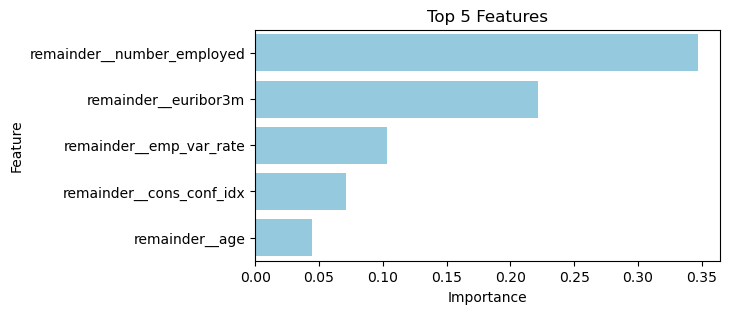

In [ ]:
importance_df = pd.DataFrame({
    "Features": preprocessor.get_feature_names_out(),
    "Importances": gradboost_features
}).sort_values(by='Importances', ascending=False)

plt.figure(figsize=(6, 3))
sns.barplot(x='Importances', y='Features', data=importance_df.nlargest(5, columns=['Importances']), color='skyblue')
plt.title('Top 5 Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
importance_df_ = importance_df.copy()
importance_df_['Importances'] = importance_df_['Importances']*100
importance_df_['cumsum'] = importance_df_['Importances'].cumsum()
importance_df_[importance_df_['cumsum'] <= 80]

Features  Importances     cumsum
39  remainder__number_employed    34.706446  34.706446
38        remainder__euribor3m    22.139933  56.846379
35     remainder__emp_var_rate    10.323474  67.169853
37    remainder__cons_conf_idx     7.126144  74.295997
34              remainder__age     4.471937  78.767934

In [ ]:
Importance_X_train = X_train[['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'number_employed', 'age']]
Importance_X_test = X_test[['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'number_employed', 'age']]

**Uji Model menggunakan Fitur Significant**

In [ ]:
# categorical_features = ['contact']
# categorical_tf = Pipeline(
#     steps=[
#         ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')),
#     ]
# )
# fi_preprocessor = ColumnTransformer(transformers=[
#     ('cat', categorical_tf, categorical_features)
# ], remainder='passthrough')

In [ ]:
# tuned_gradboost.named_steps['model']

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, max_features=15,
                           n_estimators=150, random_state=42, subsample=0.5)

In [ ]:
fi_pmodel = pipe_model(preprocessor=None, scaler=scaler, resampler=ros, estimator=tuned_gradboost.named_steps['model'])

fi_pmodel.fit(Importance_X_train, y_train)

Pipeline(steps=[('preprocess', None),
                ('scaler', RobustScaler(with_centering=False)),
                ('resample',
                 RandomOverSampler(random_state=42, sampling_strategy=0.7)),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=7,
                                            max_features=15, n_estimators=150,
                                            random_state=42, subsample=0.5))])

In [ ]:
importance_y_pred = fi_pmodel.predict(Importance_X_test)
print(f"profit: {profit_metrics(y_test, importance_y_pred).round(3)}, recall: {recall_score(y_test, importance_y_pred).round(3)}")

profit: 0.727, recall: 0.605


Uji hasil tuning gradient boosting sebelumnya 0.7326 (~ 0.733) dengan recall 0.599 tidak berbeda significant ketika menggunakan fitur pada *feature importances* 0.727 (~ 0.73) dengan recall 0.605.

## Probability Analysis

In [ ]:
tuned_gradboost.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['job', 'marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['illiterate',
                                                                                               'basic_4y',
                                                                                               'basic_6...
                                                                                               'professional_course',
                                                                                               'university_degree']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['education'])])),
                ('scaler', RobustScaler(with_centering=False)),
                ('resample',
                 RandomOverSampler(random_state=42, sampling_strategy=0.7)),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=7,
                                            max_features=15, n_estimators=150,
                                            random_state=42, subsample=0.5))])

In [ ]:
client_proba = tuned_gradboost.predict_proba(X_test)

In [ ]:
test_proba = X_test.copy()

test_proba['accept_proba'] = client_proba[:, 1]

In [ ]:
def client_probability_segmentation(proba):
  if proba < 0.4:
    return 'low'
  elif proba < 0.8:
    return 'medium'
  else:
    return 'high'

test_proba['category_proba'] = test_proba['accept_proba'].apply(client_probability_segmentation)

In [ ]:
test_proba.head(2)

age       job  marital            education  default housing loan  \
8489    35  services  married          high_school  unknown      no   no   
40832   30   student   single  professional_course       no     yes   no   

         contact month day_of_week  emp_var_rate  cons_price_idx  \
8489   telephone   jun         wed           1.4          94.465   
40832   cellular   sep         tue          -1.1          94.199   

       cons_conf_idx  euribor3m  number_employed  accept_proba category_proba  
8489           -41.8      4.864           5228.1      0.252969            low  
40832          -37.5      0.880           4963.6      0.765051         medium

**Probability Distribution**

In [ ]:
merge_proba = pd.concat([test_proba, y_test], axis=1)

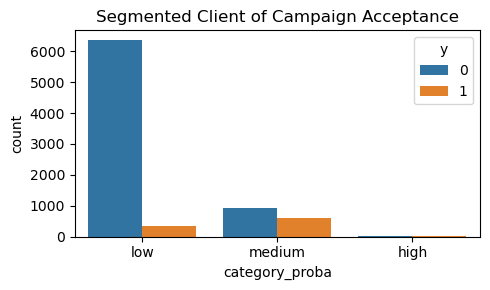

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=merge_proba, x='category_proba', hue='y')
plt.title("Segmented Client of Campaign Acceptance")
plt.tight_layout();

In [ ]:
(pd.crosstab(index=merge_proba['category_proba'], columns=merge_proba['y'], values=merge_proba['y'], aggfunc='count', normalize='index')*100).round(2)

y                   0      1
category_proba              
high            50.00  50.00
low             95.00   5.00
medium          61.52  38.48

Hasil prediksi (berdasarkan segmentasi probability) menunjukkan keberhasilan model dalam memprediksi sebagian besar client sesuai persentase probabilitynya. <br>

**'Low'** merupakan segment client yang memiliki besaran kemungkinan menerima penawaran < 40%, artinya jika dikelompokkan berdasarkan 'terima (1)' / 'tidak (0)' maka client akan berada pada kelompok 'tidak' dan persentase menunjukkan 95% (akurasi) model berhasil memprediksi client menolak dalam range low tersebut.<br>

**'High'** merupakan segment client yang memiliki besaran kemungkinan menerima penawaran >= 80%, artinya jika dikelompokkan berdasarkan 'terima (1)' / 'tidak (0)' maka client akan berada pada kelompok 'ya' dan persentase menunjukkan 50% model berhasil memprediksi client menerima dalam range tersebut.<br>

**'Medium'** merupakan segment client yang memiliki besaran kemungkinan menerima penawaran 40% - 79%, artinya jika dikelompokkan berdasarkan 'terima (1)' / 'tidak (0)' maka sebagian client akan berada pada kelompok 'ya' dan 'tidak'.

In [ ]:
def client_probability(proba):
    if proba <= 0.1:
        return '0-10'
    elif proba <= 0.2:
        return '11-20'
    elif proba <= 0.3:
        return '21-30'
    elif proba <= 0.4:
        return '31-40'
    elif proba <= 0.5:
        return '41-50'
    elif proba <= 0.6:
        return '51-60'
    elif proba <= 0.7:
        return '61-70'
    elif proba <= 0.8:
        return '71-80'
    elif proba <= 0.9:
        return '81-90'
    else:
        return '> 90'

merge_proba['range_accept_proba'] = merge_proba['accept_proba'].apply(client_probability)

In [ ]:
t = pd.crosstab(index=merge_proba['range_accept_proba'], columns=merge_proba['y'], values=merge_proba['y'], aggfunc='count', normalize='index')*100

In [ ]:
t['accuracy_prob'] = np.where(t.index.isin(['0-10', '11-20', '21-30', '31-40', '41-50']), t[0], t[1])

In [ ]:
t

y                           0          1  accuracy_prob
range_accept_proba                                     
11-20               97.232250   2.767750      97.232250
21-30               95.864662   4.135338      95.864662
31-40               91.563275   8.436725      91.563275
41-50               88.787879  11.212121      88.787879
51-60               71.974522  28.025478      28.025478
61-70               60.000000  40.000000      40.000000
71-80               43.992933  56.007067      56.007067
81-90               50.000000  50.000000      50.000000

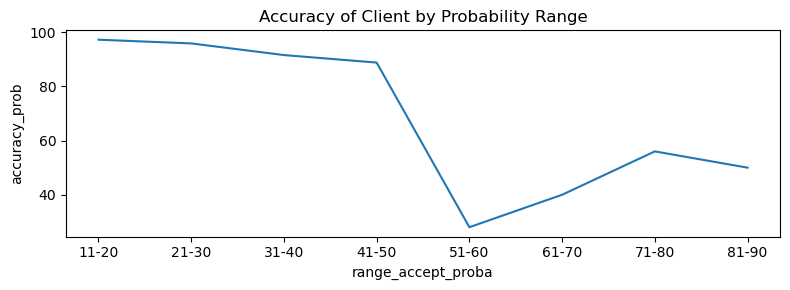

In [ ]:
plt.figure(figsize=(8,3))
sns.lineplot(data=t, x=t.index, y='accuracy_prob')
plt.title('Accuracy of Client by Probability Range')
plt.tight_layout();

In [ ]:
pd.crosstab(index=merge_proba['range_accept_proba'], columns=merge_proba['y'], values=merge_proba['y'], aggfunc='count', margins=True)

y                      0    1   All
range_accept_proba                 
11-20                808   23   831
21-30               4080  176  4256
31-40               1476  136  1612
41-50                293   37   330
51-60                113   44   157
61-70                282  188   470
71-80                249  317   566
81-90                  7    7    14
All                 7308  928  8236

Hasil prediksi menunjukkan kesulitan model dalam memprediksi ciri client yang memiliki possibility tinggi (> 50%), artinya pada range tersebut sebagian besar data masih memiliki kemungkinan besar diprediksi sebagai client yang akan menerima meskipun data aktual menolak.<br>
Namun jumlah client yang diprediksi menerima tetapi berpotensi besar menolak masih lebih besar dibandingkan jumlah client yang diprediksi menolak tetapi berpotensi besar menerima, <br>

**Asumsi hasil testing**<br>
- Dari 928 client yang sebenarnya menerima, 60% berhasil diprediksi dengan benar dan keuntungan yang masuk 2.324 euro(**setelah pengurangan biaya marketing*), sedangkan 40% sisa client yang diprediksi salah, total kehilangan potential pemasukan 1.979 euro.
- Bandingkan jika perusahaan tetap menggunakan cara manual, perusahaan akan mendapatkan semua profit dari client yang berpotensi menerima 3.879 euro (**setelah pengurangan biaya marketing dari client menerima*), <b>namun belum termasuk pengurangan biaya marketing (1.14, berdasarkan rata panggilan data dan biaya per menit panggilan) dari client yang tidak berpotensi menerima (7308) </b> (dikarenakan perusahaan juga akan melakukan panggilan), sehingga total profit yang didapat bernilai <u>negatif</u>.

Artinya, <u>jika balik kepada salah satu tujuan penerapan machine learning ini kedalam sistem perusahaan ialah untuk mendapatkan profit semaksimal mungkin, maka sistem yang sudah dibangun hingga saat ini berpotensi besar membantu dalam mendapatkan profit/keuntungan itu termasuk dalam menekan cost.</u>

Namun, jika bicara mengenai akurasi prediksi, sistem masih memiliki kelemahan dalam memprediksi client yang berpotensi menerima. Guna mengatasi mengatasi kelemahan sistem saat ini, client akan dibagi menjadi 3 segment, yaitu: low, medium, high.

Perusahaan akan melihat persentase probability penerimaan dari setiap clientnya, untuk probability yang berkisar dari 50% ke atas, maka ada kecenderungan hasil prediksi salah <u>namun perusahaan dapat melakukan penawaran untuk meningkatkan kemungkinan client menerima.</u>  

**Segment medium**, memiliki akurasi prediksi paling buruk dimana sebagian besar (aktual) merupakan client berpotensi menolak, maka perusahaan dapat melakukan penawaran dengan bobot yang sedikit lebih besar.<br>

**Segment high**, bisa dikatakan hasil prediksi masih berpotensi benar namun potensi benar tersebut seimbang dengan potensi kesalahan, untuk meng-cover kesalahan prediksi perusahaan dapat melakukan penawaran dengan bobot yang lebih ringan.  

Beberapa tindakan yang bisa dilakukan dan penjelasan mengenai segmentasi client akan dijelaskan pada bagian selanjutnya.



### Error Analytics

Dikarenakan diketahui beberapa prediksi kesalahan sebelumnya pada range medium dan high, analisis bawah hanya bertujuan untuk mencari penyebab dan karakteristik lebih dalam dari data yang mengalami kesalahan prediksi.

In [ ]:
client_proba_train = tuned_gradboost.predict_proba(X_train)
client_proba_train_pred = tuned_gradboost.predict(X_train)

In [ ]:
train_proba = X_train.copy()

train_proba['accept_proba'] = client_proba_train[:, 1]
train_proba['acceptance'] = client_proba_train_pred

In [ ]:
merge_proba_train = pd.concat([train_proba, y_train], axis=1)
merge_proba_train['range_accept_proba'] = merge_proba_train['accept_proba'].apply(client_probability)

t_train = pd.crosstab(index=merge_proba_train['range_accept_proba'], columns=merge_proba_train['y'], values=merge_proba_train['y'], aggfunc='count', normalize='index')*100
t_train['accuracy_prob'] = np.where(t_train.index.isin(['0-10', '11-20', '21-30', '31-40', '41-50']), t_train[0], t_train[1])

In [ ]:
t_train

y                           0          1  accuracy_prob
range_accept_proba                                     
11-20               98.631360   1.368640      98.631360
21-30               95.838535   4.161465      95.838535
31-40               91.625540   8.374460      91.625540
41-50               84.955752  15.044248      84.955752
51-60               79.145078  20.854922      20.854922
61-70               69.204738  30.795262      30.795262
71-80               37.078652  62.921348      62.921348
81-90                6.779661  93.220339      93.220339

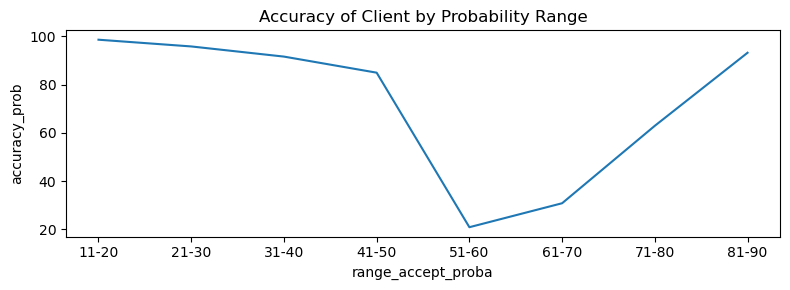

In [ ]:
plt.figure(figsize=(8,3))
sns.lineplot(data=t_train, x=t_train.index, y='accuracy_prob')
plt.title('Accuracy of Client by Probability Range')
plt.tight_layout();

Pada rentang 50-70%, 20-30% diantaranya berhasil diprediksi dengan benar, artinya pada prediksi data train model juga mengalami kesulitan mengenali ciri client yang berada pada range tersebut.

In [ ]:
med_client_pred = merge_proba_train[merge_proba_train['range_accept_proba'].isin(['51-60', '61-70'])]
med_client_pred_error = med_client_pred[med_client_pred['y']==0]

med_client_pred_test = merge_proba[merge_proba['range_accept_proba'].isin(['51-60', '61-70'])]
med_client_pred_test_error = med_client_pred_test[med_client_pred_test['y']==0]
# client_actual = merge_proba_train[merge_proba_train['y']==1]

In [ ]:
print("Jumlah client (train) yang diprediksi:")
med_client_pred['range_accept_proba'].value_counts()

Jumlah client (train) yang diprediksi:


range_accept_proba
61-70    1773
51-60     772
Name: count, dtype: int64

**Categorical Characteristic**

In [ ]:
# Kesalahan prediksi (aktual = 1, pred = 0)
positive = merge_proba_train[(merge_proba_train['y']==1)]
negative = merge_proba_train[(merge_proba_train['y']==0)]
false_negative = merge_proba_train[(merge_proba_train['y']==1) & (merge_proba_train['acceptance'] == 0)]
false_positive = merge_proba_train[(merge_proba_train['y']==0) & (merge_proba_train['acceptance'] == 1)]

#### Job

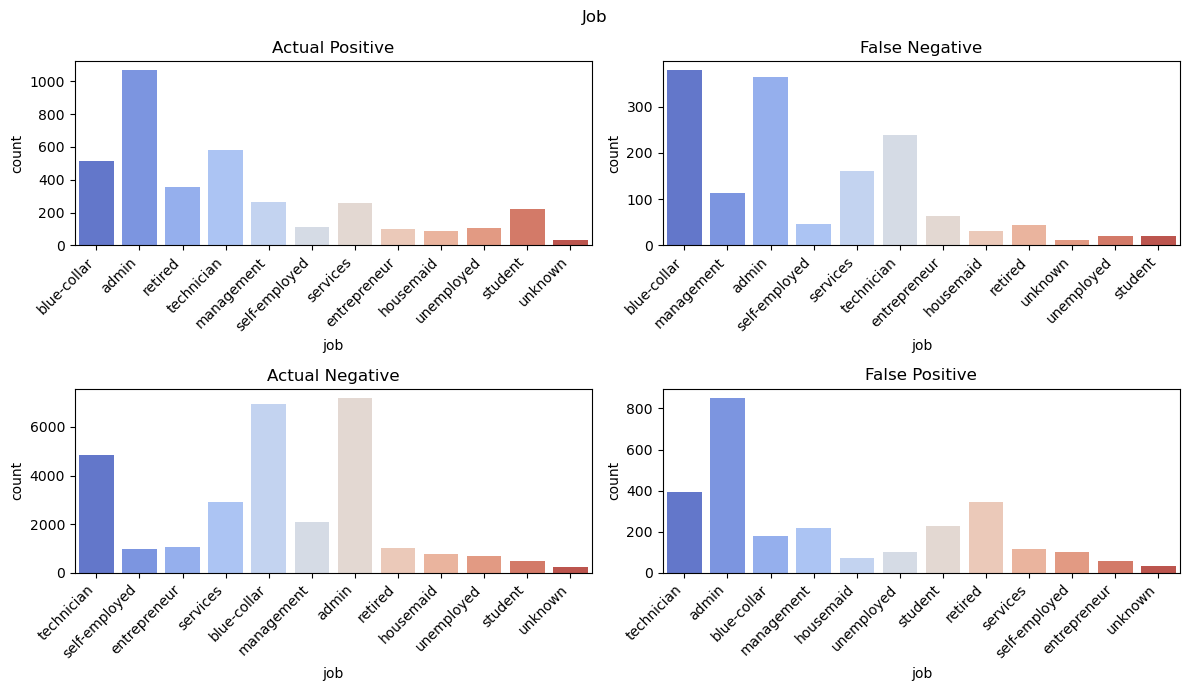

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,7))
sns.countplot(data=positive, x='job', ax=axes[0][0], palette='coolwarm')
sns.countplot(data=false_negative, x='job', ax=axes[0][1], palette='coolwarm')
sns.countplot(data=negative, x='job', ax=axes[1][0], palette='coolwarm')
sns.countplot(data=false_positive, x='job', ax=axes[1][1], palette='coolwarm')

axes[0][0].set_title('Actual Positive')
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=45, ha='right')
axes[0][1].set_title('False Negative')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45, ha='right')
axes[1][0].set_title('Actual Negative')
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45, ha='right')
axes[1][1].set_title('False Positive')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle('Job')
plt.tight_layout();

Ciri 'job' dari client yang berpotensi menerima, sebagian besar merupakan *client admin*, sedangkan ciri 'job' dari client berpotensi menolak, sebagian besar merupakan *client blue-collar & admin*.<br>
Dari ciri job, adanya potensi *overlap* antara client menerima dan menolak.

Sebagian besar error pada False Negative (kesalahan memprediksi pada client actual positive), sebagian besar merupakan client dengan ciri 'job' *blue-collar & admin*, dimana ciri client ini sebagian besar ada di client actual negative (untuk blue-collar dan admin) dan positive (untuk admin).

Sedangkan error False Positive (kesalahan memprediksi pada client actual negative), sebagian besar merupakan client admin, dimana pada ciri ini model menganggap merupakan ciri dari actual positive.

**conclusion**: model cenderung mengalami kesulitan dalam membaca ciri client yang memiliki pekerjaan admin, dikarenakan admin memiliki porsi yang cukup significant terhadap ciri client menerima maupun menolak, maka akan ada kecenderungan model akan salah memprediksi, sedangkan untuk <u>client blue-collar, dikarenakan porsi terbesar ada di client negative, maka model memiliki potensi untuk memprediksi client blue-collar sebagai client menolak</u>.

#### Marital

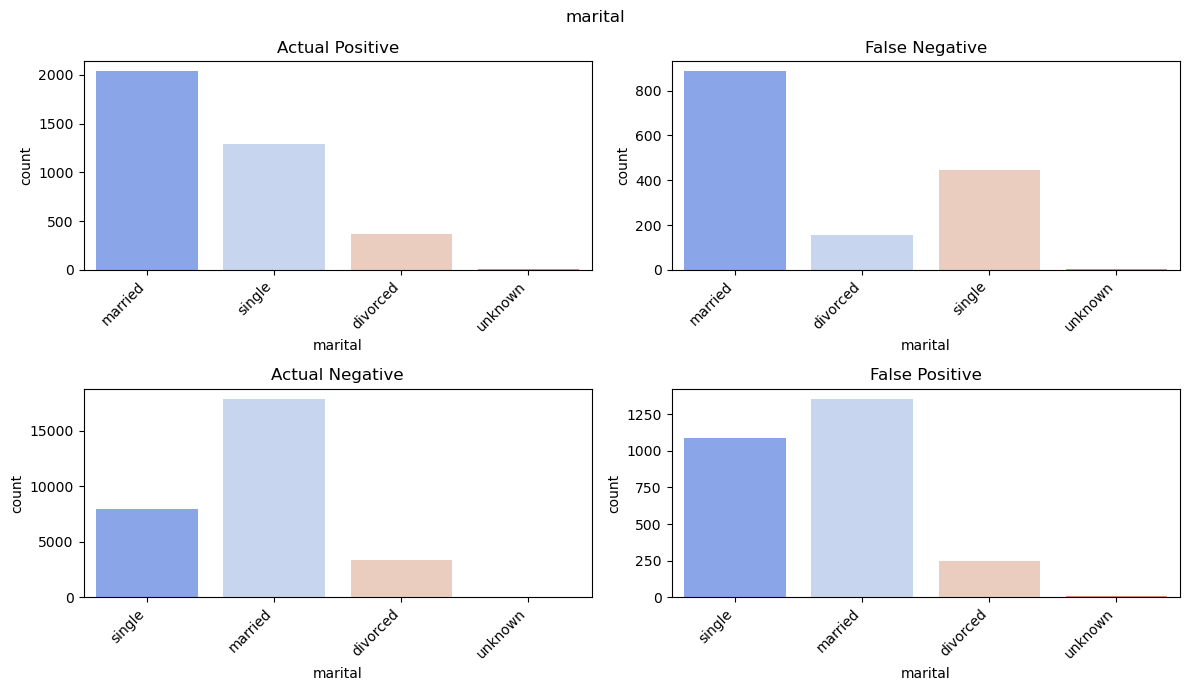

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,7))
sns.countplot(data=positive, x='marital', ax=axes[0][0], palette='coolwarm')
sns.countplot(data=false_negative, x='marital', ax=axes[0][1], palette='coolwarm')
sns.countplot(data=negative, x='marital', ax=axes[1][0], palette='coolwarm')
sns.countplot(data=false_positive, x='marital', ax=axes[1][1], palette='coolwarm')

axes[0][0].set_title('Actual Positive')
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=45, ha='right')
axes[0][1].set_title('False Negative')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45, ha='right')
axes[1][0].set_title('Actual Negative')
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45, ha='right')
axes[1][1].set_title('False Positive')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle('marital')
plt.tight_layout();

Hasil prediksi error pada ciri marital bisa dikatakan prediksi random, dikarenakan adanya overlap/noise antara ciri aktual positive dan negative. Untuk mengurangi kebingungan model dalam memprediksi, jumlah data bisa ditingkatkan agar model dapat menangkap *clear boundary* antara client menolak dan menerima.

#### Education

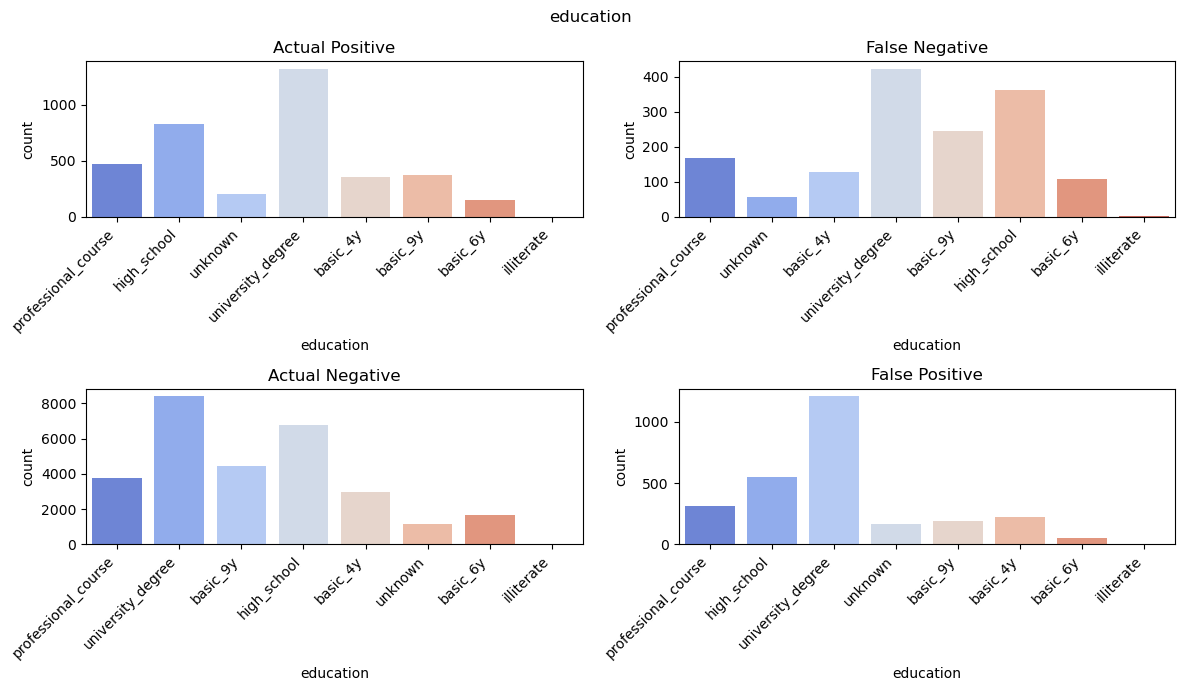

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,7))
sns.countplot(data=positive, x='education', ax=axes[0][0], palette='coolwarm')
sns.countplot(data=false_negative, x='education', ax=axes[0][1], palette='coolwarm')
sns.countplot(data=negative, x='education', ax=axes[1][0], palette='coolwarm')
sns.countplot(data=false_positive, x='education', ax=axes[1][1], palette='coolwarm')

axes[0][0].set_title('Actual Positive')
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=45, ha='right')
axes[0][1].set_title('False Negative')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45, ha='right')
axes[1][0].set_title('Actual Negative')
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45, ha='right')
axes[1][1].set_title('False Positive')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle('education')
plt.tight_layout();

Hasil prediksi error pada ciri *education* bisa dikatakan prediksi random, dikarenakan adanya overlap/noise antara ciri aktual positive dan negative.

#### Default

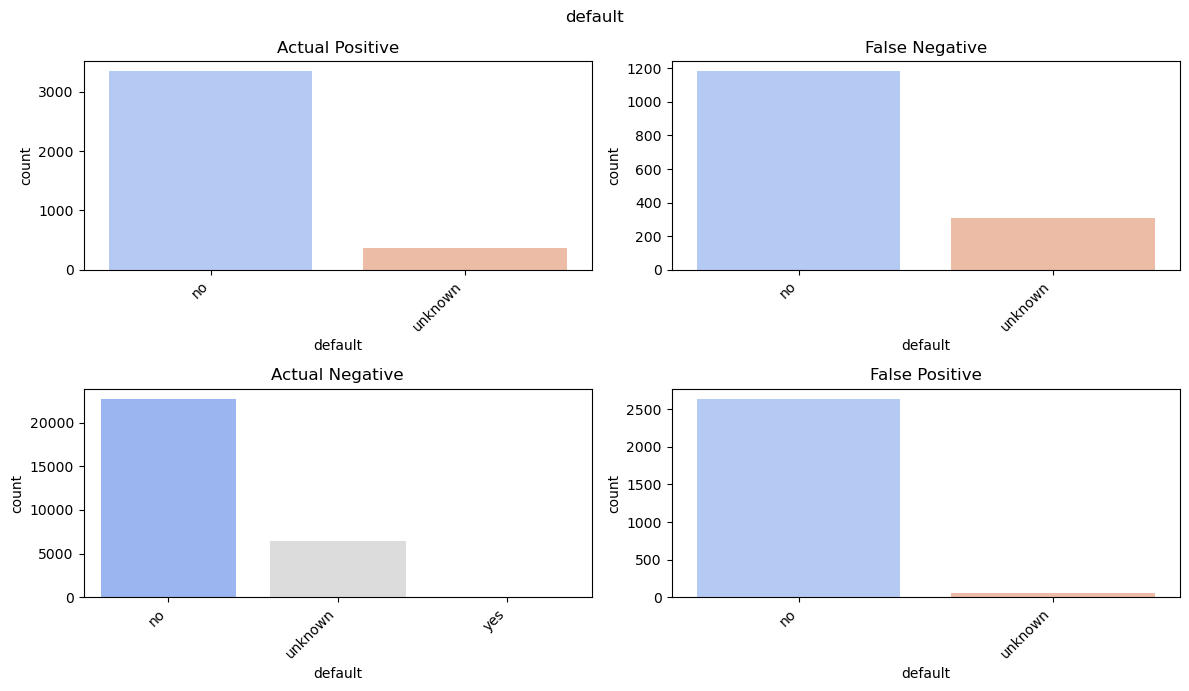

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,7))
sns.countplot(data=positive, x='default', ax=axes[0][0], palette='coolwarm')
sns.countplot(data=false_negative, x='default', ax=axes[0][1], palette='coolwarm')
sns.countplot(data=negative, x='default', ax=axes[1][0], palette='coolwarm')
sns.countplot(data=false_positive, x='default', ax=axes[1][1], palette='coolwarm')

axes[0][0].set_title('Actual Positive')
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=45, ha='right')
axes[0][1].set_title('False Negative')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45, ha='right')
axes[1][0].set_title('Actual Negative')
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45, ha='right')
axes[1][1].set_title('False Positive')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle('default')
plt.tight_layout();

Hasil prediksi error pada ciri *default* bisa dikatakan prediksi random jika client status default 'no' (tidak pernah mengalami gagal bayar), dikarenakan adanya overlap/noise antara ciri aktual positive dan negative. Pada status *unknown* memiliki kecenderungan diprediksi sebagai negative, karena mayoritas berada pada ciri client negative/menolak.

#### Housing

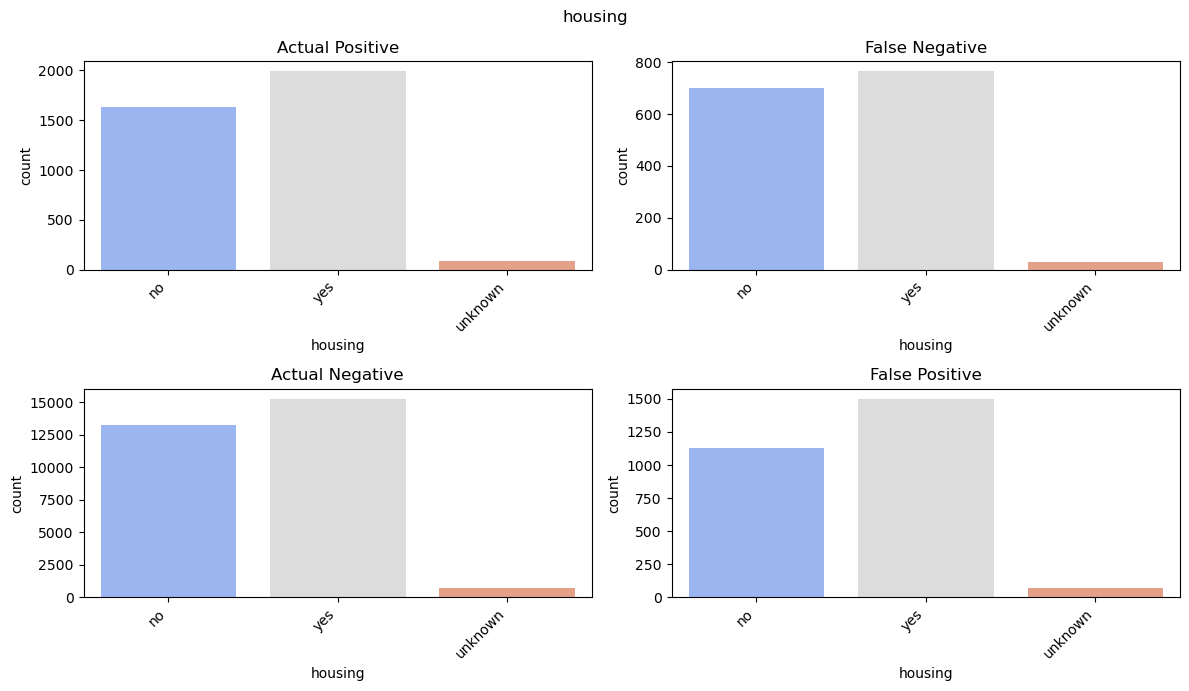

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,7))
sns.countplot(data=positive, x='housing', ax=axes[0][0], palette='coolwarm')
sns.countplot(data=false_negative, x='housing', ax=axes[0][1], palette='coolwarm')
sns.countplot(data=negative, x='housing', ax=axes[1][0], palette='coolwarm')
sns.countplot(data=false_positive, x='housing', ax=axes[1][1], palette='coolwarm')

axes[0][0].set_title('Actual Positive')
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=45, ha='right')
axes[0][1].set_title('False Negative')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45, ha='right')
axes[1][0].set_title('Actual Negative')
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45, ha='right')
axes[1][1].set_title('False Positive')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle('housing')
plt.tight_layout();

Hasil prediksi error pada ciri *housing* bisa dikatakan prediksi random dikarenakan adanya overlap antara ciri aktual positive dan negative. Untuk mengurangi kebingungan model dalam memprediksi, jumlah data bisa ditingkatkan agar model dapat menangkap *clear boundary* antara client menolak dan menerima terhadap ciri *housing*.

#### Loan

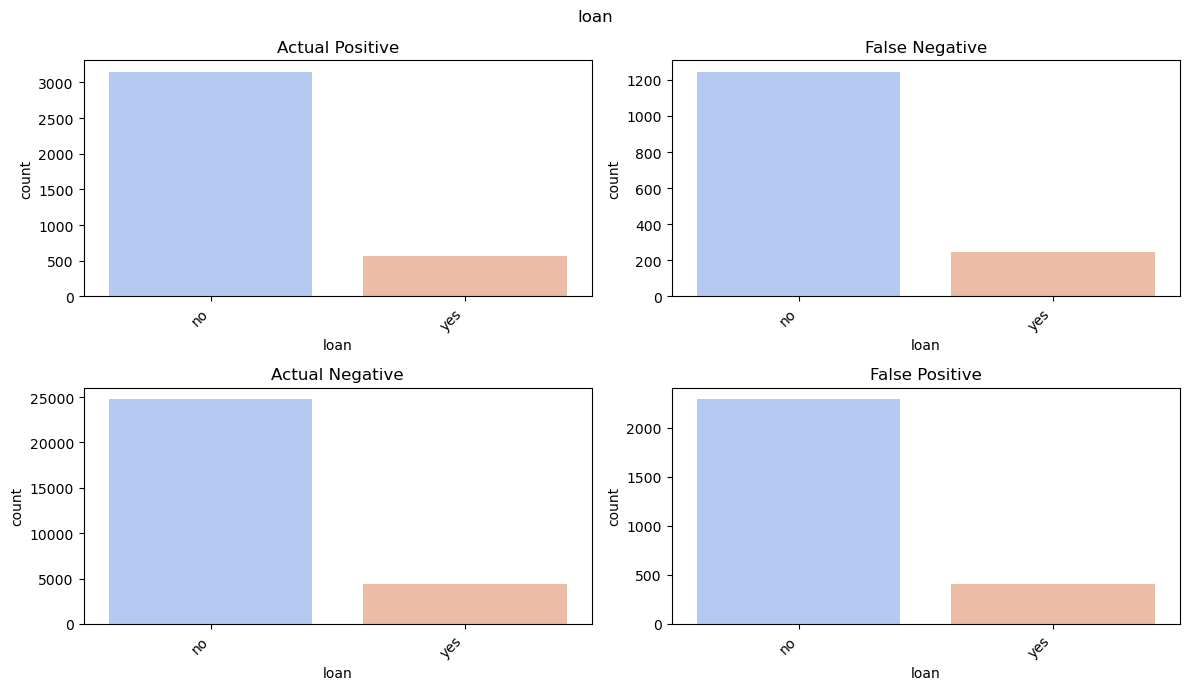

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,7))
sns.countplot(data=positive, x='loan', ax=axes[0][0], palette='coolwarm')
sns.countplot(data=false_negative, x='loan', ax=axes[0][1], palette='coolwarm')
sns.countplot(data=negative, x='loan', ax=axes[1][0], palette='coolwarm')
sns.countplot(data=false_positive, x='loan', ax=axes[1][1], palette='coolwarm')

axes[0][0].set_title('Actual Positive')
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=45, ha='right')
axes[0][1].set_title('False Negative')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45, ha='right')
axes[1][0].set_title('Actual Negative')
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45, ha='right')
axes[1][1].set_title('False Positive')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle('loan')
plt.tight_layout();

Hasil prediksi error pada ciri *loan* merupakan prediksi random dikarenakan adanya overlap/noise antara ciri aktual positive dan negative.

#### Month

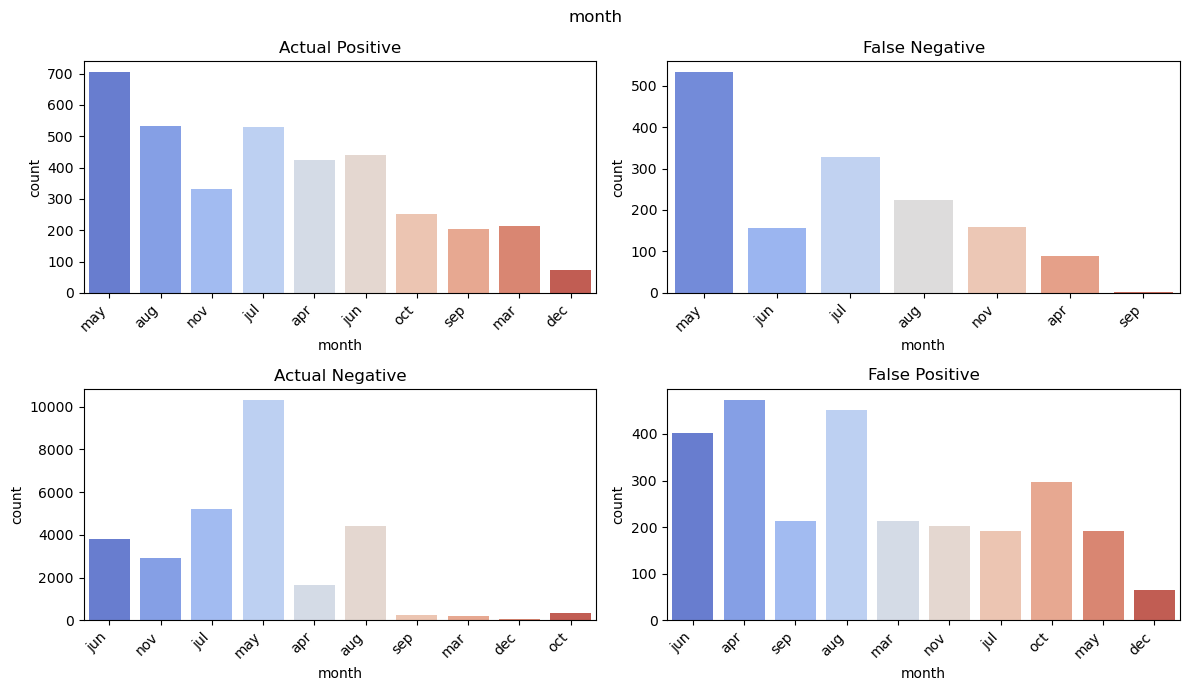

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,7))
sns.countplot(data=positive, x='month', ax=axes[0][0], palette='coolwarm')
sns.countplot(data=false_negative, x='month', ax=axes[0][1], palette='coolwarm')
sns.countplot(data=negative, x='month', ax=axes[1][0], palette='coolwarm')
sns.countplot(data=false_positive, x='month', ax=axes[1][1], palette='coolwarm')

axes[0][0].set_title('Actual Positive')
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=45, ha='right')
axes[0][1].set_title('False Negative')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45, ha='right')
axes[1][0].set_title('Actual Negative')
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45, ha='right')
axes[1][1].set_title('False Positive')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle('month')
plt.tight_layout();

Hasil prediksi error pada ciri *month*, untuk <u>bulan Maret, Oktober, dan Desember, berpotensi untuk diprediksi sebagai client menerima</u> (sebagian besar 3 bulan tersebut ada di ciri client positif), sedangkan sisanya merupakan *random prediction*.

#### Day of Week

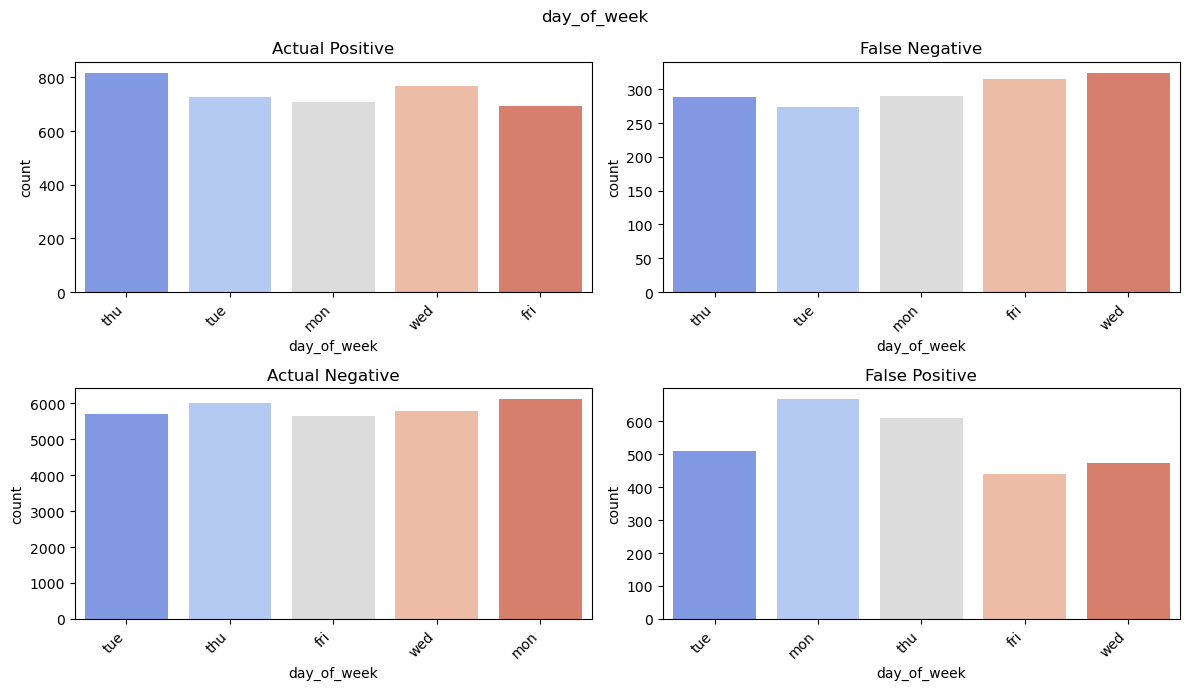

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,7))
sns.countplot(data=positive, x='day_of_week', ax=axes[0][0], palette='coolwarm')
sns.countplot(data=false_negative, x='day_of_week', ax=axes[0][1], palette='coolwarm')
sns.countplot(data=negative, x='day_of_week', ax=axes[1][0], palette='coolwarm')
sns.countplot(data=false_positive, x='day_of_week', ax=axes[1][1], palette='coolwarm')

axes[0][0].set_title('Actual Positive')
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=45, ha='right')
axes[0][1].set_title('False Negative')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45, ha='right')
axes[1][0].set_title('Actual Negative')
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45, ha='right')
axes[1][1].set_title('False Positive')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle('day_of_week')
plt.tight_layout();

Hasil prediksi error pada ciri *day_of_week* merupakan *random prediction*, tidak terdapat pola error.

#### Contact

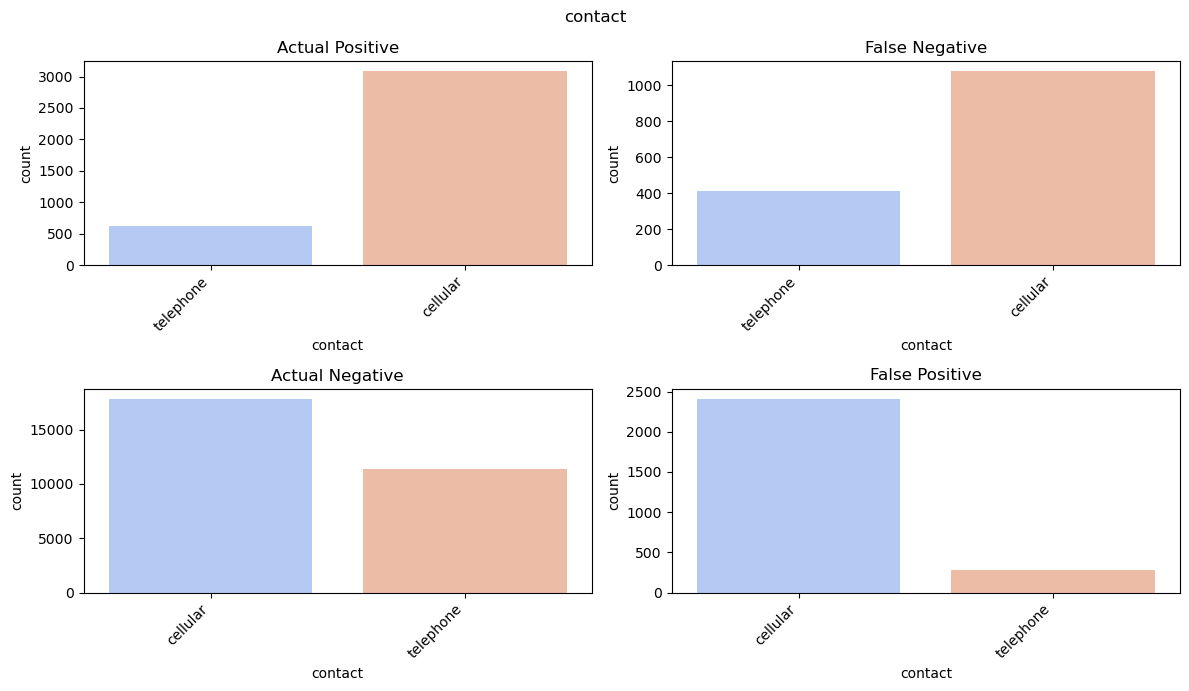

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,7))
sns.countplot(data=positive, x='contact', ax=axes[0][0], palette='coolwarm')
sns.countplot(data=false_negative, x='contact', ax=axes[0][1], palette='coolwarm')
sns.countplot(data=negative, x='contact', ax=axes[1][0], palette='coolwarm')
sns.countplot(data=false_positive, x='contact', ax=axes[1][1], palette='coolwarm')

axes[0][0].set_title('Actual Positive')
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=45, ha='right')
axes[0][1].set_title('False Negative')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45, ha='right')
axes[1][0].set_title('Actual Negative')
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45, ha='right')
axes[1][1].set_title('False Positive')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle('contact')
plt.tight_layout();

Hasil prediksi error pada ciri *contact* merupakan *random prediction*

**Numerical Charateristic**

In [ ]:
def age_range(age):
  if age <= 25:
    return 'Young Adults'
  elif age <= 35:
    return 'Emerging Adults'
  elif age <= 45:
    return 'Mid Adults'
  elif age <= 55:
    return 'Established Adults'
  elif age <= 65:
    return 'Late Adults'
  else:
    return 'Elderly'

positive['age_range'] = positive['age'].apply(lambda x: age_range(x))
false_negative['age_range'] = false_negative['age'].apply(lambda x: age_range(x))
negative['age_range'] = negative['age'].apply(lambda x: age_range(x))
false_positive['age_range'] = false_positive['age'].apply(lambda x: age_range(x))

#### Age

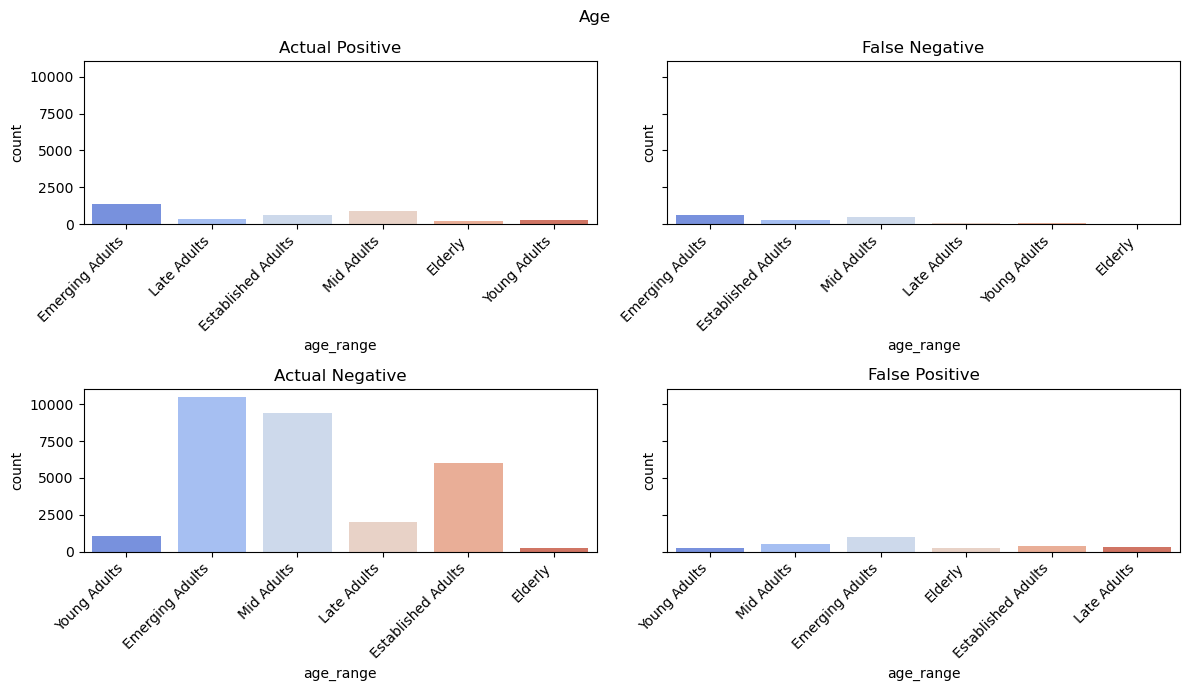

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,7), sharey=True)
sns.countplot(data=positive, x='age_range', ax=axes[0][0], palette='coolwarm')
sns.countplot(data=false_negative, x='age_range',ax=axes[0][1], palette='coolwarm')
sns.countplot(data=negative,x='age_range', ax=axes[1][0], palette='coolwarm')
sns.countplot(data=false_positive,x='age_range', ax=axes[1][1], palette='coolwarm')

axes[0][0].set_title('Actual Positive')
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=45, ha='right')
axes[0][1].set_title('False Negative')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45, ha='right')
axes[1][0].set_title('Actual Negative')
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45, ha='right')
axes[1][1].set_title('False Positive')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle('Age')
plt.tight_layout();

Hasil prediksi error pada ciri *usia* merupakan *random prediction*, dimana beberapa data berhasil diprediksi sebagai positif dan negatif, artinya tidak ada pattern/pola khusus yang menentukan hasil significant keputusan client menerima atau menolak.

#### Indeks Consumer

Indikator seperti index kepercayaan dan index harga tidak bisa menjadi tolak ukur/indikator range kemungkinan model memprediksi salah, dikarenakan nilai data hanya memiliki 1 arah (negatif/positif) dengan interval nilai *insignificant*. Untuk improvement selanjutnya, bisa disediakan range nilai dengan interval lebih beragam, untuk mempermudah model melihat keseluruhan data dari naik turunnya index.

#### Offered Rate (Euribor)

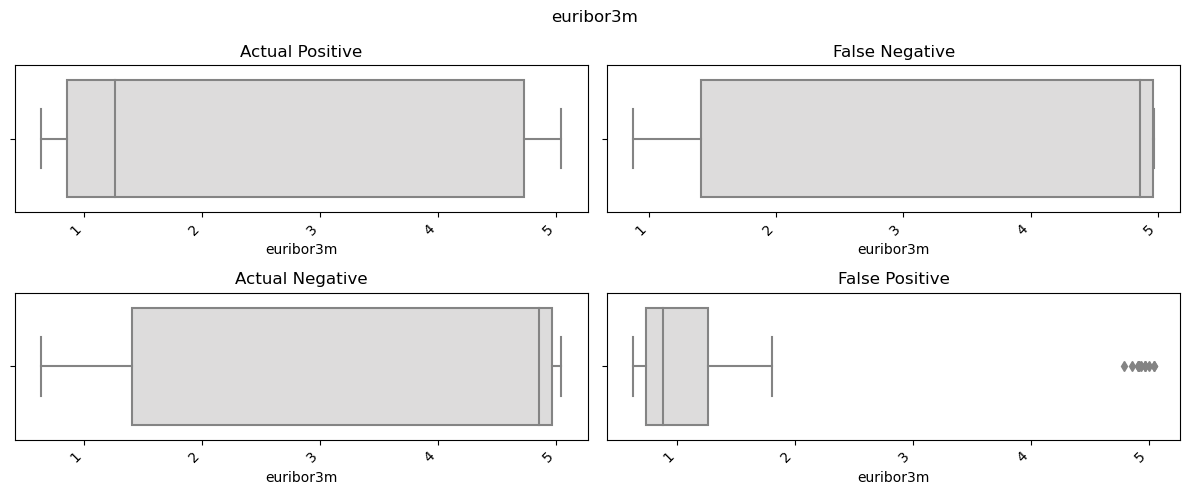

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,5), sharey=True)
sns.boxplot(data=positive, x='euribor3m', ax=axes[0][0], palette='coolwarm')
sns.boxplot(data=false_negative, x='euribor3m',ax=axes[0][1], palette='coolwarm')
sns.boxplot(data=negative,x='euribor3m', ax=axes[1][0], palette='coolwarm')
sns.boxplot(data=false_positive,x='euribor3m', ax=axes[1][1], palette='coolwarm')

axes[0][0].set_title('Actual Positive')
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=45, ha='right')
axes[0][1].set_title('False Negative')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45, ha='right')
axes[1][0].set_title('Actual Negative')
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45, ha='right')
axes[1][1].set_title('False Positive')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle('euribor3m')
plt.tight_layout();

Hasil prediksi error pada ciri *suku bunga* bisa dikatakan ketika suku bunga cenderung rendah (mendekati nilai 0, karena pada dataset minimum rate +- 1%), maka model akan cenderung memprediksi client memiliki potensi untuk menerima,sedangkan pada false negative, ketika suku bunga cenderung naik (menjauhi nilai 0), maka model akan cenderung memprediksi client memiliki potensi menolak<br>

#### Employee Rate

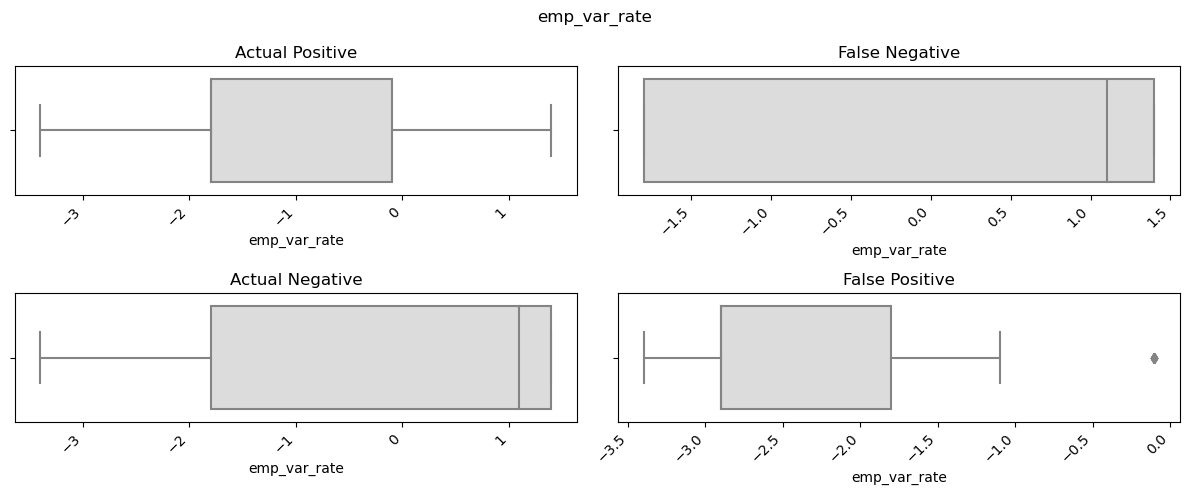

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,5), sharey=True)
sns.boxplot(data=positive, x='emp_var_rate', ax=axes[0][0], palette='coolwarm')
sns.boxplot(data=false_negative, x='emp_var_rate',ax=axes[0][1], palette='coolwarm')
sns.boxplot(data=negative,x='emp_var_rate', ax=axes[1][0], palette='coolwarm')
sns.boxplot(data=false_positive,x='emp_var_rate', ax=axes[1][1], palette='coolwarm')

axes[0][0].set_title('Actual Positive')
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(), rotation=45, ha='right')
axes[0][1].set_title('False Negative')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=45, ha='right')
axes[1][0].set_title('Actual Negative')
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=45, ha='right')
axes[1][1].set_title('False Positive')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle('emp_var_rate')
plt.tight_layout();

Hasil prediksi error pada ciri *rate tenaga kerja*, model cenderung akan memprediksi client menerima jika rate tenaga kerja saat itu berada pada index < -1.5, untuk range > 0 model cenderung memprediksi sebagai negative.

#### Conclusions

Hasil error analysis menjelaskan bahwa adanya indikasi kesalahan pada rincian:
- Pekerjaan blue-collar kecenderungan besar akan diprediksi sebagai client berpotensi menolak penawaran (yang kenyataan masih ada client dengan pekerjaan sama yang menerima penawaran).
- Maret, Oktober, dan Desember berpotensi besar diprediksi sebagai client yang akan menerima (yang kenyataan dibulan tersebut masih ada beberapa client yang menolak penawaran).
- Apabila tingkat suku bunga mendekati 0 (semakin mendekati 0) maka kemungkinan model memprediksi sebagai client menerima (*dikarenakan kondisi ekonomi dengan indikasi rendah merupakan indikasi sebagian besar client menerima*).
- Apabila tingkat tenaga kerja berada pada rentang < -1.5, kemungkinan model memprediksi sebagai client yang kecenderungan akan menerima (*dikarenakan kondisi ekonomi dengan indikasi rendah merupakan indikasi sebagian besar client menerima*)

## Recommendation

**Business Prediction System**

Sebelumnya diketahui bahwa sistem masih memiliki kelemahan prediksi terhadap client yang berpotensi menerima, maka dibentuk beberapa segment client yang dapat membantu perusahaan dalam menutupi kelemahan tersebut:
1. Low Client: Client yang persentase penerimaan < 40%, artinya client pada range ini tidak memiliki sedikit ketertarikan terhadap pembukaan deposito. Untuk menarik client ini, maka perusahaan perlu melibatkan penawaran lain seperti:

    - **Entrepreneur / Self-Employed**: Umumnya seorang entrepreneur lebih banyak menghabiskan waktunya diluar ruangan dan berpergian. Perusahaan bisa <u>mengadakan program non-banking/bundling yang melibatkan potongan biaya tiket atau holiday program</u>. <br><br>
    Tindakan lainnya <u>melibatkan credit, seperti menaikkan limit credit.</u> <br>
    Umumnya Entrepreneur lebih cenderung menggunakan credit (deferring payment) dibandingkan in cash, selain kemudahan dalam akses (lebih fleksibel), keuntungan lainnya mereka sekaligus dapat meningkatkan credit score (yang nantinya dapat mempermudah entrepreneur dalam melakukan peminjaman).<br>
    <br>
    Penawaran credit, selain membantu entrepreneur, juga sebenarnya memberi benefit kepada pihak bank karena mendapatkan return bunga dari client, maka dapat dikatakan tindakan ini menjadikan benefit tambahan bagi perusahaan.
    
    - **Client lainnya (housemaid, services, admin, blue-collar, technician, management)**: Client dalam golongan ini merupakan client yang bekerja dibawah pimpinan perusahaan/perorangan atau bisa dikategorikan sebagai karyawan, sehingga secara pendapatan bergantung pada perusahaan atau perorangan tempat mereka berkerja.<br>
    <br>
    Umumnya golongan ini termasuk mereka yang lebih <u>mengutamakan keamanan</u> daripada mengambil zona beresiko seperti golongan entrepreneur, salah satu kelemahan mereka yang bekerja dibawah pimpinan seseorang/perusahaan adalah  potensi adanya pemutus hubungan kerja, oleh karena itu, perusahaan dapat menggunakan kelemahan ini dengan menyajikan program yang dapat membantu golongan ini mempunyai akses terhadap keadaan darurat. <br>
    <br>
    <u>Perusahaan dapat menawarkan program asuransi</u> (misalkan mendapatkan potongan premi / bebas premi selama n-bulan) bagi mereka yang melakukan pembukaan deposito untuk jangka waktu n-bulan.<br>
    <br>
    Keuntungan bagi client, apabila sewaktu-waktu terjadi phk, maka masalah kesehatan/lainnya (*tergantung asuransi yang ditawarkan perusahaan) dapat tercover dan dengan adanya potongan/bebas premi menjadi benefit untuk mendapatkan asuransi dengan pengeluaran minim atau tanpa pengeluaran biaya selama n-bulan disepakati, sedangkan bagi perusahaan, perusahaan mendapatkan clientnya dan dana tambahan dari client yang melakukan pembayaran asuransi setelah n-month yang disepakati.

2. Medium - High Client: Client yang persentase penerimaan 40 - <80% (medium), >= 80% (high). Dikarenakan potensi kesalahan prediksi pada client ini lumayan besar, jika diasumsikan terjadi kesalahan, maka golongan customer tesebut berpotensi berada pada segment medium ataupun low.<br>  <br>
Berdasarkan persentase client yang diprediksi pada range 50 - 70%, hanya 20-40% berhasil diprediksi benar (1), artinya <u>model menganggap ciri client range 50-70% (prediction) masih memiliki beberapa kemiripan terhadap ciri client yang menerima</u>, jika dilihat proporsi client yang sebenarnya menolak (dalam range 50 - 70%) cukup besar, Artinya dibandingkan kemiripan dengan beberapa ciri client menerima, ciri client menolak masih tergolong kuat. Guna meningkatkan persentase penerimaan dan mengatasi kesalahan prediksi kepada client yang diprediksi pada range ini, perusahaan dapat menerapkan strategi yang ada pada *segment low.*<br> <br>
Sedangkan ketika memasuki probability prediksi 80 - 100%, kesalahan prediksi terhadap client berpotensi menolak berkurang, artinya <u>ciri client yang berada pada prediksi 80-100% memiliki kesenjangan cukup significant terhadap ciri client menolak</u>, jika model memprediksi client tersebut berpotensi menerima (dengan aktual negatif), artinya potensi kemungkinan besar data client tersebut, memiliki kemiripan mendekati ciri client yang berpotensi menerima (yang ada pada range 80-100%). Maka perusahaan bisa menganggap client atau menerapkan tindakan sebagai berikut (segment client medium) :<br>

    - Mengadakan program berhadiah/rewards jika melakukan pembukaan deposito(disesuaikan dengan besaran dan jangka waktu penyimpanan).<br>
        Misalkan perusahaan memiliki 2 jenis hadiah, <u>hadiah bisa langsung diambil oleh client</u>, namun syarat mengikuti program, client harus memasukkan minimum deposito sekian x (*bisa ditambahkan berapa persentase dari base harga hadiah/barang yang diterima dengan minimum deposito normal*) untuk setoran awal. <br>
        Client perlu memilih jangka waktu penyimpanan yang disepakati. Semakin lama jangka waktu penyimpanan, maka setoran awal sebelumnya semakin kecil nilainya.<br><br>
        Program yang diajukan bertujuan untuk menarik client yang masih memliki kecenderungan menerima besar, selain itu, dampak berhasilnya program yang dijalankan dapat meningkatkan retensi client untuk melakukan pembukaan kembali, maka cost yang dikeluarkan sekira sepadan dengan result didapat (ditambah dengan adanya tambahan persentase minimum saldo dan jangka waktu pengembalian) perusahaan. Keuntungan bagi client, selain hadiah yang diterima, client juga mendapatkan return bunga.


*Tindakan dan strategi diatas tentunya disesuaikan dengan lama dan besaran client dalam memilih jangka dan besaran deposito.


**External Factor that gives impact to the decision of client will accept the offering or not**

1. Inflation rate: high. (Data menunjukkan sebagian besar client menerima ketika inflation rate saat itu menunjukkan indikasi kenaikan (*umumnya ketika kondisi ekonomi sedang mengalami inflasi, bank akan menaikkan suku bunga*))
2. Relationship status: single.
3. Loan in-default: no.
4. Employment status: retired. (Peluang penerimaan mereka memasuki usia pensiun (> 65) atau yang berstatus pensiun lebih besar)
5. Adanya potensi penerimaan kembali bagi client yang sebelumnya pernah menerima penawaran.
6. Awal dan akhir bulan merupakan waktu yang memiliki potensi besar (penerimaan) untuk melakukan campaign.


**ML Model**

Diketahui data yang dipakai significant imbalanced dan sampling yang digunakan ROS (berdasarkan hasil uji best sampler), dimana sampling hanya melakukan duplikasi (artinya ciri data sama dengan yang ada pada dataset yang diambil secara random). Beberapa saran untuk meningkatkan performa model:
- Menambahkan jumlah data client yang berpotensi menerima, sehingga model dapat mempelajari karakteristik secara mendalam dari value client yang menerima sehingga model dapat menemukan pattern jelas antara menerima dan menolak.
- "Income", "Has Property/assets", "Has emergency fund", "Has saving goals" merupakan ciri tambahan yang bisa digunakan untuk mengetahui lebih dalam terhadap situasi financial client, behaviour/goal client, keperluan akses dana.


-DONE-

In [ ]:
import pickle

In [ ]:
pipeline_model = Pipeline([
          ('preprocess', preprocessor),
          ('scaler', scaler),
          ('resample', resampler),
          ('model', tuned_gradboost)
 ])

pipeline_model.fit(X_train, y_train)
pickle.dump(pipeline_model, open('bank_client_probs_model.pkl', 'wb'))